In [1]:
# Split into testing / training split (testing = 2015 data, training is all other years) based on numpy files

In [2]:
# Use PyTorch to build neural networkabs
# Inspired by pytorch workshop conducted in MSBD 5001 course

# Import required packages
import os
import numpy as np
import pandas as pd
import torch
from torch import nn
import torch.nn.functional as F
import cv2
from torch.utils.data import DataLoader
from torchvision import datasets, models, transforms
from torchvision.transforms import ToPILImage
from torch.nn.init import kaiming_uniform_
from torchvision.transforms import Resize, ToTensor, Compose
import matplotlib.pyplot as plt

In [3]:
# Import the yield data as pandas data frame (Note this is saved as a csv file in base working directory)
file_path = os.path.join(os.getcwd()) + '/data/'
file_name = 'yield_PR.csv'
yield_data = pd.read_csv(file_path + file_name)

In [4]:
# yield_data[yield_data['Country Name'] == 'Kenya']['2005']

In [5]:
# Original version (works)

class CustomImageDataset():
    def __init__(self, hist_dir, crop_yield_table, transform=None, target_transform=None):  
        self.hist_dir = hist_dir # References the directory for each given country where the data is stored
        self.transform = transform
        self.target_transform = target_transform
        # load the files 
        filenames = [] # For every year, yields a numpy array of dimension 576 x 46
        crop_yields = []
        for filename in os.listdir(hist_dir):
            if filename != 'yield.csv' and filename != 'yield_PR.csv':
#             print(filename)
#             print(filename[:-9])
#             print(str(int(filename[-8:-4])))
#             print(crop_yield_table[crop_yield_table['Country Name'] == filename[:-9]][str(int(filename[-8:-4]))].to_numpy())
                filenames.append(filename)
                crop_yields.append(crop_yield_table[crop_yield_table['Country Name'] == filename[:-9]][str(int(filename[-8:-4]))].to_numpy())
#             print(crop_yields)
        self.filenames = filenames
        self.crop_yields = crop_yields
        
    def __len__(self):
        return len(self.filenames)

    def __getitem__(self, idx):
        hist_dir = os.path.join(self.hist_dir, self.filenames[idx])
        #hist = torch.from_numpy(np.load(hist_dir)).float()
        hist = np.load(hist_dir)
        # hist_3 = img2 = cv2.merge((hist,hist,hist))
        
        # Turn into 3 channel array (triplicate of single layer) --> to function with known model architectures
        hist_3 = np.zeros( ( np.array(hist).shape[0], np.array(hist).shape[1], 3 ) )
        hist_3[:,:,0] = hist # same value in each channel
        hist_3[:,:,1] = hist
        hist_3[:,:,2] = hist
        
        if self.transform:
            hist = self.transform(hist_3).float()
        crop_yield = torch.from_numpy(self.crop_yields[idx].reshape(-1, 1)).float()
        return hist, crop_yield

In [6]:
# # Modified to handle 

# class CustomImageDataset():
#     def __init__(self, hist_dir, crop_yield_table, transform=None, target_transform=None):  
#         self.hist_dir = hist_dir # References the directory containing a folder for each country
#         self.transform = transform
#         self.target_transform = target_transform
#         filenames = [] # For every year, yields a numpy array of dimension 576 x 46
#         crop_yields = []
#         for dirname in os.listdir(hist_dir):
#             if dirname != 'yield.csv':
#                 print(dirname)
#                 # load the files 
#                 for filename in os.listdir(hist_dir + dirname):
#                     print(filename)
#                     print(filename[:-9])
#                     print(filename[-8:-4])
#                     print(str(int(filename[-8:-4])))
#                     print(crop_yield_table[crop_yield_table['Country Name'] == filename[:-9]][str(int(filename[-8:-4]))].to_numpy())
#                     filenames.append(dirname +'/'+ filename)
#                     print(dirname +'/'+ filename)
#                     crop_yields.append(crop_yield_table[crop_yield_table['Country Name'] == filename[:-9]][str(int(filename[-8:-4]))].to_numpy())
#         #             print(crop_yields)
#         self.filenames = filenames
#         self.crop_yields = crop_yields

#     def __len__(self):
#         return len(self.filenames)

#     def __getitem__(self, idx):
#         hist_dir = os.path.join(self.hist_dir, self.filenames[idx])
#         #hist = torch.from_numpy(np.load(hist_dir)).float()
#         print(hist_dir)
#         hist = np.load(hist_dir)
#         # hist_3 = img2 = cv2.merge((hist,hist,hist))
        
#         # Turn into 3 channel array (triplicate of single layer) --> to function with known model architectures
#         hist_3 = np.zeros( ( np.array(hist).shape[0], np.array(hist).shape[1], 3 ) )
#         hist_3[:,:,0] = hist # same value in each channel
#         hist_3[:,:,1] = hist
#         hist_3[:,:,2] = hist
        
#         if self.transform:
#             hist = self.transform(hist_3).float()
#         crop_yield = torch.from_numpy(self.crop_yields[idx].reshape(-1, 1)).float()
#         return hist, crop_yield

In [7]:
crop_dataset = CustomImageDataset('./data/', crop_yield_table = yield_data, transform = Compose([ToTensor(), Resize((224,224))]))

In [8]:
# crop_dataset

In [9]:
# crop_yield_table = yield_data

In [10]:
# crop_yield_table[crop_yield_table['Country Name'] == 'Kenya'][str(int(2005))]

In [11]:
# for filename in os.listdir('./data/'):
#     if filename != 'yield.csv' and filename != 'yield_PR.csv':
#         crop_dataset = CustomImageDataset('./data/'+filename, crop_yield_table = yield_data, transform = Compose([ToTensor(), Resize((224,224))]))
#         for ind in range(len(crop_dataset)):
#             print(crop_dataset[ind])
#             train = torch.cat(trian, crop_dataset[ind])
#         print(filename)

In [12]:
# train

NameError: name 'train' is not defined

In [ ]:
# crop_dataset = CustomImageDataset('./data/'+filename, crop_yield_table = yield_data, transform = Compose([ToTensor(), Resize((224,224))]))

In [ ]:
# len(crop_dataset)

In [ ]:
# for ind in range(len(crop_dataset)):
#     print(crop_dataset[ind])

In [ ]:
# for filename in os.listdir('./data/'):
#     if filename == os.listdir('./data/')[0]:
#         crop_dataset = CustomImageDataset('./data/'+filename, crop_yield_table = yield_data, transform = Compose([ToTensor(), Resize((224,224))]))
#     #elif filename != 'yield.csv':
#     #    crop_dataset = torch.cat(crop_dataset, CustomImageDataset('./data/'+filename, crop_yield_table = yield_data, transform = Compose([ToTensor(), Resize((224,224))])))
# # crop_dataset = torch.cat(crop_dataset)

In [13]:
# len(crop_dataset)

364

In [14]:
# crop_dataset[3] # Shows for a given tensor which consists of a pair of 1) array of binned histogram data; and 2) yield output

(tensor([[[4.2608e-02, 4.2608e-02, 4.2533e-02,  ..., 4.6571e-02,
           4.6918e-02, 4.6918e-02],
          [2.7705e-01, 2.7705e-01, 2.7678e-01,  ..., 2.3345e-01,
           2.3342e-01, 2.3342e-01],
          [3.8722e-02, 3.8722e-02, 3.9051e-02,  ..., 7.1192e-02,
           7.0520e-02, 7.0520e-02],
          ...,
          [3.9607e-01, 3.9607e-01, 3.9655e-01,  ..., 6.7015e-01,
           6.7240e-01, 6.7240e-01],
          [5.6489e-04, 5.6489e-04, 5.9094e-04,  ..., 2.6951e-03,
           2.7263e-03, 2.7263e-03],
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00]],
 
         [[4.2608e-02, 4.2608e-02, 4.2533e-02,  ..., 4.6571e-02,
           4.6918e-02, 4.6918e-02],
          [2.7705e-01, 2.7705e-01, 2.7678e-01,  ..., 2.3345e-01,
           2.3342e-01, 2.3342e-01],
          [3.8722e-02, 3.8722e-02, 3.9051e-02,  ..., 7.1192e-02,
           7.0520e-02, 7.0520e-02],
          ...,
          [3.9607e-01, 3.9607e-01, 3.9655e-01,  ..., 6.701

In [15]:
# crop_dataset[3][0].dtype

torch.float32

In [16]:
# crop_dataset[3][1].dtype

torch.float32

In [17]:
# crop_dataset[3][0].shape # For each binned histogram data, consists of 576 observations across 29 dimensions

torch.Size([3, 224, 224])

type of the image:  <class 'torch.Tensor'>
Yield: tensor([[1058.6000]])


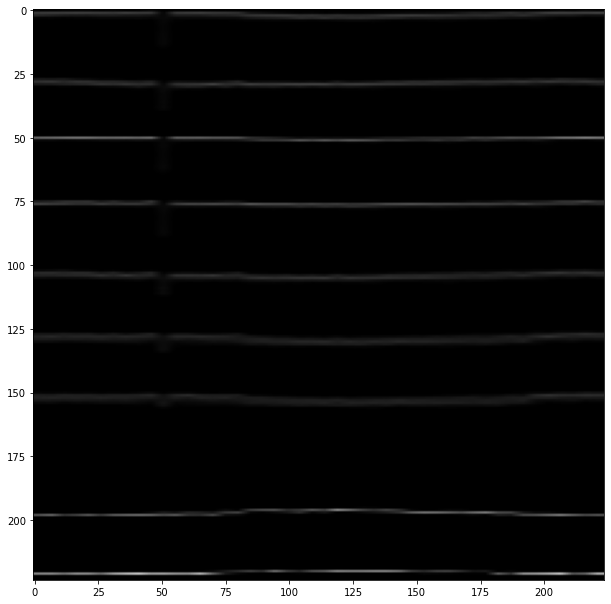

In [18]:
# Plot data for one sample pair
raw_image, crop_yield = crop_dataset[0]
figure = plt.figure()
figure.set_size_inches(18.5, 10.5)

print("type of the image: ", type(raw_image))

if type(raw_image) == torch.Tensor:
    plt.imshow(ToPILImage()(raw_image))
else:
    plt.imshow(raw_image)
    
print(f"Yield: {crop_yield}")

In [19]:
raw_image.shape

torch.Size([3, 224, 224])

In [20]:
# Now moving on to the machine learning model

In [21]:
dataloader = DataLoader(crop_dataset, batch_size=1, shuffle=False)

In [22]:
for feature, label in dataloader:
    print(f"Feature batch shape: {feature.size()}")
    print(label)
    print(f"Feature data type: {feature.dtype}")
    print(f"Label data type: {label.dtype}")

Feature batch shape: torch.Size([1, 3, 224, 224])
tensor([[[1058.6000]]])
Feature data type: torch.float32
Label data type: torch.float32
Feature batch shape: torch.Size([1, 3, 224, 224])
tensor([[[1470.3000]]])
Feature data type: torch.float32
Label data type: torch.float32
Feature batch shape: torch.Size([1, 3, 224, 224])
tensor([[[1344.1000]]])
Feature data type: torch.float32
Label data type: torch.float32
Feature batch shape: torch.Size([1, 3, 224, 224])
tensor([[[1500.8000]]])
Feature data type: torch.float32
Label data type: torch.float32
Feature batch shape: torch.Size([1, 3, 224, 224])
tensor([[[1503.7000]]])
Feature data type: torch.float32
Label data type: torch.float32
Feature batch shape: torch.Size([1, 3, 224, 224])
tensor([[[1253.5000]]])
Feature data type: torch.float32
Label data type: torch.float32
Feature batch shape: torch.Size([1, 3, 224, 224])
tensor([[[1034.]]])
Feature data type: torch.float32
Label data type: torch.float32
Feature batch shape: torch.Size([1, 3,

tensor([[[1203.9000]]])
Feature data type: torch.float32
Label data type: torch.float32
Feature batch shape: torch.Size([1, 3, 224, 224])
tensor([[[936.1000]]])
Feature data type: torch.float32
Label data type: torch.float32
Feature batch shape: torch.Size([1, 3, 224, 224])
tensor([[[1039.9000]]])
Feature data type: torch.float32
Label data type: torch.float32
Feature batch shape: torch.Size([1, 3, 224, 224])
tensor([[[1002.]]])
Feature data type: torch.float32
Label data type: torch.float32
Feature batch shape: torch.Size([1, 3, 224, 224])
tensor([[[1062.7000]]])
Feature data type: torch.float32
Label data type: torch.float32
Feature batch shape: torch.Size([1, 3, 224, 224])
tensor([[[995.1000]]])
Feature data type: torch.float32
Label data type: torch.float32
Feature batch shape: torch.Size([1, 3, 224, 224])
tensor([[[1203.]]])
Feature data type: torch.float32
Label data type: torch.float32
Feature batch shape: torch.Size([1, 3, 224, 224])
tensor([[[1156.5000]]])
Feature data type: t

tensor([[[1703.4000]]])
Feature data type: torch.float32
Label data type: torch.float32
Feature batch shape: torch.Size([1, 3, 224, 224])
tensor([[[1830.3000]]])
Feature data type: torch.float32
Label data type: torch.float32
Feature batch shape: torch.Size([1, 3, 224, 224])
tensor([[[1045.7000]]])
Feature data type: torch.float32
Label data type: torch.float32
Feature batch shape: torch.Size([1, 3, 224, 224])
tensor([[[1209.]]])
Feature data type: torch.float32
Label data type: torch.float32
Feature batch shape: torch.Size([1, 3, 224, 224])
tensor([[[1020.6000]]])
Feature data type: torch.float32
Label data type: torch.float32
Feature batch shape: torch.Size([1, 3, 224, 224])
tensor([[[777.8000]]])
Feature data type: torch.float32
Label data type: torch.float32
Feature batch shape: torch.Size([1, 3, 224, 224])
tensor([[[1444.7000]]])
Feature data type: torch.float32
Label data type: torch.float32
Feature batch shape: torch.Size([1, 3, 224, 224])
tensor([[[2467.]]])
Feature data type: 

tensor([[[495.5000]]])
Feature data type: torch.float32
Label data type: torch.float32
Feature batch shape: torch.Size([1, 3, 224, 224])
tensor([[[364.8000]]])
Feature data type: torch.float32
Label data type: torch.float32
Feature batch shape: torch.Size([1, 3, 224, 224])
tensor([[[405.]]])
Feature data type: torch.float32
Label data type: torch.float32
Feature batch shape: torch.Size([1, 3, 224, 224])
tensor([[[427.5000]]])
Feature data type: torch.float32
Label data type: torch.float32
Feature batch shape: torch.Size([1, 3, 224, 224])
tensor([[[431.1000]]])
Feature data type: torch.float32
Label data type: torch.float32
Feature batch shape: torch.Size([1, 3, 224, 224])
tensor([[[458.7000]]])
Feature data type: torch.float32
Label data type: torch.float32
Feature batch shape: torch.Size([1, 3, 224, 224])
tensor([[[225.8000]]])
Feature data type: torch.float32
Label data type: torch.float32
Feature batch shape: torch.Size([1, 3, 224, 224])
tensor([[[359.9000]]])
Feature data type: tor

tensor([[[1117.8000]]])
Feature data type: torch.float32
Label data type: torch.float32
Feature batch shape: torch.Size([1, 3, 224, 224])
tensor([[[1347.6000]]])
Feature data type: torch.float32
Label data type: torch.float32
Feature batch shape: torch.Size([1, 3, 224, 224])
tensor([[[1290.4000]]])
Feature data type: torch.float32
Label data type: torch.float32
Feature batch shape: torch.Size([1, 3, 224, 224])
tensor([[[1350.9000]]])
Feature data type: torch.float32
Label data type: torch.float32
Feature batch shape: torch.Size([1, 3, 224, 224])
tensor([[[1645.9000]]])
Feature data type: torch.float32
Label data type: torch.float32
Feature batch shape: torch.Size([1, 3, 224, 224])
tensor([[[1747.2000]]])
Feature data type: torch.float32
Label data type: torch.float32
Feature batch shape: torch.Size([1, 3, 224, 224])
tensor([[[1751.1000]]])
Feature data type: torch.float32
Label data type: torch.float32
Feature batch shape: torch.Size([1, 3, 224, 224])
tensor([[[1539.]]])
Feature data t

tensor([[[587.7000]]])
Feature data type: torch.float32
Label data type: torch.float32
Feature batch shape: torch.Size([1, 3, 224, 224])
tensor([[[696.4000]]])
Feature data type: torch.float32
Label data type: torch.float32
Feature batch shape: torch.Size([1, 3, 224, 224])
tensor([[[669.3000]]])
Feature data type: torch.float32
Label data type: torch.float32
Feature batch shape: torch.Size([1, 3, 224, 224])
tensor([[[824.4000]]])
Feature data type: torch.float32
Label data type: torch.float32
Feature batch shape: torch.Size([1, 3, 224, 224])
tensor([[[558.6000]]])
Feature data type: torch.float32
Label data type: torch.float32


In [23]:
# Check device used
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


In [24]:
# Based on https://towardsdev.com/implement-resnet-with-pytorch-a9fb40a77448

class ResBlock(nn.Module):
    def __init__(self, in_channels, out_channels, downsample):
        super().__init__()
        if downsample:
            self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=2, padding=1)
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=2),
                nn.BatchNorm2d(out_channels)
            )
        else:
            self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=1, padding=1)
            self.shortcut = nn.Sequential()

        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.bn2 = nn.BatchNorm2d(out_channels)

    def forward(self, input):
        shortcut = self.shortcut(input)
        input = nn.ReLU()(self.bn1(self.conv1(input)))
        input = nn.ReLU()(self.bn2(self.conv2(input)))
        input = input + shortcut
        return nn.ReLU()(input)

In [25]:
# Based on https://towardsdev.com/implement-resnet-with-pytorch-a9fb40a77448

class ResNet18(nn.Module):
    def __init__(self, in_channels, resblock, outputs=1):
        super().__init__()
        self.layer0 = nn.Sequential(
            nn.Conv2d(in_channels, 64, kernel_size=7, stride=2, padding=3),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU()
        )

        self.layer1 = nn.Sequential(
            resblock(64, 64, downsample=False),
            resblock(64, 64, downsample=False)
        )

        self.layer2 = nn.Sequential(
            resblock(64, 128, downsample=True),
            resblock(128, 128, downsample=False)
        )

        self.layer3 = nn.Sequential(
            resblock(128, 256, downsample=True),
            resblock(256, 256, downsample=False)
        )


        self.layer4 = nn.Sequential(
            resblock(256, 512, downsample=True),
            resblock(512, 512, downsample=False)
        )

        self.gap = torch.nn.AdaptiveAvgPool2d(1)
        self.fc = torch.nn.Linear(512, outputs)

    def forward(self, input):
        input = self.layer0(input)
        input = self.layer1(input)
        input = self.layer2(input)
        input = self.layer3(input)
        input = self.layer4(input)
        input = self.gap(input)
        input = torch.flatten(input)
        input = self.fc(input)

        return input

In [26]:
# Don't use pre-trained
model = ResNet18(in_channels = 3, resblock = ResBlock).to(device)
trainloader = dataloader # train_dataloader_resnet
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.RMSprop(model.parameters(), lr=1e-4)
# optimizer = torch.optim.Adam
print(model)
# print(model(crop_dataset[3].to(device)))

ResNet18(
  (layer0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
    (1): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ReLU()
  )
  (layer1): Sequential(
    (0): ResBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (shortcut): Sequential()
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): ResBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (shortcut): Sequential()
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affin

In [27]:
# Potentially enhanced with transfer learning...?
# resnet_model = models.resnet18(pretrained=True).to(device)
# trainloader = dataloader # train_dataloader_resnet
# loss_fn = torch.nn.MSELoss()
# optimizer = torch.optim.RMSprop(model.parameters(), lr=1e-4)
# # optimizer = torch.optim.Adam
# print(model)
# # print(model(crop_dataset[3].to(device)))

In [28]:
# Train model
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.train()
    correct, train_loss = 0, 0 
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)
        train_loss += loss.item()
        print(f"Actual {y}")
        print(f"Predicted {pred}")

        # Backpropagation
        optimizer.zero_grad()  
        loss.backward()
        optimizer.step() 
    train_loss /= num_batches
    return train_loss 

In [ ]:
epochs = 5000
for t in range(epochs):
    train_loss = train(trainloader, model, loss_fn, optimizer)
    # test_loss, test_acc = test(testloader, model, loss_fn)
    if t%1 == 0:
        print(f"Epoch {t}:")
        print(f"Avg loss: {train_loss:>8f}")
print("Done!")

C:\Users\paulr\anaconda3\envs\pytorch\lib\site-packages\torch\nn\modules\loss.py:529: UserWarning: Using a target size (torch.Size([1, 1, 1])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Actual tensor([[[1058.6000]]], device='cuda:0')
Predicted tensor([1.6145], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1470.3000]]], device='cuda:0')
Predicted tensor([2.5572], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1344.1000]]], device='cuda:0')
Predicted tensor([3.6896], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1500.8000]]], device='cuda:0')
Predicted tensor([4.7525], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1503.7000]]], device='cuda:0')
Predicted tensor([5.4286], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1253.5000]]], device='cuda:0')
Predicted tensor([6.2229], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1034.]]], device='cuda:0')
Predicted tensor([6.9556], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1653.9000]]], device='cuda:0')
Predicted tensor([7.5333], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1474.3000]]], device='cuda:0')
Predicted tensor([7.7043], d

Predicted tensor([16.1126], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[598.3000]]], device='cuda:0')
Predicted tensor([16.1885], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[762.8000]]], device='cuda:0')
Predicted tensor([16.2684], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[632.]]], device='cuda:0')
Predicted tensor([16.3407], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[934.8000]]], device='cuda:0')
Predicted tensor([16.4079], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[822.8000]]], device='cuda:0')
Predicted tensor([16.4673], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[855.7000]]], device='cuda:0')
Predicted tensor([16.5575], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[801.9000]]], device='cuda:0')
Predicted tensor([16.6152], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[772.]]], device='cuda:0')
Predicted tensor([15.2388], device='cuda:0', grad_fn=<AddBackward0>)
Actual tens

Predicted tensor([23.5158], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1590.6000]]], device='cuda:0')
Predicted tensor([23.5792], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[788.6000]]], device='cuda:0')
Predicted tensor([23.6365], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[981.4000]]], device='cuda:0')
Predicted tensor([23.6644], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1206.5000]]], device='cuda:0')
Predicted tensor([23.7000], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1089.5000]]], device='cuda:0')
Predicted tensor([23.7397], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1124.8000]]], device='cuda:0')
Predicted tensor([23.7758], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1101.2000]]], device='cuda:0')
Predicted tensor([23.8132], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1397.7000]]], device='cuda:0')
Predicted tensor([23.8499], device='cuda:0', grad_fn=<AddBackward0

Predicted tensor([26.6022], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[362.8000]]], device='cuda:0')
Predicted tensor([26.6284], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[520.3000]]], device='cuda:0')
Predicted tensor([26.6413], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[407.7000]]], device='cuda:0')
Predicted tensor([26.6672], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[446.8000]]], device='cuda:0')
Predicted tensor([26.6844], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[551.3000]]], device='cuda:0')
Predicted tensor([26.6987], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1028.4000]]], device='cuda:0')
Predicted tensor([26.6889], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[944.3000]]], device='cuda:0')
Predicted tensor([26.7577], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[959.3000]]], device='cuda:0')
Predicted tensor([26.8085], device='cuda:0', grad_fn=<AddBackward0>)
Ac

Predicted tensor([31.2954], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[4043.]]], device='cuda:0')
Predicted tensor([31.4773], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[4899.7002]]], device='cuda:0')
Predicted tensor([31.6816], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[3542.3999]]], device='cuda:0')
Predicted tensor([31.8197], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1233.7000]]], device='cuda:0')
Predicted tensor([32.1113], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1515.5000]]], device='cuda:0')
Predicted tensor([32.2155], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1309.6000]]], device='cuda:0')
Predicted tensor([32.2979], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1442.8000]]], device='cuda:0')
Predicted tensor([32.3582], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1256.1000]]], device='cuda:0')
Predicted tensor([32.4209], device='cuda:0', grad_fn=<AddBackward0>)

Predicted tensor([37.1202], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[445.9000]]], device='cuda:0')
Predicted tensor([37.1528], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[464.3000]]], device='cuda:0')
Predicted tensor([37.1708], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[652.7000]]], device='cuda:0')
Predicted tensor([37.1948], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[571.4000]]], device='cuda:0')
Predicted tensor([37.2258], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[629.3000]]], device='cuda:0')
Predicted tensor([37.2525], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[662.4000]]], device='cuda:0')
Predicted tensor([37.2844], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[552.]]], device='cuda:0')
Predicted tensor([37.3176], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[814.4000]]], device='cuda:0')
Predicted tensor([37.3446], device='cuda:0', grad_fn=<AddBackward0>)
Actual 

Predicted tensor([40.3058], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[771.5000]]], device='cuda:0')
Predicted tensor([40.3882], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[771.9000]]], device='cuda:0')
Predicted tensor([40.4563], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[768.8000]]], device='cuda:0')
Predicted tensor([40.5055], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[768.7000]]], device='cuda:0')
Predicted tensor([40.5608], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[7445.6001]]], device='cuda:0')
Predicted tensor([40.6221], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[7515.3999]]], device='cuda:0')
Predicted tensor([39.8199], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[7556.2002]]], device='cuda:0')
Predicted tensor([40.3375], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[7536.8999]]], device='cuda:0')
Predicted tensor([41.4779], device='cuda:0', grad_fn=<AddBackward0>)

Predicted tensor([48.2379], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[637.5000]]], device='cuda:0')
Predicted tensor([48.3684], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[841.2000]]], device='cuda:0')
Predicted tensor([48.3687], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[661.3000]]], device='cuda:0')
Predicted tensor([48.4176], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[705.8000]]], device='cuda:0')
Predicted tensor([48.4768], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[765.8000]]], device='cuda:0')
Predicted tensor([48.5252], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[713.3000]]], device='cuda:0')
Predicted tensor([48.5551], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[955.2000]]], device='cuda:0')
Predicted tensor([48.5811], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1374.5000]]], device='cuda:0')
Predicted tensor([48.6310], device='cuda:0', grad_fn=<AddBackward0>)
Ac

Predicted tensor([51.5828], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1736.]]], device='cuda:0')
Predicted tensor([51.6527], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1957.5000]]], device='cuda:0')
Predicted tensor([51.7432], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2083.2000]]], device='cuda:0')
Predicted tensor([51.8496], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2135.7000]]], device='cuda:0')
Predicted tensor([51.9633], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2149.6001]]], device='cuda:0')
Predicted tensor([52.0780], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1976.5000]]], device='cuda:0')
Predicted tensor([52.1955], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1443.5000]]], device='cuda:0')
Predicted tensor([52.3023], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[651.6000]]], device='cuda:0')
Predicted tensor([52.3728], device='cuda:0', grad_fn=<AddBackward0>)


Predicted tensor([58.4298], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1102.8000]]], device='cuda:0')
Predicted tensor([58.5182], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1638.8000]]], device='cuda:0')
Predicted tensor([58.5713], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1677.6000]]], device='cuda:0')
Predicted tensor([58.6547], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1468.]]], device='cuda:0')
Predicted tensor([58.7371], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1573.8000]]], device='cuda:0')
Predicted tensor([58.8103], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1522.9000]]], device='cuda:0')
Predicted tensor([58.8895], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1526.]]], device='cuda:0')
Predicted tensor([58.9657], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1827.7000]]], device='cuda:0')
Predicted tensor([59.0405], device='cuda:0', grad_fn=<AddBackward0>)
Act

Predicted tensor([63.6215], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1190.5000]]], device='cuda:0')
Predicted tensor([63.6870], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1286.]]], device='cuda:0')
Predicted tensor([63.7553], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1158.7000]]], device='cuda:0')
Predicted tensor([63.8298], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1423.5000]]], device='cuda:0')
Predicted tensor([63.8968], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1200.6000]]], device='cuda:0')
Predicted tensor([63.9791], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1517.8000]]], device='cuda:0')
Predicted tensor([64.0484], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1373.2000]]], device='cuda:0')
Predicted tensor([64.1370], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1479.6000]]], device='cuda:0')
Predicted tensor([64.2186], device='cuda:0', grad_fn=<AddBackward0>)

Predicted tensor([70.7166], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[7285.2998]]], device='cuda:0')
Predicted tensor([71.0078], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[7085.1001]]], device='cuda:0')
Predicted tensor([71.2836], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[7117.2002]]], device='cuda:0')
Predicted tensor([71.5543], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1449.4000]]], device='cuda:0')
Predicted tensor([70.7788], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1538.1000]]], device='cuda:0')
Predicted tensor([71.1402], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1559.8000]]], device='cuda:0')
Predicted tensor([71.3091], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1569.9000]]], device='cuda:0')
Predicted tensor([71.4571], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1580.]]], device='cuda:0')
Predicted tensor([71.5638], device='cuda:0', grad_fn=<AddBackward0>)

Actual tensor([[[783.9000]]], device='cuda:0')
Predicted tensor([75.7266], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1652.1000]]], device='cuda:0')
Predicted tensor([75.7605], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[516.4000]]], device='cuda:0')
Predicted tensor([75.8349], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1002.9000]]], device='cuda:0')
Predicted tensor([75.8546], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1919.4000]]], device='cuda:0')
Predicted tensor([75.8970], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1547.5000]]], device='cuda:0')
Predicted tensor([75.9858], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1614.4000]]], device='cuda:0')
Predicted tensor([76.0556], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1016.6000]]], device='cuda:0')
Predicted tensor([76.1303], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1828.3000]]], device='cuda:0')
Predicted tensor([

Predicted tensor([79.6186], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1124.1000]]], device='cuda:0')
Predicted tensor([79.6878], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1111.5000]]], device='cuda:0')
Predicted tensor([79.7534], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1376.1000]]], device='cuda:0')
Predicted tensor([79.8141], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[995.9000]]], device='cuda:0')
Predicted tensor([79.8281], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1011.8000]]], device='cuda:0')
Predicted tensor([79.8497], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1000.3000]]], device='cuda:0')
Predicted tensor([79.9394], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1117.8000]]], device='cuda:0')
Predicted tensor([80.0297], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1347.6000]]], device='cuda:0')
Predicted tensor([80.1026], device='cuda:0', grad_fn=<AddBackward

Predicted tensor([87.3313], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2252.6001]]], device='cuda:0')
Predicted tensor([87.4297], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2179.8000]]], device='cuda:0')
Predicted tensor([87.5502], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2066.3999]]], device='cuda:0')
Predicted tensor([87.6692], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2533.5000]]], device='cuda:0')
Predicted tensor([87.7818], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2731.3999]]], device='cuda:0')
Predicted tensor([87.9212], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2689.3000]]], device='cuda:0')
Predicted tensor([88.0703], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2532.3999]]], device='cuda:0')
Predicted tensor([88.2165], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2760.1001]]], device='cuda:0')
Predicted tensor([88.3526], device='cuda:0', grad_fn=<AddBackwar

Predicted tensor([92.1886], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[940.5000]]], device='cuda:0')
Predicted tensor([92.2053], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[942.7000]]], device='cuda:0')
Predicted tensor([92.2679], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[996.3000]]], device='cuda:0')
Predicted tensor([92.3269], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[940.7000]]], device='cuda:0')
Predicted tensor([92.3933], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1127.2000]]], device='cuda:0')
Predicted tensor([92.4530], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1203.9000]]], device='cuda:0')
Predicted tensor([92.5303], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[936.1000]]], device='cuda:0')
Predicted tensor([92.6124], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1039.9000]]], device='cuda:0')
Predicted tensor([92.6736], device='cuda:0', grad_fn=<AddBackward0>)


Predicted tensor([100.7440], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1317.]]], device='cuda:0')
Predicted tensor([100.8049], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1598.1000]]], device='cuda:0')
Predicted tensor([100.8625], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1659.8000]]], device='cuda:0')
Predicted tensor([100.9210], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1814.3000]]], device='cuda:0')
Predicted tensor([100.9945], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1594.2000]]], device='cuda:0')
Predicted tensor([101.0673], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1768.1000]]], device='cuda:0')
Predicted tensor([101.1324], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1688.8000]]], device='cuda:0')
Predicted tensor([101.2008], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1703.4000]]], device='cuda:0')
Predicted tensor([101.2693], device='cuda:0', grad_fn=<AddBa

Predicted tensor([104.8252], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[458.7000]]], device='cuda:0')
Predicted tensor([104.8425], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[225.8000]]], device='cuda:0')
Predicted tensor([104.8621], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[359.9000]]], device='cuda:0')
Predicted tensor([104.8693], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1255.2000]]], device='cuda:0')
Predicted tensor([104.8819], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1308.8000]]], device='cuda:0')
Predicted tensor([104.9459], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1372.8000]]], device='cuda:0')
Predicted tensor([105.0140], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1421.7000]]], device='cuda:0')
Predicted tensor([105.0841], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1507.5000]]], device='cuda:0')
Predicted tensor([105.1624], device='cuda:0', grad_fn=<AddB

Predicted tensor([109.6677], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[493.7000]]], device='cuda:0')
Predicted tensor([109.7059], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[605.8000]]], device='cuda:0')
Predicted tensor([109.7333], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[557.5000]]], device='cuda:0')
Predicted tensor([109.7686], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[416.4000]]], device='cuda:0')
Predicted tensor([109.7981], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[575.2000]]], device='cuda:0')
Predicted tensor([109.8218], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[457.2000]]], device='cuda:0')
Predicted tensor([109.8540], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1190.]]], device='cuda:0')
Predicted tensor([109.8805], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[964.]]], device='cuda:0')
Predicted tensor([109.9574], device='cuda:0', grad_fn=<AddBackward0>)
A

Predicted tensor([118.0145], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[587.7000]]], device='cuda:0')
Predicted tensor([118.0546], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[696.4000]]], device='cuda:0')
Predicted tensor([118.0844], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[669.3000]]], device='cuda:0')
Predicted tensor([118.1199], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[824.4000]]], device='cuda:0')
Predicted tensor([118.1565], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[558.6000]]], device='cuda:0')
Predicted tensor([118.2032], device='cuda:0', grad_fn=<AddBackward0>)
Epoch 3:
Avg loss: 3800800.272788
Actual tensor([[[1058.6000]]], device='cuda:0')
Predicted tensor([118.2285], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1470.3000]]], device='cuda:0')
Predicted tensor([118.2900], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1344.1000]]], device='cuda:0')
Predicted tensor([118.3765]

Predicted tensor([122.3223], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1225.8000]]], device='cuda:0')
Predicted tensor([122.4078], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1168.9000]]], device='cuda:0')
Predicted tensor([122.5020], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[670.9000]]], device='cuda:0')
Predicted tensor([122.5836], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[827.3000]]], device='cuda:0')
Predicted tensor([122.6294], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[671.2000]]], device='cuda:0')
Predicted tensor([122.6872], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[749.9000]]], device='cuda:0')
Predicted tensor([122.7330], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[766.8000]]], device='cuda:0')
Predicted tensor([122.7863], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[799.3000]]], device='cuda:0')
Predicted tensor([122.8397], device='cuda:0', grad_fn=<AddBack

Actual tensor([[[1444.7000]]], device='cuda:0')
Predicted tensor([131.4568], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2467.]]], device='cuda:0')
Predicted tensor([131.5174], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1598.7000]]], device='cuda:0')
Predicted tensor([131.6288], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2124.3000]]], device='cuda:0')
Predicted tensor([131.7004], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1906.9000]]], device='cuda:0')
Predicted tensor([131.7914], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2094.3000]]], device='cuda:0')
Predicted tensor([131.8747], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2087.1001]]], device='cuda:0')
Predicted tensor([131.9702], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2068.8000]]], device='cuda:0')
Predicted tensor([132.0610], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2218.1001]]], device='cuda:0')
Predicted te

Predicted tensor([135.7319], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1234.7000]]], device='cuda:0')
Predicted tensor([135.8142], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1451.8000]]], device='cuda:0')
Predicted tensor([135.8808], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1445.]]], device='cuda:0')
Predicted tensor([135.9606], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[422.9000]]], device='cuda:0')
Predicted tensor([136.0296], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[429.5000]]], device='cuda:0')
Predicted tensor([136.0485], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[341.5000]]], device='cuda:0')
Predicted tensor([136.0703], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[436.6000]]], device='cuda:0')
Predicted tensor([136.0815], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[449.6000]]], device='cuda:0')
Predicted tensor([136.1077], device='cuda:0', grad_fn=<AddBackwar

Predicted tensor([141.0070], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[3141.]]], device='cuda:0')
Predicted tensor([141.2492], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2790.3000]]], device='cuda:0')
Predicted tensor([141.4680], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[4063.2000]]], device='cuda:0')
Predicted tensor([141.6678], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[4405.5000]]], device='cuda:0')
Predicted tensor([141.9361], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[4150.3999]]], device='cuda:0')
Predicted tensor([142.1979], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[4017.]]], device='cuda:0')
Predicted tensor([142.4155], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[4243.5000]]], device='cuda:0')
Predicted tensor([142.5328], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[4043.]]], device='cuda:0')
Predicted tensor([142.6204], device='cuda:0', grad_fn=<AddBackward0>

Predicted tensor([149.7784], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1643.3000]]], device='cuda:0')
Predicted tensor([149.8756], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1677.6000]]], device='cuda:0')
Predicted tensor([149.9804], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1813.1000]]], device='cuda:0')
Predicted tensor([150.0918], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1369.2000]]], device='cuda:0')
Predicted tensor([150.2086], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1400.2000]]], device='cuda:0')
Predicted tensor([150.2998], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[627.2000]]], device='cuda:0')
Predicted tensor([150.3850], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[646.1000]]], device='cuda:0')
Predicted tensor([150.4184], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[491.7000]]], device='cuda:0')
Predicted tensor([150.4575], device='cuda:0', grad_fn=<AddB

Predicted tensor([154.3136], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[801.9000]]], device='cuda:0')
Predicted tensor([154.3769], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[772.]]], device='cuda:0')
Predicted tensor([153.9938], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[771.5000]]], device='cuda:0')
Predicted tensor([154.3308], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[771.7000]]], device='cuda:0')
Predicted tensor([154.1536], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[771.7000]]], device='cuda:0')
Predicted tensor([154.0024], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[771.6000]]], device='cuda:0')
Predicted tensor([153.3682], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[771.6000]]], device='cuda:0')
Predicted tensor([153.7996], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[771.6000]]], device='cuda:0')
Predicted tensor([154.3138], device='cuda:0', grad_fn=<AddBackward0>

Predicted tensor([163.9992], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[981.4000]]], device='cuda:0')
Predicted tensor([164.0274], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1206.5000]]], device='cuda:0')
Predicted tensor([164.0692], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1089.5000]]], device='cuda:0')
Predicted tensor([164.1283], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1124.8000]]], device='cuda:0')
Predicted tensor([164.1752], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1101.2000]]], device='cuda:0')
Predicted tensor([164.2266], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1397.7000]]], device='cuda:0')
Predicted tensor([164.2783], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1800.4000]]], device='cuda:0')
Predicted tensor([164.3443], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1452.8000]]], device='cuda:0')
Predicted tensor([164.4282], device='cuda:0', grad_fn=<Ad

Predicted tensor([167.9163], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[449.6000]]], device='cuda:0')
Predicted tensor([167.9387], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[424.8000]]], device='cuda:0')
Predicted tensor([167.9591], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[496.5000]]], device='cuda:0')
Predicted tensor([167.9776], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[386.]]], device='cuda:0')
Predicted tensor([168.0017], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[494.8000]]], device='cuda:0')
Predicted tensor([168.0135], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[362.8000]]], device='cuda:0')
Predicted tensor([168.0391], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[520.3000]]], device='cuda:0')
Predicted tensor([168.0525], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[407.7000]]], device='cuda:0')
Predicted tensor([168.0795], device='cuda:0', grad_fn=<AddBackward0>

Predicted tensor([174.3214], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[4017.]]], device='cuda:0')
Predicted tensor([174.5908], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[4243.5000]]], device='cuda:0')
Predicted tensor([174.8421], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[4043.]]], device='cuda:0')
Predicted tensor([175.0323], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[4899.7002]]], device='cuda:0')
Predicted tensor([175.2524], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[3542.3999]]], device='cuda:0')
Predicted tensor([175.3490], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1233.7000]]], device='cuda:0')
Predicted tensor([175.9281], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1515.5000]]], device='cuda:0')
Predicted tensor([176.1444], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1309.6000]]], device='cuda:0')
Predicted tensor([176.2706], device='cuda:0', grad_fn=<AddBackwa

Predicted tensor([182.9883], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[646.1000]]], device='cuda:0')
Predicted tensor([183.0225], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[491.7000]]], device='cuda:0')
Predicted tensor([183.0634], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[583.4000]]], device='cuda:0')
Predicted tensor([183.0847], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[445.9000]]], device='cuda:0')
Predicted tensor([183.1174], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[464.3000]]], device='cuda:0')
Predicted tensor([183.1359], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[652.7000]]], device='cuda:0')
Predicted tensor([183.1587], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[571.4000]]], device='cuda:0')
Predicted tensor([183.1983], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[629.3000]]], device='cuda:0')
Predicted tensor([183.2304], device='cuda:0', grad_fn=<AddBackwa

Predicted tensor([186.9259], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[771.6000]]], device='cuda:0')
Predicted tensor([186.9073], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[771.6000]]], device='cuda:0')
Predicted tensor([187.0336], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[771.6000]]], device='cuda:0')
Predicted tensor([187.2610], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[771.7000]]], device='cuda:0')
Predicted tensor([187.3993], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[771.3000]]], device='cuda:0')
Predicted tensor([187.5094], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[771.5000]]], device='cuda:0')
Predicted tensor([187.6100], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[771.9000]]], device='cuda:0')
Predicted tensor([187.7094], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[768.8000]]], device='cuda:0')
Predicted tensor([187.7815], device='cuda:0', grad_fn=<AddBackwa

Predicted tensor([197.4896], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1101.2000]]], device='cuda:0')
Predicted tensor([197.5394], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1397.7000]]], device='cuda:0')
Predicted tensor([197.5887], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1800.4000]]], device='cuda:0')
Predicted tensor([197.6592], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1452.8000]]], device='cuda:0')
Predicted tensor([197.7480], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1046.8000]]], device='cuda:0')
Predicted tensor([197.8212], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1506.8000]]], device='cuda:0')
Predicted tensor([197.8669], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1512.4000]]], device='cuda:0')
Predicted tensor([197.9393], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1550.7000]]], device='cuda:0')
Predicted tensor([198.0184], device='cuda:0', grad_fn=<A

Predicted tensor([201.5173], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[551.3000]]], device='cuda:0')
Predicted tensor([201.5380], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1028.4000]]], device='cuda:0')
Predicted tensor([201.5641], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[944.3000]]], device='cuda:0')
Predicted tensor([201.6289], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[959.3000]]], device='cuda:0')
Predicted tensor([201.6895], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1183.6000]]], device='cuda:0')
Predicted tensor([201.7568], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1137.9000]]], device='cuda:0')
Predicted tensor([201.8348], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1015.]]], device='cuda:0')
Predicted tensor([201.9112], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1267.3000]]], device='cuda:0')
Predicted tensor([201.9708], device='cuda:0', grad_fn=<AddBackw

Predicted tensor([210.8030], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1674.3000]]], device='cuda:0')
Predicted tensor([210.9131], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1136.2000]]], device='cuda:0')
Predicted tensor([211.0218], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1805.8000]]], device='cuda:0')
Predicted tensor([211.1004], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1102.8000]]], device='cuda:0')
Predicted tensor([211.2218], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1638.8000]]], device='cuda:0')
Predicted tensor([211.2911], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1677.6000]]], device='cuda:0')
Predicted tensor([211.3914], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1468.]]], device='cuda:0')
Predicted tensor([211.5032], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1573.8000]]], device='cuda:0')
Predicted tensor([211.6035], device='cuda:0', grad_fn=<AddBa

Predicted tensor([217.5447], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[982.5000]]], device='cuda:0')
Predicted tensor([217.6081], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1131.1000]]], device='cuda:0')
Predicted tensor([217.6759], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1148.7000]]], device='cuda:0')
Predicted tensor([217.7604], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1146.]]], device='cuda:0')
Predicted tensor([217.8432], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1136.4000]]], device='cuda:0')
Predicted tensor([217.9290], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1190.5000]]], device='cuda:0')
Predicted tensor([218.0182], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1286.]]], device='cuda:0')
Predicted tensor([218.1048], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1158.7000]]], device='cuda:0')
Predicted tensor([218.1975], device='cuda:0', grad_fn=<AddBackwar

Predicted tensor([221.1043], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[7536.8999]]], device='cuda:0')
Predicted tensor([222.6566], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[7500.2002]]], device='cuda:0')
Predicted tensor([224.0129], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[7418.5000]]], device='cuda:0')
Predicted tensor([224.9171], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[7452.2002]]], device='cuda:0')
Predicted tensor([225.5585], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[7158.2998]]], device='cuda:0')
Predicted tensor([226.1021], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[6504.2998]]], device='cuda:0')
Predicted tensor([226.5770], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[7246.2998]]], device='cuda:0')
Predicted tensor([226.9801], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[7269.]]], device='cuda:0')
Predicted tensor([227.3687], device='cuda:0', grad_fn=<AddBa

Predicted tensor([233.2502], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1374.5000]]], device='cuda:0')
Predicted tensor([233.3033], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1034.4000]]], device='cuda:0')
Predicted tensor([233.3786], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1197.]]], device='cuda:0')
Predicted tensor([233.4304], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1678.8000]]], device='cuda:0')
Predicted tensor([233.4972], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1336.8000]]], device='cuda:0')
Predicted tensor([233.5867], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1068.7000]]], device='cuda:0')
Predicted tensor([233.6675], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1432.9000]]], device='cuda:0')
Predicted tensor([233.7276], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1512.1000]]], device='cuda:0')
Predicted tensor([233.8069], device='cuda:0', grad_fn=<AddBa

Predicted tensor([237.8534], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[651.6000]]], device='cuda:0')
Predicted tensor([237.9580], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1090.7000]]], device='cuda:0')
Predicted tensor([237.9906], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[974.5000]]], device='cuda:0')
Predicted tensor([238.0699], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1201.1000]]], device='cuda:0')
Predicted tensor([238.1334], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[879.]]], device='cuda:0')
Predicted tensor([238.2222], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[722.5000]]], device='cuda:0')
Predicted tensor([238.2700], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1174.2000]]], device='cuda:0')
Predicted tensor([238.3238], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1134.6000]]], device='cuda:0')
Predicted tensor([238.4060], device='cuda:0', grad_fn=<AddBackwa

Predicted tensor([247.1420], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1827.7000]]], device='cuda:0')
Predicted tensor([247.2512], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2038.6000]]], device='cuda:0')
Predicted tensor([247.3832], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1978.5000]]], device='cuda:0')
Predicted tensor([247.5218], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2056.8999]]], device='cuda:0')
Predicted tensor([247.6672], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2029.1000]]], device='cuda:0')
Predicted tensor([247.8239], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1997.5000]]], device='cuda:0')
Predicted tensor([247.9772], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2021.1000]]], device='cuda:0')
Predicted tensor([248.1176], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1930.5000]]], device='cuda:0')
Predicted tensor([248.2661], device='cuda:0', grad_fn=<A

Predicted tensor([254.0739], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1373.2000]]], device='cuda:0')
Predicted tensor([254.1948], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1479.6000]]], device='cuda:0')
Predicted tensor([254.3082], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1460.3000]]], device='cuda:0')
Predicted tensor([254.4266], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1336.7000]]], device='cuda:0')
Predicted tensor([254.5437], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[357.3000]]], device='cuda:0')
Predicted tensor([254.6577], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1214.5000]]], device='cuda:0')
Predicted tensor([254.6715], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[274.3000]]], device='cuda:0')
Predicted tensor([254.7655], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[438.6000]]], device='cuda:0')
Predicted tensor([254.7676], device='cuda:0', grad_fn=<AddB

Predicted tensor([264.5319], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1449.4000]]], device='cuda:0')
Predicted tensor([264.8271], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1538.1000]]], device='cuda:0')
Predicted tensor([265.0663], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1559.8000]]], device='cuda:0')
Predicted tensor([265.1772], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1569.9000]]], device='cuda:0')
Predicted tensor([265.2763], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1580.]]], device='cuda:0')
Predicted tensor([265.3599], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1667.1000]]], device='cuda:0')
Predicted tensor([265.4425], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1611.4000]]], device='cuda:0')
Predicted tensor([265.5264], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1589.1000]]], device='cuda:0')
Predicted tensor([265.6028], device='cuda:0', grad_fn=<AddBa

Predicted tensor([270.1006], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1652.1000]]], device='cuda:0')
Predicted tensor([270.1385], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[516.4000]]], device='cuda:0')
Predicted tensor([270.2395], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1002.9000]]], device='cuda:0')
Predicted tensor([270.2546], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1919.4000]]], device='cuda:0')
Predicted tensor([270.3064], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1547.5000]]], device='cuda:0')
Predicted tensor([270.4267], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1614.4000]]], device='cuda:0')
Predicted tensor([270.5159], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1016.6000]]], device='cuda:0')
Predicted tensor([270.6165], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1828.3000]]], device='cuda:0')
Predicted tensor([270.6684], device='cuda:0', grad_fn=<Ad

Predicted tensor([274.5972], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1134.6000]]], device='cuda:0')
Predicted tensor([274.6799], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1196.5000]]], device='cuda:0')
Predicted tensor([274.7624], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[966.9000]]], device='cuda:0')
Predicted tensor([274.8580], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1221.3000]]], device='cuda:0')
Predicted tensor([274.9232], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1124.1000]]], device='cuda:0')
Predicted tensor([275.0091], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1111.5000]]], device='cuda:0')
Predicted tensor([275.0896], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1376.1000]]], device='cuda:0')
Predicted tensor([275.1754], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[995.9000]]], device='cuda:0')
Predicted tensor([275.2468], device='cuda:0', grad_fn=<Add

Predicted tensor([284.0372], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1978.5000]]], device='cuda:0')
Predicted tensor([284.1995], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2056.8999]]], device='cuda:0')
Predicted tensor([284.3412], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2029.1000]]], device='cuda:0')
Predicted tensor([284.5027], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1997.5000]]], device='cuda:0')
Predicted tensor([284.6559], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2021.1000]]], device='cuda:0')
Predicted tensor([284.8139], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1930.5000]]], device='cuda:0')
Predicted tensor([284.9587], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1419.2000]]], device='cuda:0')
Predicted tensor([285.1053], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1701.9000]]], device='cuda:0')
Predicted tensor([285.2185], device='cuda:0', grad_fn=<A

Predicted tensor([290.9438], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1373.2000]]], device='cuda:0')
Predicted tensor([291.0655], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1479.6000]]], device='cuda:0')
Predicted tensor([291.1906], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1460.3000]]], device='cuda:0')
Predicted tensor([291.3098], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1336.7000]]], device='cuda:0')
Predicted tensor([291.4365], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[357.3000]]], device='cuda:0')
Predicted tensor([291.5525], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1214.5000]]], device='cuda:0')
Predicted tensor([291.5598], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[274.3000]]], device='cuda:0')
Predicted tensor([291.6550], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[438.6000]]], device='cuda:0')
Predicted tensor([291.6527], device='cuda:0', grad_fn=<AddB

Predicted tensor([301.4059], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[7117.2002]]], device='cuda:0')
Predicted tensor([301.8136], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1449.4000]]], device='cuda:0')
Predicted tensor([302.2797], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1538.1000]]], device='cuda:0')
Predicted tensor([302.4774], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1559.8000]]], device='cuda:0')
Predicted tensor([302.5800], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1569.9000]]], device='cuda:0')
Predicted tensor([302.6754], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1580.]]], device='cuda:0')
Predicted tensor([302.7461], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1667.1000]]], device='cuda:0')
Predicted tensor([302.8362], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1611.4000]]], device='cuda:0')
Predicted tensor([302.9001], device='cuda:0', grad_fn=<AddBa

Predicted tensor([307.3299], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1512.1000]]], device='cuda:0')
Predicted tensor([307.4168], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[783.9000]]], device='cuda:0')
Predicted tensor([307.5130], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1652.1000]]], device='cuda:0')
Predicted tensor([307.5481], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[516.4000]]], device='cuda:0')
Predicted tensor([307.6509], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1002.9000]]], device='cuda:0')
Predicted tensor([307.6655], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1919.4000]]], device='cuda:0')
Predicted tensor([307.7235], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1547.5000]]], device='cuda:0')
Predicted tensor([307.8417], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1614.4000]]], device='cuda:0')
Predicted tensor([307.9396], device='cuda:0', grad_fn=<Add

Predicted tensor([311.7975], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1201.1000]]], device='cuda:0')
Predicted tensor([311.8674], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[879.]]], device='cuda:0')
Predicted tensor([311.9668], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[722.5000]]], device='cuda:0')
Predicted tensor([312.0118], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1174.2000]]], device='cuda:0')
Predicted tensor([312.0497], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1134.6000]]], device='cuda:0')
Predicted tensor([312.1438], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1196.5000]]], device='cuda:0')
Predicted tensor([312.2212], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[966.9000]]], device='cuda:0')
Predicted tensor([312.3125], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1221.3000]]], device='cuda:0')
Predicted tensor([312.3773], device='cuda:0', grad_fn=<AddBackw

Predicted tensor([321.3604], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1522.9000]]], device='cuda:0')
Predicted tensor([321.4778], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1526.]]], device='cuda:0')
Predicted tensor([321.5892], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1827.7000]]], device='cuda:0')
Predicted tensor([321.6976], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2038.6000]]], device='cuda:0')
Predicted tensor([321.8400], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1978.5000]]], device='cuda:0')
Predicted tensor([322.0039], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2056.8999]]], device='cuda:0')
Predicted tensor([322.1558], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2029.1000]]], device='cuda:0')
Predicted tensor([322.3284], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1997.5000]]], device='cuda:0')
Predicted tensor([322.4917], device='cuda:0', grad_fn=<AddBa

Predicted tensor([329.3161], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1336.7000]]], device='cuda:0')
Predicted tensor([329.4426], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[357.3000]]], device='cuda:0')
Predicted tensor([329.5604], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1214.5000]]], device='cuda:0')
Predicted tensor([329.5643], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[274.3000]]], device='cuda:0')
Predicted tensor([329.6663], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[438.6000]]], device='cuda:0')
Predicted tensor([329.6578], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[372.4000]]], device='cuda:0')
Predicted tensor([329.6709], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[639.2000]]], device='cuda:0')
Predicted tensor([329.6760], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[360.8000]]], device='cuda:0')
Predicted tensor([329.7127], device='cuda:0', grad_fn=<AddBack

Predicted tensor([339.7534], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[7117.2002]]], device='cuda:0')
Predicted tensor([340.1631], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1449.4000]]], device='cuda:0')
Predicted tensor([340.8092], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1538.1000]]], device='cuda:0')
Predicted tensor([340.9971], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1559.8000]]], device='cuda:0')
Predicted tensor([341.0752], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1569.9000]]], device='cuda:0')
Predicted tensor([341.1672], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1580.]]], device='cuda:0')
Predicted tensor([341.2422], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1667.1000]]], device='cuda:0')
Predicted tensor([341.3506], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1611.4000]]], device='cuda:0')
Predicted tensor([341.4277], device='cuda:0', grad_fn=<AddBa

Predicted tensor([346.1570], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1919.4000]]], device='cuda:0')
Predicted tensor([346.2044], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1547.5000]]], device='cuda:0')
Predicted tensor([346.3386], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1614.4000]]], device='cuda:0')
Predicted tensor([346.4389], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1016.6000]]], device='cuda:0')
Predicted tensor([346.5509], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1828.3000]]], device='cuda:0')
Predicted tensor([346.6031], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1454.2000]]], device='cuda:0')
Predicted tensor([346.7284], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2140.6001]]], device='cuda:0')
Predicted tensor([346.8140], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[270.8000]]], device='cuda:0')
Predicted tensor([346.9640], device='cuda:0', grad_fn=<Ad

Predicted tensor([350.8896], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1124.1000]]], device='cuda:0')
Predicted tensor([350.9871], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1111.5000]]], device='cuda:0')
Predicted tensor([351.0696], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1376.1000]]], device='cuda:0')
Predicted tensor([351.1482], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[995.9000]]], device='cuda:0')
Predicted tensor([351.2234], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1011.8000]]], device='cuda:0')
Predicted tensor([351.3050], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1000.3000]]], device='cuda:0')
Predicted tensor([351.3881], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1117.8000]]], device='cuda:0')
Predicted tensor([351.4633], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1347.6000]]], device='cuda:0')
Predicted tensor([351.5495], device='cuda:0', grad_fn=<Ad

Predicted tensor([362.5153], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2179.8000]]], device='cuda:0')
Predicted tensor([362.7000], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2066.3999]]], device='cuda:0')
Predicted tensor([362.8900], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2533.5000]]], device='cuda:0')
Predicted tensor([363.0684], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2731.3999]]], device='cuda:0')
Predicted tensor([363.2860], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2689.3000]]], device='cuda:0')
Predicted tensor([363.5208], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2532.3999]]], device='cuda:0')
Predicted tensor([363.7495], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2760.1001]]], device='cuda:0')
Predicted tensor([363.9648], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[3007.3999]]], device='cuda:0')
Predicted tensor([364.2033], device='cuda:0', grad_fn=<A

Predicted tensor([368.6848], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[217.6000]]], device='cuda:0')
Predicted tensor([368.6848], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[305.2000]]], device='cuda:0')
Predicted tensor([368.6691], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[940.5000]]], device='cuda:0')
Predicted tensor([368.6609], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[942.7000]]], device='cuda:0')
Predicted tensor([368.7387], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[996.3000]]], device='cuda:0')
Predicted tensor([368.8190], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[940.7000]]], device='cuda:0')
Predicted tensor([368.9012], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1127.2000]]], device='cuda:0')
Predicted tensor([368.9826], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1203.9000]]], device='cuda:0')
Predicted tensor([369.0795], device='cuda:0', grad_fn=<AddBack

Predicted tensor([381.4775], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1349.]]], device='cuda:0')
Predicted tensor([380.9403], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1396.4000]]], device='cuda:0')
Predicted tensor([381.0203], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1373.3000]]], device='cuda:0')
Predicted tensor([381.0948], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1432.3000]]], device='cuda:0')
Predicted tensor([381.1718], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1334.5000]]], device='cuda:0')
Predicted tensor([381.2463], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1317.]]], device='cuda:0')
Predicted tensor([381.3146], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1598.1000]]], device='cuda:0')
Predicted tensor([381.3779], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1659.8000]]], device='cuda:0')
Predicted tensor([381.4678], device='cuda:0', grad_fn=<AddBackwa

Predicted tensor([386.3535], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[364.8000]]], device='cuda:0')
Predicted tensor([386.3631], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[405.]]], device='cuda:0')
Predicted tensor([386.3594], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[427.5000]]], device='cuda:0')
Predicted tensor([386.3637], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[431.1000]]], device='cuda:0')
Predicted tensor([386.3666], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[458.7000]]], device='cuda:0')
Predicted tensor([386.3690], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[225.8000]]], device='cuda:0')
Predicted tensor([386.3759], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[359.9000]]], device='cuda:0')
Predicted tensor([386.3618], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1255.2000]]], device='cuda:0')
Predicted tensor([386.3582], device='cuda:0', grad_fn=<AddBackward0

Predicted tensor([391.7055], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1777.5000]]], device='cuda:0')
Predicted tensor([391.8485], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1529.2000]]], device='cuda:0')
Predicted tensor([392.0159], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1331.8000]]], device='cuda:0')
Predicted tensor([392.1540], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[769.8000]]], device='cuda:0')
Predicted tensor([392.2697], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[688.]]], device='cuda:0')
Predicted tensor([392.3242], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[581.1000]]], device='cuda:0')
Predicted tensor([392.3556], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[650.9000]]], device='cuda:0')
Predicted tensor([392.3749], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[493.7000]]], device='cuda:0')
Predicted tensor([392.4088], device='cuda:0', grad_fn=<AddBackwar

Predicted tensor([404.2815], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[653.8000]]], device='cuda:0')
Predicted tensor([404.3631], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[934.3000]]], device='cuda:0')
Predicted tensor([404.3923], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[806.8000]]], device='cuda:0')
Predicted tensor([404.4422], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[309.7000]]], device='cuda:0')
Predicted tensor([404.4853], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[452.4000]]], device='cuda:0')
Predicted tensor([404.4769], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[733.7000]]], device='cuda:0')
Predicted tensor([404.4812], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[587.7000]]], device='cuda:0')
Predicted tensor([404.5192], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[696.4000]]], device='cuda:0')
Predicted tensor([404.5413], device='cuda:0', grad_fn=<AddBackwa

Predicted tensor([409.2249], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1203.]]], device='cuda:0')
Predicted tensor([409.3120], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1156.5000]]], device='cuda:0')
Predicted tensor([409.4347], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1225.8000]]], device='cuda:0')
Predicted tensor([409.5475], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1168.9000]]], device='cuda:0')
Predicted tensor([409.6590], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[670.9000]]], device='cuda:0')
Predicted tensor([409.7633], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[827.3000]]], device='cuda:0')
Predicted tensor([409.8034], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[671.2000]]], device='cuda:0')
Predicted tensor([409.8646], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[749.9000]]], device='cuda:0')
Predicted tensor([409.9006], device='cuda:0', grad_fn=<AddBackwa

Predicted tensor([422.2361], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1020.6000]]], device='cuda:0')
Predicted tensor([422.2947], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[777.8000]]], device='cuda:0')
Predicted tensor([422.3340], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1444.7000]]], device='cuda:0')
Predicted tensor([422.3586], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2467.]]], device='cuda:0')
Predicted tensor([422.4282], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1598.7000]]], device='cuda:0')
Predicted tensor([422.6024], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2124.3000]]], device='cuda:0')
Predicted tensor([422.6871], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1906.9000]]], device='cuda:0')
Predicted tensor([422.8061], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2094.3000]]], device='cuda:0')
Predicted tensor([422.9249], device='cuda:0', grad_fn=<AddBac

Predicted tensor([427.2200], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1334.4000]]], device='cuda:0')
Predicted tensor([427.3348], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1399.]]], device='cuda:0')
Predicted tensor([427.4224], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1234.7000]]], device='cuda:0')
Predicted tensor([427.5211], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1451.8000]]], device='cuda:0')
Predicted tensor([427.5977], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1445.]]], device='cuda:0')
Predicted tensor([427.7175], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[422.9000]]], device='cuda:0')
Predicted tensor([427.8172], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[429.5000]]], device='cuda:0')
Predicted tensor([427.8172], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[341.5000]]], device='cuda:0')
Predicted tensor([427.8180], device='cuda:0', grad_fn=<AddBackward0

Predicted tensor([433.0452], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2777.8999]]], device='cuda:0')
Predicted tensor([433.3090], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[3309.6001]]], device='cuda:0')
Predicted tensor([433.6347], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[3141.]]], device='cuda:0')
Predicted tensor([434.0101], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2790.3000]]], device='cuda:0')
Predicted tensor([434.3581], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[4063.2000]]], device='cuda:0')
Predicted tensor([434.6480], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[4405.5000]]], device='cuda:0')
Predicted tensor([435.1216], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[4150.3999]]], device='cuda:0')
Predicted tensor([435.5806], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[4017.]]], device='cuda:0')
Predicted tensor([436.0139], device='cuda:0', grad_fn=<AddBackwa

Predicted tensor([445.6954], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1653.9000]]], device='cuda:0')
Predicted tensor([445.7621], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1474.3000]]], device='cuda:0')
Predicted tensor([445.9143], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1643.3000]]], device='cuda:0')
Predicted tensor([446.0422], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1677.6000]]], device='cuda:0')
Predicted tensor([446.1930], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1813.1000]]], device='cuda:0')
Predicted tensor([446.3494], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1369.2000]]], device='cuda:0')
Predicted tensor([446.4977], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1400.2000]]], device='cuda:0')
Predicted tensor([446.6208], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[627.2000]]], device='cuda:0')
Predicted tensor([446.7314], device='cuda:0', grad_fn=<Ad

Actual tensor([[[801.9000]]], device='cuda:0')
Predicted tensor([450.7151], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[772.]]], device='cuda:0')
Predicted tensor([450.6777], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[771.5000]]], device='cuda:0')
Predicted tensor([450.7379], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[771.7000]]], device='cuda:0')
Predicted tensor([451.6703], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[771.7000]]], device='cuda:0')
Predicted tensor([451.7237], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[771.6000]]], device='cuda:0')
Predicted tensor([451.7299], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[771.6000]]], device='cuda:0')
Predicted tensor([451.7041], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[771.6000]]], device='cuda:0')
Predicted tensor([451.7334], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[771.6000]]], device='cuda:0')
Predicted tensor([451

Predicted tensor([464.4719], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1397.7000]]], device='cuda:0')
Predicted tensor([464.5191], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1800.4000]]], device='cuda:0')
Predicted tensor([464.5959], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1452.8000]]], device='cuda:0')
Predicted tensor([464.7052], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1046.8000]]], device='cuda:0')
Predicted tensor([464.7945], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1506.8000]]], device='cuda:0')
Predicted tensor([464.8560], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1512.4000]]], device='cuda:0')
Predicted tensor([464.9408], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1550.7000]]], device='cuda:0')
Predicted tensor([465.0239], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1575.5000]]], device='cuda:0')
Predicted tensor([465.1137], device='cuda:0', grad_fn=<A

Actual tensor([[[446.8000]]], device='cuda:0')
Predicted tensor([468.3959], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[551.3000]]], device='cuda:0')
Predicted tensor([468.3893], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1028.4000]]], device='cuda:0')
Predicted tensor([468.4067], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[944.3000]]], device='cuda:0')
Predicted tensor([468.4778], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[959.3000]]], device='cuda:0')
Predicted tensor([468.5280], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1183.6000]]], device='cuda:0')
Predicted tensor([468.5847], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1137.9000]]], device='cuda:0')
Predicted tensor([468.6769], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1015.]]], device='cuda:0')
Predicted tensor([468.7467], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1267.3000]]], device='cuda:0')
Predicted tensor

Predicted tensor([479.3268], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1467.3000]]], device='cuda:0')
Predicted tensor([479.4521], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1877.6000]]], device='cuda:0')
Predicted tensor([479.5566], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1694.1000]]], device='cuda:0')
Predicted tensor([479.7141], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1710.8000]]], device='cuda:0')
Predicted tensor([479.8631], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1674.3000]]], device='cuda:0')
Predicted tensor([479.9980], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1136.2000]]], device='cuda:0')
Predicted tensor([480.1406], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1805.8000]]], device='cuda:0')
Predicted tensor([480.2216], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1102.8000]]], device='cuda:0')
Predicted tensor([480.3746], device='cuda:0', grad_fn=<A

Predicted tensor([487.7698], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[888.2000]]], device='cuda:0')
Predicted tensor([487.8032], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[982.5000]]], device='cuda:0')
Predicted tensor([487.8565], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1131.1000]]], device='cuda:0')
Predicted tensor([487.9380], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1148.7000]]], device='cuda:0')
Predicted tensor([488.0369], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1146.]]], device='cuda:0')
Predicted tensor([488.1282], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1136.4000]]], device='cuda:0')
Predicted tensor([488.2199], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1190.5000]]], device='cuda:0')
Predicted tensor([488.3093], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1286.]]], device='cuda:0')
Predicted tensor([488.4064], device='cuda:0', grad_fn=<AddBackward

Predicted tensor([493.0692], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[7500.2002]]], device='cuda:0')
Predicted tensor([494.9551], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[7418.5000]]], device='cuda:0')
Predicted tensor([496.0589], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[7452.2002]]], device='cuda:0')
Predicted tensor([496.9673], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[7158.2998]]], device='cuda:0')
Predicted tensor([497.7110], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[6504.2998]]], device='cuda:0')
Predicted tensor([498.3646], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[7246.2998]]], device='cuda:0')
Predicted tensor([498.9217], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[7269.]]], device='cuda:0')
Predicted tensor([499.5019], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[7285.2998]]], device='cuda:0')
Predicted tensor([500.0288], device='cuda:0', grad_fn=<AddBa

Predicted tensor([506.4726], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1034.4000]]], device='cuda:0')
Predicted tensor([506.5629], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1197.]]], device='cuda:0')
Predicted tensor([506.6230], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1678.8000]]], device='cuda:0')
Predicted tensor([506.6869], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1336.8000]]], device='cuda:0')
Predicted tensor([506.7848], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1068.7000]]], device='cuda:0')
Predicted tensor([506.8644], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1432.9000]]], device='cuda:0')
Predicted tensor([506.9248], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1512.1000]]], device='cuda:0')
Predicted tensor([507.0180], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[783.9000]]], device='cuda:0')
Predicted tensor([507.1121], device='cuda:0', grad_fn=<AddBac

Predicted tensor([511.0489], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1090.7000]]], device='cuda:0')
Predicted tensor([511.0671], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[974.5000]]], device='cuda:0')
Predicted tensor([511.1541], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1201.1000]]], device='cuda:0')
Predicted tensor([511.2151], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[879.]]], device='cuda:0')
Predicted tensor([511.2955], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[722.5000]]], device='cuda:0')
Predicted tensor([511.3471], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1174.2000]]], device='cuda:0')
Predicted tensor([511.3782], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1134.6000]]], device='cuda:0')
Predicted tensor([511.4550], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1196.5000]]], device='cuda:0')
Predicted tensor([511.5483], device='cuda:0', grad_fn=<AddBackw

Predicted tensor([522.4261], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1978.5000]]], device='cuda:0')
Predicted tensor([522.6014], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2056.8999]]], device='cuda:0')
Predicted tensor([522.7820], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2029.1000]]], device='cuda:0')
Predicted tensor([522.9948], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1997.5000]]], device='cuda:0')
Predicted tensor([523.1644], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2021.1000]]], device='cuda:0')
Predicted tensor([523.3604], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1930.5000]]], device='cuda:0')
Predicted tensor([523.5436], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1419.2000]]], device='cuda:0')
Predicted tensor([523.7151], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1701.9000]]], device='cuda:0')
Predicted tensor([523.8345], device='cuda:0', grad_fn=<A

Predicted tensor([530.6045], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1214.5000]]], device='cuda:0')
Predicted tensor([530.5814], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[274.3000]]], device='cuda:0')
Predicted tensor([530.6894], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[438.6000]]], device='cuda:0')
Predicted tensor([530.6481], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[372.4000]]], device='cuda:0')
Predicted tensor([530.6355], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[639.2000]]], device='cuda:0')
Predicted tensor([530.6045], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[360.8000]]], device='cuda:0')
Predicted tensor([530.6278], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[363.6000]]], device='cuda:0')
Predicted tensor([530.5944], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[371.6000]]], device='cuda:0')
Predicted tensor([530.5725], device='cuda:0', grad_fn=<AddBackw

Predicted tensor([544.3481], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1589.1000]]], device='cuda:0')
Predicted tensor([544.4701], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1595.]]], device='cuda:0')
Predicted tensor([544.5739], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1596.1000]]], device='cuda:0')
Predicted tensor([544.6599], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1600.6000]]], device='cuda:0')
Predicted tensor([544.7442], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1600.4000]]], device='cuda:0')
Predicted tensor([544.8137], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1593.9000]]], device='cuda:0')
Predicted tensor([544.9008], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1595.4000]]], device='cuda:0')
Predicted tensor([545.0065], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1349.]]], device='cuda:0')
Predicted tensor([543.8604], device='cuda:0', grad_fn=<AddBackwa

Predicted tensor([548.8228], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1828.3000]]], device='cuda:0')
Predicted tensor([548.8688], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1454.2000]]], device='cuda:0')
Predicted tensor([549.0080], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2140.6001]]], device='cuda:0')
Predicted tensor([549.1210], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[270.8000]]], device='cuda:0')
Predicted tensor([549.2852], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[301.5000]]], device='cuda:0')
Predicted tensor([549.2625], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[418.3000]]], device='cuda:0')
Predicted tensor([549.2343], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[465.6000]]], device='cuda:0')
Predicted tensor([549.2180], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[620.5000]]], device='cuda:0')
Predicted tensor([549.2111], device='cuda:0', grad_fn=<AddBac

Predicted tensor([553.2566], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1347.6000]]], device='cuda:0')
Predicted tensor([553.3450], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1290.4000]]], device='cuda:0')
Predicted tensor([553.4562], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1350.9000]]], device='cuda:0')
Predicted tensor([553.5717], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1645.9000]]], device='cuda:0')
Predicted tensor([553.6935], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1747.2000]]], device='cuda:0')
Predicted tensor([553.8585], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1751.1000]]], device='cuda:0')
Predicted tensor([554.0418], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1539.]]], device='cuda:0')
Predicted tensor([554.2003], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1777.5000]]], device='cuda:0')
Predicted tensor([554.3555], device='cuda:0', grad_fn=<AddBa

Predicted tensor([566.5953], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2689.3000]]], device='cuda:0')
Predicted tensor([566.8566], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2532.3999]]], device='cuda:0')
Predicted tensor([567.1460], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2760.1001]]], device='cuda:0')
Predicted tensor([567.3940], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[3007.3999]]], device='cuda:0')
Predicted tensor([567.6974], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[539.2000]]], device='cuda:0')
Predicted tensor([568.0180], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[795.4000]]], device='cuda:0')
Predicted tensor([568.0140], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1206.]]], device='cuda:0')
Predicted tensor([568.0399], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[653.8000]]], device='cuda:0')
Predicted tensor([568.1225], device='cuda:0', grad_fn=<AddBackw

Actual tensor([[[940.7000]]], device='cuda:0')
Predicted tensor([571.6619], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1127.2000]]], device='cuda:0')
Predicted tensor([571.7227], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1203.9000]]], device='cuda:0')
Predicted tensor([571.8184], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[936.1000]]], device='cuda:0')
Predicted tensor([571.9472], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1039.9000]]], device='cuda:0')
Predicted tensor([572.0029], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1002.]]], device='cuda:0')
Predicted tensor([572.0840], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1062.7000]]], device='cuda:0')
Predicted tensor([572.1685], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[995.1000]]], device='cuda:0')
Predicted tensor([572.2516], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1203.]]], device='cuda:0')
Predicted tensor([5

Predicted tensor([585.7771], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1768.1000]]], device='cuda:0')
Predicted tensor([585.8630], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1688.8000]]], device='cuda:0')
Predicted tensor([585.9630], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1703.4000]]], device='cuda:0')
Predicted tensor([586.0533], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1830.3000]]], device='cuda:0')
Predicted tensor([586.1660], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1045.7000]]], device='cuda:0')
Predicted tensor([586.2813], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1209.]]], device='cuda:0')
Predicted tensor([586.3184], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1020.6000]]], device='cuda:0')
Predicted tensor([586.3738], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[777.8000]]], device='cuda:0')
Predicted tensor([586.4003], device='cuda:0', grad_fn=<AddBac

Predicted tensor([590.3260], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1421.7000]]], device='cuda:0')
Predicted tensor([590.4155], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1507.5000]]], device='cuda:0')
Predicted tensor([590.5122], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1399.8000]]], device='cuda:0')
Predicted tensor([590.6332], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1598.4000]]], device='cuda:0')
Predicted tensor([590.7333], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1531.1000]]], device='cuda:0')
Predicted tensor([590.8505], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1528.]]], device='cuda:0')
Predicted tensor([590.9612], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1334.4000]]], device='cuda:0')
Predicted tensor([591.0809], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1399.]]], device='cuda:0')
Predicted tensor([591.1880], device='cuda:0', grad_fn=<AddBackwa

Predicted tensor([595.7490], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1190.]]], device='cuda:0')
Predicted tensor([595.7313], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[964.]]], device='cuda:0')
Predicted tensor([595.8161], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[555.]]], device='cuda:0')
Predicted tensor([595.8859], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[538.]]], device='cuda:0')
Predicted tensor([595.8763], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2772.6001]]], device='cuda:0')
Predicted tensor([595.8647], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2536.8000]]], device='cuda:0')
Predicted tensor([596.2281], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2777.8999]]], device='cuda:0')
Predicted tensor([596.5588], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[3309.6001]]], device='cuda:0')
Predicted tensor([596.9139], device='cuda:0', grad_fn=<AddBackward0>)
Actua

Predicted tensor([609.5419], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1500.8000]]], device='cuda:0')
Predicted tensor([609.6599], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1503.7000]]], device='cuda:0')
Predicted tensor([609.7908], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1253.5000]]], device='cuda:0')
Predicted tensor([609.9146], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1034.]]], device='cuda:0')
Predicted tensor([610.0068], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1653.9000]]], device='cuda:0')
Predicted tensor([610.0782], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1474.3000]]], device='cuda:0')
Predicted tensor([610.2416], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1643.3000]]], device='cuda:0')
Predicted tensor([610.3658], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1677.6000]]], device='cuda:0')
Predicted tensor([610.5141], device='cuda:0', grad_fn=<AddBa

Predicted tensor([613.8648], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[934.8000]]], device='cuda:0')
Predicted tensor([613.8686], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[822.8000]]], device='cuda:0')
Predicted tensor([613.9284], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[855.7000]]], device='cuda:0')
Predicted tensor([613.9786], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[801.9000]]], device='cuda:0')
Predicted tensor([614.0231], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[772.]]], device='cuda:0')
Predicted tensor([613.9186], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[771.5000]]], device='cuda:0')
Predicted tensor([613.8740], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[771.7000]]], device='cuda:0')
Predicted tensor([615.6157], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[771.7000]]], device='cuda:0')
Predicted tensor([615.6961], device='cuda:0', grad_fn=<AddBackward0>

Predicted tensor([628.7236], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[981.4000]]], device='cuda:0')
Predicted tensor([628.7364], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1206.5000]]], device='cuda:0')
Predicted tensor([628.7676], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1089.5000]]], device='cuda:0')
Predicted tensor([628.8264], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1124.8000]]], device='cuda:0')
Predicted tensor([628.8792], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1101.2000]]], device='cuda:0')
Predicted tensor([628.9337], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1397.7000]]], device='cuda:0')
Predicted tensor([628.9773], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1800.4000]]], device='cuda:0')
Predicted tensor([629.0502], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1452.8000]]], device='cuda:0')
Predicted tensor([629.1616], device='cuda:0', grad_fn=<Ad

Predicted tensor([568.2888], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[494.8000]]], device='cuda:0')
Predicted tensor([564.6702], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[362.8000]]], device='cuda:0')
Predicted tensor([548.2366], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[520.3000]]], device='cuda:0')
Predicted tensor([542.8873], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[407.7000]]], device='cuda:0')
Predicted tensor([531.4298], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[446.8000]]], device='cuda:0')
Predicted tensor([519.5889], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[551.3000]]], device='cuda:0')
Predicted tensor([513.4931], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1028.4000]]], device='cuda:0')
Predicted tensor([569.7343], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[944.3000]]], device='cuda:0')
Predicted tensor([629.4547], device='cuda:0', grad_fn=<AddBackw

Predicted tensor([641.0302], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[4043.]]], device='cuda:0')
Predicted tensor([641.5605], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[4899.7002]]], device='cuda:0')
Predicted tensor([642.0240], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[3542.3999]]], device='cuda:0')
Predicted tensor([642.5907], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1233.7000]]], device='cuda:0')
Predicted tensor([642.9675], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1515.5000]]], device='cuda:0')
Predicted tensor([643.0754], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1309.6000]]], device='cuda:0')
Predicted tensor([643.1887], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1442.8000]]], device='cuda:0')
Predicted tensor([643.2891], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1256.1000]]], device='cuda:0')
Predicted tensor([643.3878], device='cuda:0', grad_fn=<AddBa

Predicted tensor([651.9455], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[652.7000]]], device='cuda:0')
Predicted tensor([651.9222], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[571.4000]]], device='cuda:0')
Predicted tensor([651.9247], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[629.3000]]], device='cuda:0')
Predicted tensor([651.9003], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[662.4000]]], device='cuda:0')
Predicted tensor([651.9068], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[552.]]], device='cuda:0')
Predicted tensor([651.9088], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[814.4000]]], device='cuda:0')
Predicted tensor([651.8903], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[888.2000]]], device='cuda:0')
Predicted tensor([651.9205], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[982.5000]]], device='cuda:0')
Predicted tensor([651.9512], device='cuda:0', grad_fn=<AddBackward0>

Predicted tensor([656.6058], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[768.8000]]], device='cuda:0')
Predicted tensor([656.6373], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[768.7000]]], device='cuda:0')
Predicted tensor([656.6710], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[7445.6001]]], device='cuda:0')
Predicted tensor([654.9509], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[7515.3999]]], device='cuda:0')
Predicted tensor([655.6968], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[7556.2002]]], device='cuda:0')
Predicted tensor([654.3743], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[7536.8999]]], device='cuda:0')
Predicted tensor([656.7871], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[7500.2002]]], device='cuda:0')
Predicted tensor([658.5611], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[7418.5000]]], device='cuda:0')
Predicted tensor([659.6789], device='cuda:0', grad_fn=<Add

Predicted tensor([670.3156], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[661.3000]]], device='cuda:0')
Predicted tensor([670.4232], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[705.8000]]], device='cuda:0')
Predicted tensor([670.4699], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[765.8000]]], device='cuda:0')
Predicted tensor([670.4597], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[713.3000]]], device='cuda:0')
Predicted tensor([670.4977], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[955.2000]]], device='cuda:0')
Predicted tensor([670.4981], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1374.5000]]], device='cuda:0')
Predicted tensor([670.5291], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1034.4000]]], device='cuda:0')
Predicted tensor([670.6050], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1197.]]], device='cuda:0')
Predicted tensor([670.6853], device='cuda:0', grad_fn=<AddBackwar

Predicted tensor([673.7496], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2149.6001]]], device='cuda:0')
Predicted tensor([673.9956], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1976.5000]]], device='cuda:0')
Predicted tensor([674.2450], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1443.5000]]], device='cuda:0')
Predicted tensor([674.4316], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[651.6000]]], device='cuda:0')
Predicted tensor([662.4467], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1090.7000]]], device='cuda:0')
Predicted tensor([649.1473], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[974.5000]]], device='cuda:0')
Predicted tensor([674.4418], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1201.1000]]], device='cuda:0')
Predicted tensor([674.5026], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[879.]]], device='cuda:0')
Predicted tensor([674.6671], device='cuda:0', grad_fn=<AddBackw

Predicted tensor([685.5552], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1573.8000]]], device='cuda:0')
Predicted tensor([685.6852], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1522.9000]]], device='cuda:0')
Predicted tensor([685.8077], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1526.]]], device='cuda:0')
Predicted tensor([685.9297], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1827.7000]]], device='cuda:0')
Predicted tensor([686.0509], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2038.6000]]], device='cuda:0')
Predicted tensor([686.2169], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1978.5000]]], device='cuda:0')
Predicted tensor([686.4291], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2056.8999]]], device='cuda:0')
Predicted tensor([686.6051], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2029.1000]]], device='cuda:0')
Predicted tensor([686.8342], device='cuda:0', grad_fn=<AddBa

Predicted tensor([693.2996], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1517.8000]]], device='cuda:0')
Predicted tensor([693.3905], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1373.2000]]], device='cuda:0')
Predicted tensor([693.5309], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1479.6000]]], device='cuda:0')
Predicted tensor([693.6740], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1460.3000]]], device='cuda:0')
Predicted tensor([693.8068], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1336.7000]]], device='cuda:0')
Predicted tensor([693.9564], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[357.3000]]], device='cuda:0')
Predicted tensor([694.0674], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1214.5000]]], device='cuda:0')
Predicted tensor([694.0041], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[274.3000]]], device='cuda:0')
Predicted tensor([694.1108], device='cuda:0', grad_fn=<Add

Predicted tensor([707.9481], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1538.1000]]], device='cuda:0')
Predicted tensor([708.1019], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1559.8000]]], device='cuda:0')
Predicted tensor([708.1790], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1569.9000]]], device='cuda:0')
Predicted tensor([708.2697], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1580.]]], device='cuda:0')
Predicted tensor([708.3369], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1667.1000]]], device='cuda:0')
Predicted tensor([708.4148], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1611.4000]]], device='cuda:0')
Predicted tensor([708.4562], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1589.1000]]], device='cuda:0')
Predicted tensor([708.5676], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1595.]]], device='cuda:0')
Predicted tensor([708.6718], device='cuda:0', grad_fn=<AddBackwa

Predicted tensor([711.5106], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1919.4000]]], device='cuda:0')
Predicted tensor([711.5480], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1547.5000]]], device='cuda:0')
Predicted tensor([711.6970], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1614.4000]]], device='cuda:0')
Predicted tensor([711.8124], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1016.6000]]], device='cuda:0')
Predicted tensor([711.9154], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1828.3000]]], device='cuda:0')
Predicted tensor([711.9468], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1454.2000]]], device='cuda:0')
Predicted tensor([712.0905], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2140.6001]]], device='cuda:0')
Predicted tensor([712.1867], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[270.8000]]], device='cuda:0')
Predicted tensor([712.3698], device='cuda:0', grad_fn=<Ad

Predicted tensor([715.0587], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[995.9000]]], device='cuda:0')
Predicted tensor([715.2958], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1011.8000]]], device='cuda:0')
Predicted tensor([715.3180], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1000.3000]]], device='cuda:0')
Predicted tensor([715.4250], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1117.8000]]], device='cuda:0')
Predicted tensor([715.4818], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1347.6000]]], device='cuda:0')
Predicted tensor([715.6211], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1290.4000]]], device='cuda:0')
Predicted tensor([715.6758], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1350.9000]]], device='cuda:0')
Predicted tensor([715.8666], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1645.9000]]], device='cuda:0')
Predicted tensor([715.9902], device='cuda:0', grad_fn=<Ad

Predicted tensor([728.3112], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2252.6001]]], device='cuda:0')
Predicted tensor([728.4821], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2179.8000]]], device='cuda:0')
Predicted tensor([728.7573], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2066.3999]]], device='cuda:0')
Predicted tensor([728.9844], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2533.5000]]], device='cuda:0')
Predicted tensor([729.1995], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2731.3999]]], device='cuda:0')
Predicted tensor([729.4709], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2689.3000]]], device='cuda:0')
Predicted tensor([729.7939], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2532.3999]]], device='cuda:0')
Predicted tensor([730.1094], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2760.1001]]], device='cuda:0')
Predicted tensor([730.3898], device='cuda:0', grad_fn=<A

Predicted tensor([733.6534], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[371.6000]]], device='cuda:0')
Predicted tensor([733.5890], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[452.3000]]], device='cuda:0')
Predicted tensor([733.5135], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[367.2000]]], device='cuda:0')
Predicted tensor([733.4451], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[217.6000]]], device='cuda:0')
Predicted tensor([733.3379], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[305.2000]]], device='cuda:0')
Predicted tensor([733.1715], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[940.5000]]], device='cuda:0')
Predicted tensor([732.9670], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[942.7000]]], device='cuda:0')
Predicted tensor([733.1184], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[996.3000]]], device='cuda:0')
Predicted tensor([733.2056], device='cuda:0', grad_fn=<AddBackwa

Predicted tensor([748.9034], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1593.9000]]], device='cuda:0')
Predicted tensor([748.9797], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1595.4000]]], device='cuda:0')
Predicted tensor([749.0888], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1349.]]], device='cuda:0')
Predicted tensor([746.9772], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1396.4000]]], device='cuda:0')
Predicted tensor([747.0496], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1373.3000]]], device='cuda:0')
Predicted tensor([747.1256], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1432.3000]]], device='cuda:0')
Predicted tensor([747.1976], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1334.5000]]], device='cuda:0')
Predicted tensor([747.2713], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1317.]]], device='cuda:0')
Predicted tensor([747.3466], device='cuda:0', grad_fn=<AddBackwa

Predicted tensor([751.5499], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1454.2000]]], device='cuda:0')
Predicted tensor([751.6942], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2140.6001]]], device='cuda:0')
Predicted tensor([751.7941], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[270.8000]]], device='cuda:0')
Predicted tensor([751.9742], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[301.5000]]], device='cuda:0')
Predicted tensor([751.9016], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[418.3000]]], device='cuda:0')
Predicted tensor([751.8457], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[465.6000]]], device='cuda:0')
Predicted tensor([751.7960], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[620.5000]]], device='cuda:0')
Predicted tensor([751.7648], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[481.3000]]], device='cuda:0')
Predicted tensor([751.7366], device='cuda:0', grad_fn=<AddBack

Predicted tensor([753.1402], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1376.1000]]], device='cuda:0')
Predicted tensor([754.1879], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[995.9000]]], device='cuda:0')
Predicted tensor([754.5085], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1011.8000]]], device='cuda:0')
Predicted tensor([754.5461], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1000.3000]]], device='cuda:0')
Predicted tensor([754.7373], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1117.8000]]], device='cuda:0')
Predicted tensor([754.8325], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1347.6000]]], device='cuda:0')
Predicted tensor([754.8947], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1290.4000]]], device='cuda:0')
Predicted tensor([755.0386], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1350.9000]]], device='cuda:0')
Predicted tensor([755.1993], device='cuda:0', grad_fn=<Ad

Predicted tensor([767.2086], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1814.4000]]], device='cuda:0')
Predicted tensor([767.3501], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1898.7000]]], device='cuda:0')
Predicted tensor([767.5239], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1816.]]], device='cuda:0')
Predicted tensor([767.7268], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2252.6001]]], device='cuda:0')
Predicted tensor([767.8920], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2179.8000]]], device='cuda:0')
Predicted tensor([768.1426], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2066.3999]]], device='cuda:0')
Predicted tensor([768.3801], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2533.5000]]], device='cuda:0')
Predicted tensor([768.5956], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2731.3999]]], device='cuda:0')
Predicted tensor([768.8816], device='cuda:0', grad_fn=<AddBa

Predicted tensor([773.1399], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[438.6000]]], device='cuda:0')
Predicted tensor([773.0243], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[372.4000]]], device='cuda:0')
Predicted tensor([772.9403], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[639.2000]]], device='cuda:0')
Predicted tensor([772.8693], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[360.8000]]], device='cuda:0')
Predicted tensor([772.8359], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[363.6000]]], device='cuda:0')
Predicted tensor([772.7451], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[371.6000]]], device='cuda:0')
Predicted tensor([772.6319], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[452.3000]]], device='cuda:0')
Predicted tensor([772.5262], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[367.2000]]], device='cuda:0')
Predicted tensor([772.4208], device='cuda:0', grad_fn=<AddBackwa

Predicted tensor([787.7334], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1596.1000]]], device='cuda:0')
Predicted tensor([787.8466], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1600.6000]]], device='cuda:0')
Predicted tensor([787.9351], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1600.4000]]], device='cuda:0')
Predicted tensor([788.0330], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1593.9000]]], device='cuda:0')
Predicted tensor([788.1397], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1595.4000]]], device='cuda:0')
Predicted tensor([788.2535], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1349.]]], device='cuda:0')
Predicted tensor([785.9263], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1396.4000]]], device='cuda:0')
Predicted tensor([785.9985], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1373.3000]]], device='cuda:0')
Predicted tensor([786.0834], device='cuda:0', grad_fn=<AddBa

Predicted tensor([790.5137], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2140.6001]]], device='cuda:0')
Predicted tensor([790.6093], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[270.8000]]], device='cuda:0')
Predicted tensor([790.7692], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[301.5000]]], device='cuda:0')
Predicted tensor([790.7051], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[418.3000]]], device='cuda:0')
Predicted tensor([790.6342], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[465.6000]]], device='cuda:0')
Predicted tensor([790.5865], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[620.5000]]], device='cuda:0')
Predicted tensor([790.5341], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[481.3000]]], device='cuda:0')
Predicted tensor([790.5115], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[495.5000]]], device='cuda:0')
Predicted tensor([790.4736], device='cuda:0', grad_fn=<AddBackw

Predicted tensor([793.1727], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1000.3000]]], device='cuda:0')
Predicted tensor([793.3007], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1117.8000]]], device='cuda:0')
Predicted tensor([793.3955], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1347.6000]]], device='cuda:0')
Predicted tensor([793.4039], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1290.4000]]], device='cuda:0')
Predicted tensor([793.6035], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1350.9000]]], device='cuda:0')
Predicted tensor([793.8055], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1645.9000]]], device='cuda:0')
Predicted tensor([793.9348], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1747.2000]]], device='cuda:0')
Predicted tensor([794.1154], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1751.1000]]], device='cuda:0')
Predicted tensor([794.3245], device='cuda:0', grad_fn=<A

Predicted tensor([807.2461], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2731.3999]]], device='cuda:0')
Predicted tensor([807.5612], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2689.3000]]], device='cuda:0')
Predicted tensor([807.8868], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2532.3999]]], device='cuda:0')
Predicted tensor([808.2044], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2760.1001]]], device='cuda:0')
Predicted tensor([808.4844], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[3007.3999]]], device='cuda:0')
Predicted tensor([808.8314], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[539.2000]]], device='cuda:0')
Predicted tensor([809.1946], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[795.4000]]], device='cuda:0')
Predicted tensor([809.1450], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1206.]]], device='cuda:0')
Predicted tensor([809.1399], device='cuda:0', grad_fn=<AddBack

Predicted tensor([809.6765], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[996.3000]]], device='cuda:0')
Predicted tensor([809.8790], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[940.7000]]], device='cuda:0')
Predicted tensor([810.1146], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1127.2000]]], device='cuda:0')
Predicted tensor([810.2450], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1203.9000]]], device='cuda:0')
Predicted tensor([810.4909], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[936.1000]]], device='cuda:0')
Predicted tensor([810.6603], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1039.9000]]], device='cuda:0')
Predicted tensor([810.7077], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1002.]]], device='cuda:0')
Predicted tensor([810.7828], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1062.7000]]], device='cuda:0')
Predicted tensor([810.8427], device='cuda:0', grad_fn=<AddBackw

Predicted tensor([824.6678], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1317.]]], device='cuda:0')
Predicted tensor([824.7570], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1598.1000]]], device='cuda:0')
Predicted tensor([824.8348], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1659.8000]]], device='cuda:0')
Predicted tensor([824.9907], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1814.3000]]], device='cuda:0')
Predicted tensor([825.1372], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1594.2000]]], device='cuda:0')
Predicted tensor([825.2834], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1768.1000]]], device='cuda:0')
Predicted tensor([825.4009], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1688.8000]]], device='cuda:0')
Predicted tensor([825.5364], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1703.4000]]], device='cuda:0')
Predicted tensor([825.6605], device='cuda:0', grad_fn=<AddBa

Predicted tensor([829.0980], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[427.5000]]], device='cuda:0')
Predicted tensor([829.0273], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[431.1000]]], device='cuda:0')
Predicted tensor([828.9579], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[458.7000]]], device='cuda:0')
Predicted tensor([828.8850], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[225.8000]]], device='cuda:0')
Predicted tensor([828.8066], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[359.9000]]], device='cuda:0')
Predicted tensor([828.6566], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1255.2000]]], device='cuda:0')
Predicted tensor([828.5901], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1308.8000]]], device='cuda:0')
Predicted tensor([828.6915], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1372.8000]]], device='cuda:0')
Predicted tensor([828.7953], device='cuda:0', grad_fn=<AddBac

Predicted tensor([833.1265], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1529.2000]]], device='cuda:0')
Predicted tensor([833.2637], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1331.8000]]], device='cuda:0')
Predicted tensor([833.4366], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[769.8000]]], device='cuda:0')
Predicted tensor([833.5593], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[688.]]], device='cuda:0')
Predicted tensor([833.5495], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[581.1000]]], device='cuda:0')
Predicted tensor([833.5198], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[650.9000]]], device='cuda:0')
Predicted tensor([833.4749], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[493.7000]]], device='cuda:0')
Predicted tensor([833.4371], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[605.8000]]], device='cuda:0')
Predicted tensor([833.3741], device='cuda:0', grad_fn=<AddBackward

Predicted tensor([847.7369], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[934.3000]]], device='cuda:0')
Predicted tensor([847.6920], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[806.8000]]], device='cuda:0')
Predicted tensor([847.7069], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[309.7000]]], device='cuda:0')
Predicted tensor([847.6548], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[452.4000]]], device='cuda:0')
Predicted tensor([847.5958], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[733.7000]]], device='cuda:0')
Predicted tensor([847.5340], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[587.7000]]], device='cuda:0')
Predicted tensor([847.5087], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[696.4000]]], device='cuda:0')
Predicted tensor([847.4692], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[669.3000]]], device='cuda:0')
Predicted tensor([847.4351], device='cuda:0', grad_fn=<AddBackwa

Predicted tensor([848.9221], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1156.5000]]], device='cuda:0')
Predicted tensor([849.0269], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1225.8000]]], device='cuda:0')
Predicted tensor([849.1456], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1168.9000]]], device='cuda:0')
Predicted tensor([849.2512], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[670.9000]]], device='cuda:0')
Predicted tensor([849.3327], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[827.3000]]], device='cuda:0')
Predicted tensor([849.2694], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[671.2000]]], device='cuda:0')
Predicted tensor([849.2710], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[749.9000]]], device='cuda:0')
Predicted tensor([849.2158], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[766.8000]]], device='cuda:0')
Predicted tensor([849.1864], device='cuda:0', grad_fn=<AddBac

Predicted tensor([863.6277], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1444.7000]]], device='cuda:0')
Predicted tensor([863.6200], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2467.]]], device='cuda:0')
Predicted tensor([863.6979], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1598.7000]]], device='cuda:0')
Predicted tensor([863.8887], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2124.3000]]], device='cuda:0')
Predicted tensor([864.0051], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1906.9000]]], device='cuda:0')
Predicted tensor([864.1513], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2094.3000]]], device='cuda:0')
Predicted tensor([864.2787], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2087.1001]]], device='cuda:0')
Predicted tensor([864.4125], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2068.8000]]], device='cuda:0')
Predicted tensor([864.5762], device='cuda:0', grad_fn=<AddBa

Predicted tensor([867.0742], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1234.7000]]], device='cuda:0')
Predicted tensor([867.1655], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1451.8000]]], device='cuda:0')
Predicted tensor([867.2380], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1445.]]], device='cuda:0')
Predicted tensor([867.3264], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[422.9000]]], device='cuda:0')
Predicted tensor([865.9334], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[429.5000]]], device='cuda:0')
Predicted tensor([861.3603], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[341.5000]]], device='cuda:0')
Predicted tensor([830.6143], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[436.6000]]], device='cuda:0')
Predicted tensor([763.9687], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[449.6000]]], device='cuda:0')
Predicted tensor([707.5366], device='cuda:0', grad_fn=<AddBackwar

Predicted tensor([871.2310], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[3141.]]], device='cuda:0')
Predicted tensor([871.7700], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2790.3000]]], device='cuda:0')
Predicted tensor([872.2591], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[4063.2000]]], device='cuda:0')
Predicted tensor([872.6378], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[4405.5000]]], device='cuda:0')
Predicted tensor([873.2911], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[4150.3999]]], device='cuda:0')
Predicted tensor([873.9730], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[4017.]]], device='cuda:0')
Predicted tensor([874.6065], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[4243.5000]]], device='cuda:0')
Predicted tensor([875.1868], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[4043.]]], device='cuda:0')
Predicted tensor([875.7797], device='cuda:0', grad_fn=<AddBackward0>

Predicted tensor([885.3588], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1813.1000]]], device='cuda:0')
Predicted tensor([885.5065], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1369.2000]]], device='cuda:0')
Predicted tensor([885.6931], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1400.2000]]], device='cuda:0')
Predicted tensor([885.8038], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[627.2000]]], device='cuda:0')
Predicted tensor([885.8864], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[646.1000]]], device='cuda:0')
Predicted tensor([885.8472], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[491.7000]]], device='cuda:0')
Predicted tensor([885.7881], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[583.4000]]], device='cuda:0')
Predicted tensor([885.6966], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[445.9000]]], device='cuda:0')
Predicted tensor([885.6268], device='cuda:0', grad_fn=<AddBac

Predicted tensor([886.5285], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[771.7000]]], device='cuda:0')
Predicted tensor([884.6525], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[771.6000]]], device='cuda:0')
Predicted tensor([880.8071], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[771.6000]]], device='cuda:0')
Predicted tensor([873.2112], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[771.6000]]], device='cuda:0')
Predicted tensor([860.5654], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[771.6000]]], device='cuda:0')
Predicted tensor([842.9912], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[771.7000]]], device='cuda:0')
Predicted tensor([820.5734], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[771.3000]]], device='cuda:0')
Predicted tensor([798.6307], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[771.5000]]], device='cuda:0')
Predicted tensor([786.7408], device='cuda:0', grad_fn=<AddBackwa

Predicted tensor([901.6769], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1506.8000]]], device='cuda:0')
Predicted tensor([901.6909], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1512.4000]]], device='cuda:0')
Predicted tensor([901.7743], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1550.7000]]], device='cuda:0')
Predicted tensor([901.8534], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1575.5000]]], device='cuda:0')
Predicted tensor([901.9492], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1011.8000]]], device='cuda:0')
Predicted tensor([899.1233], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[797.7000]]], device='cuda:0')
Predicted tensor([890.8951], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[637.5000]]], device='cuda:0')
Predicted tensor([866.5970], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[841.2000]]], device='cuda:0')
Predicted tensor([784.4230], device='cuda:0', grad_fn=<AddB

Predicted tensor([897.7220], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[959.3000]]], device='cuda:0')
Predicted tensor([897.4640], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1183.6000]]], device='cuda:0')
Predicted tensor([897.4982], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1137.9000]]], device='cuda:0')
Predicted tensor([899.7777], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1015.]]], device='cuda:0')
Predicted tensor([900.7379], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1267.3000]]], device='cuda:0')
Predicted tensor([900.8185], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1736.]]], device='cuda:0')
Predicted tensor([901.4432], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1957.5000]]], device='cuda:0')
Predicted tensor([902.3495], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2083.2000]]], device='cuda:0')
Predicted tensor([903.0068], device='cuda:0', grad_fn=<AddBackwar

Predicted tensor([914.0212], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1710.8000]]], device='cuda:0')
Predicted tensor([914.1612], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1674.3000]]], device='cuda:0')
Predicted tensor([914.3151], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1136.2000]]], device='cuda:0')
Predicted tensor([914.4569], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1805.8000]]], device='cuda:0')
Predicted tensor([914.5041], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1102.8000]]], device='cuda:0')
Predicted tensor([914.6112], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1638.8000]]], device='cuda:0')
Predicted tensor([914.6683], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1677.6000]]], device='cuda:0')
Predicted tensor([914.8130], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1468.]]], device='cuda:0')
Predicted tensor([914.9424], device='cuda:0', grad_fn=<AddBa

Predicted tensor([920.5750], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1146.]]], device='cuda:0')
Predicted tensor([920.6743], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1136.4000]]], device='cuda:0')
Predicted tensor([920.7409], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1190.5000]]], device='cuda:0')
Predicted tensor([920.8066], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1286.]]], device='cuda:0')
Predicted tensor([920.8750], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1158.7000]]], device='cuda:0')
Predicted tensor([920.9626], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1423.5000]]], device='cuda:0')
Predicted tensor([921.0300], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1200.6000]]], device='cuda:0')
Predicted tensor([921.1467], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1517.8000]]], device='cuda:0')
Predicted tensor([921.2043], device='cuda:0', grad_fn=<AddBackwa

Predicted tensor([928.1486], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[6504.2998]]], device='cuda:0')
Predicted tensor([928.9901], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[7246.2998]]], device='cuda:0')
Predicted tensor([929.7119], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[7269.]]], device='cuda:0')
Predicted tensor([930.4789], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[7285.2998]]], device='cuda:0')
Predicted tensor([931.1904], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[7085.1001]]], device='cuda:0')
Predicted tensor([931.8992], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[7117.2002]]], device='cuda:0')
Predicted tensor([932.5451], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1449.4000]]], device='cuda:0')
Predicted tensor([822.4584], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1538.1000]]], device='cuda:0')
Predicted tensor([913.5682], device='cuda:0', grad_fn=<AddBa

Predicted tensor([930.5424], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1678.8000]]], device='cuda:0')
Predicted tensor([932.4567], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1336.8000]]], device='cuda:0')
Predicted tensor([932.6899], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1068.7000]]], device='cuda:0')
Predicted tensor([937.4537], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1432.9000]]], device='cuda:0')
Predicted tensor([937.4767], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1512.1000]]], device='cuda:0')
Predicted tensor([937.5823], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[783.9000]]], device='cuda:0')
Predicted tensor([937.7061], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1652.1000]]], device='cuda:0')
Predicted tensor([937.6741], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[516.4000]]], device='cuda:0')
Predicted tensor([937.8104], device='cuda:0', grad_fn=<Add

Predicted tensor([915.8214], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[722.5000]]], device='cuda:0')
Predicted tensor([903.1722], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1174.2000]]], device='cuda:0')
Predicted tensor([896.6582], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1134.6000]]], device='cuda:0')
Predicted tensor([915.1432], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1196.5000]]], device='cuda:0')
Predicted tensor([917.6189], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[966.9000]]], device='cuda:0')
Predicted tensor([925.1891], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1221.3000]]], device='cuda:0')
Predicted tensor([922.4374], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1124.1000]]], device='cuda:0')
Predicted tensor([928.9426], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1111.5000]]], device='cuda:0')
Predicted tensor([925.8787], device='cuda:0', grad_fn=<Add

Predicted tensor([951.8762], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2021.1000]]], device='cuda:0')
Predicted tensor([952.0752], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1930.5000]]], device='cuda:0')
Predicted tensor([952.2750], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1419.2000]]], device='cuda:0')
Predicted tensor([952.4338], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1701.9000]]], device='cuda:0')
Predicted tensor([952.5387], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1814.4000]]], device='cuda:0')
Predicted tensor([952.6987], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1898.7000]]], device='cuda:0')
Predicted tensor([952.8990], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1816.]]], device='cuda:0')
Predicted tensor([953.0787], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2252.6001]]], device='cuda:0')
Predicted tensor([953.2488], device='cuda:0', grad_fn=<AddBa

Predicted tensor([956.5101], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[639.2000]]], device='cuda:0')
Predicted tensor([956.3491], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[360.8000]]], device='cuda:0')
Predicted tensor([956.2438], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[363.6000]]], device='cuda:0')
Predicted tensor([956.0149], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[371.6000]]], device='cuda:0')
Predicted tensor([955.8278], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[452.3000]]], device='cuda:0')
Predicted tensor([955.6005], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[367.2000]]], device='cuda:0')
Predicted tensor([955.2756], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[217.6000]]], device='cuda:0')
Predicted tensor([954.8258], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[305.2000]]], device='cuda:0')
Predicted tensor([953.8996], device='cuda:0', grad_fn=<AddBackwa

Predicted tensor([973.2998], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1593.9000]]], device='cuda:0')
Predicted tensor([973.4771], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1595.4000]]], device='cuda:0')
Predicted tensor([973.6391], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1349.]]], device='cuda:0')
Predicted tensor([968.7643], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1396.4000]]], device='cuda:0')
Predicted tensor([968.9401], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1373.3000]]], device='cuda:0')
Predicted tensor([969.1177], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1432.3000]]], device='cuda:0')
Predicted tensor([969.2561], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1334.5000]]], device='cuda:0')
Predicted tensor([969.4246], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1317.]]], device='cuda:0')
Predicted tensor([969.5400], device='cuda:0', grad_fn=<AddBackwa

Predicted tensor([973.5213], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[481.3000]]], device='cuda:0')
Predicted tensor([973.4120], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[495.5000]]], device='cuda:0')
Predicted tensor([973.3631], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[364.8000]]], device='cuda:0')
Predicted tensor([973.2687], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[405.]]], device='cuda:0')
Predicted tensor([973.1534], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[427.5000]]], device='cuda:0')
Predicted tensor([973.0438], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[431.1000]]], device='cuda:0')
Predicted tensor([972.9271], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[458.7000]]], device='cuda:0')
Predicted tensor([972.7474], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[225.8000]]], device='cuda:0')
Predicted tensor([972.6431], device='cuda:0', grad_fn=<AddBackward0>

Predicted tensor([975.8557], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1529.2000]]], device='cuda:0')
Predicted tensor([975.5860], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1331.8000]]], device='cuda:0')
Predicted tensor([975.1962], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[769.8000]]], device='cuda:0')
Predicted tensor([975.9764], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[688.]]], device='cuda:0')
Predicted tensor([975.8834], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[581.1000]]], device='cuda:0')
Predicted tensor([975.7794], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[650.9000]]], device='cuda:0')
Predicted tensor([975.5138], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[493.7000]]], device='cuda:0')
Predicted tensor([975.2268], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[605.8000]]], device='cuda:0')
Predicted tensor([974.7711], device='cuda:0', grad_fn=<AddBackward

Predicted tensor([992.0570], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[806.8000]]], device='cuda:0')
Predicted tensor([992.0364], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[309.7000]]], device='cuda:0')
Predicted tensor([991.5436], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[452.4000]]], device='cuda:0')
Predicted tensor([991.8657], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[733.7000]]], device='cuda:0')
Predicted tensor([991.7510], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[587.7000]]], device='cuda:0')
Predicted tensor([991.6015], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[696.4000]]], device='cuda:0')
Predicted tensor([991.5962], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[669.3000]]], device='cuda:0')
Predicted tensor([991.5057], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[824.4000]]], device='cuda:0')
Predicted tensor([991.4418], device='cuda:0', grad_fn=<AddBackwa

Predicted tensor([989.3817], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1225.8000]]], device='cuda:0')
Predicted tensor([989.6897], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1168.9000]]], device='cuda:0')
Predicted tensor([990.0288], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[670.9000]]], device='cuda:0')
Predicted tensor([990.1378], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[827.3000]]], device='cuda:0')
Predicted tensor([989.5848], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[671.2000]]], device='cuda:0')
Predicted tensor([989.4812], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[749.9000]]], device='cuda:0')
Predicted tensor([988.9206], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[766.8000]]], device='cuda:0')
Predicted tensor([988.4329], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[799.3000]]], device='cuda:0')
Predicted tensor([987.8341], device='cuda:0', grad_fn=<AddBack

Predicted tensor([1007.8284], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2467.]]], device='cuda:0')
Predicted tensor([1007.8688], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1598.7000]]], device='cuda:0')
Predicted tensor([1008.1901], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2124.3000]]], device='cuda:0')
Predicted tensor([1008.2880], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1906.9000]]], device='cuda:0')
Predicted tensor([1008.4435], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2094.3000]]], device='cuda:0')
Predicted tensor([1008.5647], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2087.1001]]], device='cuda:0')
Predicted tensor([1008.7385], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2068.8000]]], device='cuda:0')
Predicted tensor([1008.9113], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2218.1001]]], device='cuda:0')
Predicted tensor([1009.0543], device='cuda:0', grad_

Predicted tensor([1009.9215], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1334.4000]]], device='cuda:0')
Predicted tensor([1010.0651], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1399.]]], device='cuda:0')
Predicted tensor([1010.0855], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1234.7000]]], device='cuda:0')
Predicted tensor([1010.1586], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1451.8000]]], device='cuda:0')
Predicted tensor([1010.2297], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1445.]]], device='cuda:0')
Predicted tensor([1010.2510], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[422.9000]]], device='cuda:0')
Predicted tensor([883.3621], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[429.5000]]], device='cuda:0')
Predicted tensor([763.6230], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[341.5000]]], device='cuda:0')
Predicted tensor([707.5141], device='cuda:0', grad_fn=<AddBac

Predicted tensor([1003.7578], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[3309.6001]]], device='cuda:0')
Predicted tensor([1009.6379], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[3141.]]], device='cuda:0')
Predicted tensor([1011.9659], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2790.3000]]], device='cuda:0')
Predicted tensor([1012.9908], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[4063.2000]]], device='cuda:0')
Predicted tensor([1012.6859], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[4405.5000]]], device='cuda:0')
Predicted tensor([1015.1185], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[4150.3999]]], device='cuda:0')
Predicted tensor([1016.0822], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[4017.]]], device='cuda:0')
Predicted tensor([1016.9288], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[4243.5000]]], device='cuda:0')
Predicted tensor([1017.7414], device='cuda:0', grad_fn=<

Actual tensor([[[1653.9000]]], device='cuda:0')
Predicted tensor([1027.3069], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1474.3000]]], device='cuda:0')
Predicted tensor([1027.5254], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1643.3000]]], device='cuda:0')
Predicted tensor([1027.7201], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1677.6000]]], device='cuda:0')
Predicted tensor([1027.8002], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1813.1000]]], device='cuda:0')
Predicted tensor([1027.9827], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1369.2000]]], device='cuda:0')
Predicted tensor([1028.1879], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1400.2000]]], device='cuda:0')
Predicted tensor([1028.2560], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[627.2000]]], device='cuda:0')
Predicted tensor([1028.2220], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[646.1000]]], device='cuda:0')
Pr

Predicted tensor([962.2154], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[771.5000]]], device='cuda:0')
Predicted tensor([941.4924], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[771.7000]]], device='cuda:0')
Predicted tensor([939.7894], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[771.7000]]], device='cuda:0')
Predicted tensor([903.9559], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[771.6000]]], device='cuda:0')
Predicted tensor([879.0025], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[771.6000]]], device='cuda:0')
Predicted tensor([859.1003], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[771.6000]]], device='cuda:0')
Predicted tensor([844.6717], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[771.6000]]], device='cuda:0')
Predicted tensor([833.4688], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[771.7000]]], device='cuda:0')
Predicted tensor([824.0517], device='cuda:0', grad_fn=<AddBackwa

Predicted tensor([1045.0131], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1101.2000]]], device='cuda:0')
Predicted tensor([1045.0028], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1397.7000]]], device='cuda:0')
Predicted tensor([1045.0009], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1800.4000]]], device='cuda:0')
Predicted tensor([1045.0925], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1452.8000]]], device='cuda:0')
Predicted tensor([1045.2627], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1046.8000]]], device='cuda:0')
Predicted tensor([1045.3713], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1506.8000]]], device='cuda:0')
Predicted tensor([1045.3242], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1512.4000]]], device='cuda:0')
Predicted tensor([1045.3215], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1550.7000]]], device='cuda:0')
Predicted tensor([1045.4681], device='cuda:0', g

Predicted tensor([601.3281], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[446.8000]]], device='cuda:0')
Predicted tensor([599.6647], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[551.3000]]], device='cuda:0')
Predicted tensor([599.9890], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1028.4000]]], device='cuda:0')
Predicted tensor([1043.5419], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[944.3000]]], device='cuda:0')
Predicted tensor([1043.5884], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[959.3000]]], device='cuda:0')
Predicted tensor([1043.3856], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1183.6000]]], device='cuda:0')
Predicted tensor([1043.3329], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1137.9000]]], device='cuda:0')
Predicted tensor([1043.3992], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1015.]]], device='cuda:0')
Predicted tensor([1043.7064], device='cuda:0', grad_fn=<Add

Predicted tensor([1053.4988], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1309.6000]]], device='cuda:0')
Predicted tensor([1054.9659], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1442.8000]]], device='cuda:0')
Predicted tensor([1054.1232], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1256.1000]]], device='cuda:0')
Predicted tensor([1054.2577], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1622.5000]]], device='cuda:0')
Predicted tensor([1054.9143], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1467.3000]]], device='cuda:0')
Predicted tensor([1054.2791], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1877.6000]]], device='cuda:0')
Predicted tensor([1055.2836], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1694.1000]]], device='cuda:0')
Predicted tensor([1055.6335], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1710.8000]]], device='cuda:0')
Predicted tensor([1056.0258], device='cuda:0', g

Predicted tensor([1060.2029], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[662.4000]]], device='cuda:0')
Predicted tensor([1059.9456], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[552.]]], device='cuda:0')
Predicted tensor([1058.8108], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[814.4000]]], device='cuda:0')
Predicted tensor([1056.8510], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[888.2000]]], device='cuda:0')
Predicted tensor([1055.9141], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[982.5000]]], device='cuda:0')
Predicted tensor([1054.1603], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1131.1000]]], device='cuda:0')
Predicted tensor([1055.9980], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1148.7000]]], device='cuda:0')
Predicted tensor([1056.0726], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1146.]]], device='cuda:0')
Predicted tensor([1057.2001], device='cuda:0', grad_fn=<AddBa

Predicted tensor([1022.1967], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[7536.8999]]], device='cuda:0')
Predicted tensor([1053.7679], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[7500.2002]]], device='cuda:0')
Predicted tensor([1063.3949], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[7418.5000]]], device='cuda:0')
Predicted tensor([1068.6772], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[7452.2002]]], device='cuda:0')
Predicted tensor([1072.1779], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[7158.2998]]], device='cuda:0')
Predicted tensor([1074.6853], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[6504.2998]]], device='cuda:0')
Predicted tensor([1076.6057], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[7246.2998]]], device='cuda:0')
Predicted tensor([1078.1499], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[7269.]]], device='cuda:0')
Predicted tensor([1079.5397], device='cuda:0', grad_

Predicted tensor([756.1463], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[765.8000]]], device='cuda:0')
Predicted tensor([764.1840], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[713.3000]]], device='cuda:0')
Predicted tensor([778.6344], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[955.2000]]], device='cuda:0')
Predicted tensor([785.3480], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1374.5000]]], device='cuda:0')
Predicted tensor([938.6499], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1034.4000]]], device='cuda:0')
Predicted tensor([1062.4642], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1197.]]], device='cuda:0')
Predicted tensor([1065.5474], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1678.8000]]], device='cuda:0')
Predicted tensor([1068.8345], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1336.8000]]], device='cuda:0')
Predicted tensor([1079.8651], device='cuda:0', grad_fn=<AddB

Actual tensor([[[1976.5000]]], device='cuda:0')
Predicted tensor([1087.9805], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1443.5000]]], device='cuda:0')
Predicted tensor([1088.3435], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[651.6000]]], device='cuda:0')
Predicted tensor([989.0010], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1090.7000]]], device='cuda:0')
Predicted tensor([847.4006], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[974.5000]]], device='cuda:0')
Predicted tensor([891.8775], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1201.1000]]], device='cuda:0')
Predicted tensor([913.0721], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[879.]]], device='cuda:0')
Predicted tensor([967.0017], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[722.5000]]], device='cuda:0')
Predicted tensor([899.6444], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1174.2000]]], device='cuda:0')
Predicted tens

Predicted tensor([1096.5020], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1522.9000]]], device='cuda:0')
Predicted tensor([1098.6835], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1526.]]], device='cuda:0')
Predicted tensor([1099.7814], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1827.7000]]], device='cuda:0')
Predicted tensor([1100.0701], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2038.6000]]], device='cuda:0')
Predicted tensor([1100.0454], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1978.5000]]], device='cuda:0')
Predicted tensor([1100.4604], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2056.8999]]], device='cuda:0')
Predicted tensor([1100.3051], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2029.1000]]], device='cuda:0')
Predicted tensor([1100.8125], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1997.5000]]], device='cuda:0')
Predicted tensor([1101.1362], device='cuda:0', grad_

Predicted tensor([1093.1178], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1460.3000]]], device='cuda:0')
Predicted tensor([1096.5232], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1336.7000]]], device='cuda:0')
Predicted tensor([1098.7797], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[357.3000]]], device='cuda:0')
Predicted tensor([1097.3713], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1214.5000]]], device='cuda:0')
Predicted tensor([1093.1187], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[274.3000]]], device='cuda:0')
Predicted tensor([1089.5569], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[438.6000]]], device='cuda:0')
Predicted tensor([1079.3607], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[372.4000]]], device='cuda:0')
Predicted tensor([1061.2020], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[639.2000]]], device='cuda:0')
Predicted tensor([1048.9191], device='cuda:0', grad_f

Predicted tensor([1091.6304], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1559.8000]]], device='cuda:0')
Predicted tensor([1107.6987], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1569.9000]]], device='cuda:0')
Predicted tensor([1110.8490], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1580.]]], device='cuda:0')
Predicted tensor([1112.6235], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1667.1000]]], device='cuda:0')
Predicted tensor([1113.8783], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1611.4000]]], device='cuda:0')
Predicted tensor([1114.9575], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1589.1000]]], device='cuda:0')
Predicted tensor([1115.7303], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1595.]]], device='cuda:0')
Predicted tensor([1116.3529], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1596.1000]]], device='cuda:0')
Predicted tensor([1116.8920], device='cuda:0', grad_fn=<

Predicted tensor([1121.6045], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1547.5000]]], device='cuda:0')
Predicted tensor([1122.5492], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1614.4000]]], device='cuda:0')
Predicted tensor([1121.9746], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1016.6000]]], device='cuda:0')
Predicted tensor([1122.7507], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1828.3000]]], device='cuda:0')
Predicted tensor([1122.6117], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1454.2000]]], device='cuda:0')
Predicted tensor([1122.9268], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2140.6001]]], device='cuda:0')
Predicted tensor([1123.0632], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[270.8000]]], device='cuda:0')
Predicted tensor([1122.4946], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[301.5000]]], device='cuda:0')
Predicted tensor([1121.5734], device='cuda:0', gra

Actual tensor([[[1376.1000]]], device='cuda:0')
Predicted tensor([1048.8101], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[995.9000]]], device='cuda:0')
Predicted tensor([1119.7936], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1011.8000]]], device='cuda:0')
Predicted tensor([1118.0990], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1000.3000]]], device='cuda:0')
Predicted tensor([1120.7267], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1117.8000]]], device='cuda:0')
Predicted tensor([1119.1267], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1347.6000]]], device='cuda:0')
Predicted tensor([1117.2545], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1290.4000]]], device='cuda:0')
Predicted tensor([1118.8915], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1350.9000]]], device='cuda:0')
Predicted tensor([1120.2120], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1645.9000]]], device='cuda:0')
P

Predicted tensor([1136.5531], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2533.5000]]], device='cuda:0')
Predicted tensor([1136.9867], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2731.3999]]], device='cuda:0')
Predicted tensor([1137.3685], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2689.3000]]], device='cuda:0')
Predicted tensor([1137.7224], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2532.3999]]], device='cuda:0')
Predicted tensor([1138.1605], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2760.1001]]], device='cuda:0')
Predicted tensor([1138.5159], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[3007.3999]]], device='cuda:0')
Predicted tensor([1138.8911], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[539.2000]]], device='cuda:0')
Predicted tensor([1139.1329], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[795.4000]]], device='cuda:0')
Predicted tensor([1139.0944], device='cuda:0', gra

Predicted tensor([762.6577], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[996.3000]]], device='cuda:0')
Predicted tensor([784.5083], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[940.7000]]], device='cuda:0')
Predicted tensor([818.5161], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1127.2000]]], device='cuda:0')
Predicted tensor([860.7944], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1203.9000]]], device='cuda:0')
Predicted tensor([930.6305], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[936.1000]]], device='cuda:0')
Predicted tensor([956.4075], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1039.9000]]], device='cuda:0')
Predicted tensor([955.7773], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1002.]]], device='cuda:0')
Predicted tensor([995.9321], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1062.7000]]], device='cuda:0')
Predicted tensor([1004.5790], device='cuda:0', grad_fn=<AddBack

Predicted tensor([1163.4850], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1659.8000]]], device='cuda:0')
Predicted tensor([1165.1920], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1814.3000]]], device='cuda:0')
Predicted tensor([1165.0995], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1594.2000]]], device='cuda:0')
Predicted tensor([1166.3242], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1768.1000]]], device='cuda:0')
Predicted tensor([1166.8038], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1688.8000]]], device='cuda:0')
Predicted tensor([1167.1533], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1703.4000]]], device='cuda:0')
Predicted tensor([1166.4127], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1830.3000]]], device='cuda:0')
Predicted tensor([1165.3042], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1045.7000]]], device='cuda:0')
Predicted tensor([1163.3602], device='cuda:0', g

Predicted tensor([774.2875], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[359.9000]]], device='cuda:0')
Predicted tensor([761.9438], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1255.2000]]], device='cuda:0')
Predicted tensor([865.2120], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1308.8000]]], device='cuda:0')
Predicted tensor([903.5394], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1372.8000]]], device='cuda:0')
Predicted tensor([966.7997], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1421.7000]]], device='cuda:0')
Predicted tensor([1008.7741], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1507.5000]]], device='cuda:0')
Predicted tensor([1043.1362], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1399.8000]]], device='cuda:0')
Predicted tensor([1064.9634], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1598.4000]]], device='cuda:0')
Predicted tensor([1083.4642], device='cuda:0', grad_fn

Predicted tensor([1159.8696], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[557.5000]]], device='cuda:0')
Predicted tensor([1154.8885], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[416.4000]]], device='cuda:0')
Predicted tensor([1146.6301], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[575.2000]]], device='cuda:0')
Predicted tensor([1119.7057], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[457.2000]]], device='cuda:0')
Predicted tensor([1089.5490], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1190.]]], device='cuda:0')
Predicted tensor([1067.6984], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[964.]]], device='cuda:0')
Predicted tensor([1077.2213], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[555.]]], device='cuda:0')
Predicted tensor([1082.7598], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[538.]]], device='cuda:0')
Predicted tensor([1049.8953], device='cuda:0', grad_fn=<AddBackward0>)


Predicted tensor([1190.3469], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[669.3000]]], device='cuda:0')
Predicted tensor([1184.9091], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[824.4000]]], device='cuda:0')
Predicted tensor([1173.4049], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[558.6000]]], device='cuda:0')
Predicted tensor([1160.5620], device='cuda:0', grad_fn=<AddBackward0>)
Epoch 31:
Avg loss: 1929508.155540
Actual tensor([[[1058.6000]]], device='cuda:0')
Predicted tensor([1156.9365], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1470.3000]]], device='cuda:0')
Predicted tensor([1145.6083], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1344.1000]]], device='cuda:0')
Predicted tensor([1171.6342], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1500.8000]]], device='cuda:0')
Predicted tensor([1178.2854], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1503.7000]]], device='cuda:0')
Predicted tensor

Predicted tensor([996.1060], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[671.2000]]], device='cuda:0')
Predicted tensor([950.7195], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[749.9000]]], device='cuda:0')
Predicted tensor([890.7591], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[766.8000]]], device='cuda:0')
Predicted tensor([873.5895], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[799.3000]]], device='cuda:0')
Predicted tensor([847.6534], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[775.2000]]], device='cuda:0')
Predicted tensor([835.5095], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[598.3000]]], device='cuda:0')
Predicted tensor([826.2068], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[762.8000]]], device='cuda:0')
Predicted tensor([804.9840], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[632.]]], device='cuda:0')
Predicted tensor([801.6196], device='cuda:0', grad_fn=<AddBackward0>

Predicted tensor([1208.5760], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2094.3000]]], device='cuda:0')
Predicted tensor([1209.1207], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2087.1001]]], device='cuda:0')
Predicted tensor([1209.2456], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2068.8000]]], device='cuda:0')
Predicted tensor([1209.9662], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2218.1001]]], device='cuda:0')
Predicted tensor([1210.6444], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1590.6000]]], device='cuda:0')
Predicted tensor([1209.9684], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[788.6000]]], device='cuda:0')
Predicted tensor([1208.7114], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[981.4000]]], device='cuda:0')
Predicted tensor([1207.3176], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1206.5000]]], device='cuda:0')
Predicted tensor([1207.9099], device='cuda:0', gra

Predicted tensor([913.2418], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[429.5000]]], device='cuda:0')
Predicted tensor([786.1299], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[341.5000]]], device='cuda:0')
Predicted tensor([725.6296], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[436.6000]]], device='cuda:0')
Predicted tensor([709.2360], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[449.6000]]], device='cuda:0')
Predicted tensor([703.0352], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[424.8000]]], device='cuda:0')
Predicted tensor([698.2921], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[496.5000]]], device='cuda:0')
Predicted tensor([696.2595], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[386.]]], device='cuda:0')
Predicted tensor([692.0193], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[494.8000]]], device='cuda:0')
Predicted tensor([692.0104], device='cuda:0', grad_fn=<AddBackward0>

Predicted tensor([1215.7965], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[4150.3999]]], device='cuda:0')
Predicted tensor([1217.4042], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[4017.]]], device='cuda:0')
Predicted tensor([1218.3506], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[4243.5000]]], device='cuda:0')
Predicted tensor([1219.4543], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[4043.]]], device='cuda:0')
Predicted tensor([1220.3707], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[4899.7002]]], device='cuda:0')
Predicted tensor([1221.3199], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[3542.3999]]], device='cuda:0')
Predicted tensor([1222.3235], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1233.7000]]], device='cuda:0')
Predicted tensor([1206.9244], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1515.5000]]], device='cuda:0')
Predicted tensor([1216.4576], device='cuda:0', grad_fn=<

Predicted tensor([1228.6532], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[627.2000]]], device='cuda:0')
Predicted tensor([1228.5521], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[646.1000]]], device='cuda:0')
Predicted tensor([1227.8335], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[491.7000]]], device='cuda:0')
Predicted tensor([1227.3815], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[583.4000]]], device='cuda:0')
Predicted tensor([1225.9445], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[445.9000]]], device='cuda:0')
Predicted tensor([1223.8862], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[464.3000]]], device='cuda:0')
Predicted tensor([1216.1827], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[652.7000]]], device='cuda:0')
Predicted tensor([1203.8540], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[571.4000]]], device='cuda:0')
Predicted tensor([1179.7979], device='cuda:0', grad_fn=<

Predicted tensor([796.1578], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[771.6000]]], device='cuda:0')
Predicted tensor([791.7455], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[771.6000]]], device='cuda:0')
Predicted tensor([788.3533], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[771.6000]]], device='cuda:0')
Predicted tensor([785.5696], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[771.7000]]], device='cuda:0')
Predicted tensor([783.3414], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[771.3000]]], device='cuda:0')
Predicted tensor([781.5114], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[771.5000]]], device='cuda:0')
Predicted tensor([779.9741], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[771.9000]]], device='cuda:0')
Predicted tensor([778.7089], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[768.8000]]], device='cuda:0')
Predicted tensor([777.7458], device='cuda:0', grad_fn=<AddBackwa

Predicted tensor([1239.1393], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1550.7000]]], device='cuda:0')
Predicted tensor([1240.5627], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1575.5000]]], device='cuda:0')
Predicted tensor([1238.6666], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1011.8000]]], device='cuda:0')
Predicted tensor([1178.7977], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[797.7000]]], device='cuda:0')
Predicted tensor([1092.1503], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[637.5000]]], device='cuda:0')
Predicted tensor([926.3524], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[841.2000]]], device='cuda:0')
Predicted tensor([948.8794], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[661.3000]]], device='cuda:0')
Predicted tensor([951.6530], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[705.8000]]], device='cuda:0')
Predicted tensor([826.0134], device='cuda:0', grad_fn=<A

Predicted tensor([1079.1732], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1015.]]], device='cuda:0')
Predicted tensor([1172.8381], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1267.3000]]], device='cuda:0')
Predicted tensor([1114.3157], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1736.]]], device='cuda:0')
Predicted tensor([1178.4305], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1957.5000]]], device='cuda:0')
Predicted tensor([1224.9995], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2083.2000]]], device='cuda:0')
Predicted tensor([1237.2142], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2135.7000]]], device='cuda:0')
Predicted tensor([1239.1458], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2149.6001]]], device='cuda:0')
Predicted tensor([1240.2069], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1976.5000]]], device='cuda:0')
Predicted tensor([1243.0139], device='cuda:0', grad_fn=<

Predicted tensor([1253.2794], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1136.2000]]], device='cuda:0')
Predicted tensor([1253.5543], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1805.8000]]], device='cuda:0')
Predicted tensor([1254.4646], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1102.8000]]], device='cuda:0')
Predicted tensor([1253.1401], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1638.8000]]], device='cuda:0')
Predicted tensor([1253.2397], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1677.6000]]], device='cuda:0')
Predicted tensor([1253.0531], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1468.]]], device='cuda:0')
Predicted tensor([1254.2523], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1573.8000]]], device='cuda:0')
Predicted tensor([1254.3259], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1522.9000]]], device='cuda:0')
Predicted tensor([1254.5720], device='cuda:0', grad_

Predicted tensor([902.8119], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1131.1000]]], device='cuda:0')
Predicted tensor([923.8040], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1148.7000]]], device='cuda:0')
Predicted tensor([969.3170], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1146.]]], device='cuda:0')
Predicted tensor([1004.7292], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1136.4000]]], device='cuda:0')
Predicted tensor([1141.1176], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1190.5000]]], device='cuda:0')
Predicted tensor([1120.5503], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1286.]]], device='cuda:0')
Predicted tensor([1125.8668], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1158.7000]]], device='cuda:0')
Predicted tensor([1176.6924], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1423.5000]]], device='cuda:0')
Predicted tensor([1160.9196], device='cuda:0', grad_fn=<Add

Predicted tensor([1259.2476], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[7452.2002]]], device='cuda:0')
Predicted tensor([1261.0662], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[7158.2998]]], device='cuda:0')
Predicted tensor([1263.0137], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[6504.2998]]], device='cuda:0')
Predicted tensor([1264.2175], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[7246.2998]]], device='cuda:0')
Predicted tensor([1267.7963], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[7269.]]], device='cuda:0')
Predicted tensor([1269.3909], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[7285.2998]]], device='cuda:0')
Predicted tensor([1270.7732], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[7085.1001]]], device='cuda:0')
Predicted tensor([1271.9491], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[7117.2002]]], device='cuda:0')
Predicted tensor([1272.9753], device='cuda:0', grad_

Predicted tensor([1027.4645], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1197.]]], device='cuda:0')
Predicted tensor([1140.3824], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1678.8000]]], device='cuda:0')
Predicted tensor([1120.3650], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1336.8000]]], device='cuda:0')
Predicted tensor([1181.5765], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1068.7000]]], device='cuda:0')
Predicted tensor([1272.4307], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1432.9000]]], device='cuda:0')
Predicted tensor([1271.3610], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1512.1000]]], device='cuda:0')
Predicted tensor([1272.9388], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[783.9000]]], device='cuda:0')
Predicted tensor([1271.4601], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1652.1000]]], device='cuda:0')
Predicted tensor([1271.7275], device='cuda:0', grad_f

Predicted tensor([978.8879], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[974.5000]]], device='cuda:0')
Predicted tensor([977.9106], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1201.1000]]], device='cuda:0')
Predicted tensor([1053.5953], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[879.]]], device='cuda:0')
Predicted tensor([1013.1279], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[722.5000]]], device='cuda:0')
Predicted tensor([997.0780], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1174.2000]]], device='cuda:0')
Predicted tensor([971.0588], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1134.6000]]], device='cuda:0')
Predicted tensor([1044.7778], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1196.5000]]], device='cuda:0')
Predicted tensor([1036.5331], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[966.9000]]], device='cuda:0')
Predicted tensor([1055.7765], device='cuda:0', grad_fn=<AddB

Predicted tensor([1285.4886], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1978.5000]]], device='cuda:0')
Predicted tensor([1286.0505], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2056.8999]]], device='cuda:0')
Predicted tensor([1285.9252], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2029.1000]]], device='cuda:0')
Predicted tensor([1286.5132], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1997.5000]]], device='cuda:0')
Predicted tensor([1286.9285], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2021.1000]]], device='cuda:0')
Predicted tensor([1287.0352], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1930.5000]]], device='cuda:0')
Predicted tensor([1287.0461], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1419.2000]]], device='cuda:0')
Predicted tensor([1286.1533], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1701.9000]]], device='cuda:0')
Predicted tensor([1285.8057], device='cuda:0', g

Predicted tensor([1053.7183], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1214.5000]]], device='cuda:0')
Predicted tensor([935.0461], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[274.3000]]], device='cuda:0')
Predicted tensor([987.7602], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[438.6000]]], device='cuda:0')
Predicted tensor([896.7853], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[372.4000]]], device='cuda:0')
Predicted tensor([874.0162], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[639.2000]]], device='cuda:0')
Predicted tensor([862.3729], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[360.8000]]], device='cuda:0')
Predicted tensor([853.1617], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[363.6000]]], device='cuda:0')
Predicted tensor([844.4556], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[371.6000]]], device='cuda:0')
Predicted tensor([835.4162], device='cuda:0', grad_fn=<AddBack

Predicted tensor([1263.2091], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1589.1000]]], device='cuda:0')
Predicted tensor([1266.6426], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1595.]]], device='cuda:0')
Predicted tensor([1269.2256], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1596.1000]]], device='cuda:0')
Predicted tensor([1271.3513], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1600.6000]]], device='cuda:0')
Predicted tensor([1273.2053], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1600.4000]]], device='cuda:0')
Predicted tensor([1274.8533], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1593.9000]]], device='cuda:0')
Predicted tensor([1276.3043], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1595.4000]]], device='cuda:0')
Predicted tensor([1277.5991], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1349.]]], device='cuda:0')
Predicted tensor([1295.6646], device='cuda:0', grad_fn=<

Predicted tensor([1301.5964], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1828.3000]]], device='cuda:0')
Predicted tensor([1302.3978], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1454.2000]]], device='cuda:0')
Predicted tensor([1302.5017], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2140.6001]]], device='cuda:0')
Predicted tensor([1303.2051], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[270.8000]]], device='cuda:0')
Predicted tensor([1232.6825], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[301.5000]]], device='cuda:0')
Predicted tensor([936.6111], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[418.3000]]], device='cuda:0')
Predicted tensor([800.1132], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[465.6000]]], device='cuda:0')
Predicted tensor([782.4113], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[620.5000]]], device='cuda:0')
Predicted tensor([798.6158], device='cuda:0', grad_fn=<A

Predicted tensor([1280.6624], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1000.3000]]], device='cuda:0')
Predicted tensor([1273.8820], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1117.8000]]], device='cuda:0')
Predicted tensor([1268.0892], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1347.6000]]], device='cuda:0')
Predicted tensor([1225.5837], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1290.4000]]], device='cuda:0')
Predicted tensor([1262.9824], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1350.9000]]], device='cuda:0')
Predicted tensor([1275.6444], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1645.9000]]], device='cuda:0')
Predicted tensor([1288.6234], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1747.2000]]], device='cuda:0')
Predicted tensor([1284.4437], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1751.1000]]], device='cuda:0')
Predicted tensor([1295.9707], device='cuda:0', g

Predicted tensor([1317.7788], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2731.3999]]], device='cuda:0')
Predicted tensor([1318.4559], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2689.3000]]], device='cuda:0')
Predicted tensor([1319.2153], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2532.3999]]], device='cuda:0')
Predicted tensor([1319.8611], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2760.1001]]], device='cuda:0')
Predicted tensor([1320.2539], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[3007.3999]]], device='cuda:0')
Predicted tensor([1320.4387], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[539.2000]]], device='cuda:0')
Predicted tensor([1321.3564], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[795.4000]]], device='cuda:0')
Predicted tensor([1320.6818], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1206.]]], device='cuda:0')
Predicted tensor([1319.9242], device='cuda:0', grad_fn

Predicted tensor([752.3156], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[942.7000]]], device='cuda:0')
Predicted tensor([930.2210], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[996.3000]]], device='cuda:0')
Predicted tensor([945.7471], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[940.7000]]], device='cuda:0')
Predicted tensor([965.7067], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1127.2000]]], device='cuda:0')
Predicted tensor([972.1303], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1203.9000]]], device='cuda:0')
Predicted tensor([1077.5284], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[936.1000]]], device='cuda:0')
Predicted tensor([1136.4348], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1039.9000]]], device='cuda:0')
Predicted tensor([1071.3987], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1002.]]], device='cuda:0')
Predicted tensor([1035.7858], device='cuda:0', grad_fn=<AddBa

Predicted tensor([1307.6207], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1334.5000]]], device='cuda:0')
Predicted tensor([1316.9526], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1317.]]], device='cuda:0')
Predicted tensor([1319.9767], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1598.1000]]], device='cuda:0')
Predicted tensor([1315.9382], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1659.8000]]], device='cuda:0')
Predicted tensor([1320.0026], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1814.3000]]], device='cuda:0')
Predicted tensor([1320.7799], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1594.2000]]], device='cuda:0')
Predicted tensor([1322.4385], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1768.1000]]], device='cuda:0')
Predicted tensor([1322.3857], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1688.8000]]], device='cuda:0')
Predicted tensor([1321.1345], device='cuda:0', grad_

Predicted tensor([785.3353], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[427.5000]]], device='cuda:0')
Predicted tensor([801.6075], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[431.1000]]], device='cuda:0')
Predicted tensor([773.8710], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[458.7000]]], device='cuda:0')
Predicted tensor([774.3954], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[225.8000]]], device='cuda:0')
Predicted tensor([761.4534], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[359.9000]]], device='cuda:0')
Predicted tensor([761.4554], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1255.2000]]], device='cuda:0')
Predicted tensor([1024.5896], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1308.8000]]], device='cuda:0')
Predicted tensor([1074.7886], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1372.8000]]], device='cuda:0')
Predicted tensor([1102.1760], device='cuda:0', grad_fn=<Add

Predicted tensor([1304.2106], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[769.8000]]], device='cuda:0')
Predicted tensor([1312.4580], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[688.]]], device='cuda:0')
Predicted tensor([1297.4326], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[581.1000]]], device='cuda:0')
Predicted tensor([1268.7692], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[650.9000]]], device='cuda:0')
Predicted tensor([1205.8746], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[493.7000]]], device='cuda:0')
Predicted tensor([1147.9103], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[605.8000]]], device='cuda:0')
Predicted tensor([1064.6492], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[557.5000]]], device='cuda:0')
Predicted tensor([1034.3672], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[416.4000]]], device='cuda:0')
Predicted tensor([995.5719], device='cuda:0', grad_fn=<AddBa

Predicted tensor([1344.6022], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[806.8000]]], device='cuda:0')
Predicted tensor([1344.1844], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[309.7000]]], device='cuda:0')
Predicted tensor([1343.6700], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[452.4000]]], device='cuda:0')
Predicted tensor([1339.4266], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[733.7000]]], device='cuda:0')
Predicted tensor([1330.4316], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[587.7000]]], device='cuda:0')
Predicted tensor([1320.6920], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[696.4000]]], device='cuda:0')
Predicted tensor([1293.9495], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[669.3000]]], device='cuda:0')
Predicted tensor([1256.6602], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[824.4000]]], device='cuda:0')
Predicted tensor([1199.0222], device='cuda:0', grad_fn=<

Predicted tensor([1036.4869], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[995.1000]]], device='cuda:0')
Predicted tensor([1047.1982], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1203.]]], device='cuda:0')
Predicted tensor([1022.5823], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1156.5000]]], device='cuda:0')
Predicted tensor([1118.9182], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1225.8000]]], device='cuda:0')
Predicted tensor([1128.6283], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1168.9000]]], device='cuda:0')
Predicted tensor([1149.4269], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[670.9000]]], device='cuda:0')
Predicted tensor([1096.9303], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[827.3000]]], device='cuda:0')
Predicted tensor([917.8559], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[671.2000]]], device='cuda:0')
Predicted tensor([887.5391], device='cuda:0', grad_fn=<Ad

Predicted tensor([1352.3956], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1209.]]], device='cuda:0')
Predicted tensor([1353.3811], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1020.6000]]], device='cuda:0')
Predicted tensor([1346.3085], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[777.8000]]], device='cuda:0')
Predicted tensor([1333.7180], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1444.7000]]], device='cuda:0')
Predicted tensor([1300.5317], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2467.]]], device='cuda:0')
Predicted tensor([1323.8978], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1598.7000]]], device='cuda:0')
Predicted tensor([1357.2148], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2124.3000]]], device='cuda:0')
Predicted tensor([1356.8135], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1906.9000]]], device='cuda:0')
Predicted tensor([1356.9335], device='cuda:0', grad_fn=<A

Actual tensor([[[1598.4000]]], device='cuda:0')
Predicted tensor([1309.0724], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1531.1000]]], device='cuda:0')
Predicted tensor([1312.6309], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1528.]]], device='cuda:0')
Predicted tensor([1313.0825], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1334.4000]]], device='cuda:0')
Predicted tensor([1320.2205], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1399.]]], device='cuda:0')
Predicted tensor([1308.6650], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1234.7000]]], device='cuda:0')
Predicted tensor([1319.3414], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1451.8000]]], device='cuda:0')
Predicted tensor([1320.5486], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1445.]]], device='cuda:0')
Predicted tensor([1316.8936], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[422.9000]]], device='cuda:0')
Predicted ten

Predicted tensor([827.1690], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[964.]]], device='cuda:0')
Predicted tensor([853.5573], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[555.]]], device='cuda:0')
Predicted tensor([853.9931], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[538.]]], device='cuda:0')
Predicted tensor([837.4185], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2772.6001]]], device='cuda:0')
Predicted tensor([1089.5151], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2536.8000]]], device='cuda:0')
Predicted tensor([1113.6515], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2777.8999]]], device='cuda:0')
Predicted tensor([1251.8441], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[3309.6001]]], device='cuda:0')
Predicted tensor([1321.5122], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[3141.]]], device='cuda:0')
Predicted tensor([1337.5952], device='cuda:0', grad_fn=<AddBackward0>)


Predicted tensor([1187.6234], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1500.8000]]], device='cuda:0')
Predicted tensor([1219.5856], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1503.7000]]], device='cuda:0')
Predicted tensor([1252.4829], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1253.5000]]], device='cuda:0')
Predicted tensor([1290.1155], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1034.]]], device='cuda:0')
Predicted tensor([1301.8689], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1653.9000]]], device='cuda:0')
Predicted tensor([1254.9805], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1474.3000]]], device='cuda:0')
Predicted tensor([1305.5723], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1643.3000]]], device='cuda:0')
Predicted tensor([1314.0570], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1677.6000]]], device='cuda:0')
Predicted tensor([1334.5549], device='cuda:0', grad_

Predicted tensor([815.8774], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[762.8000]]], device='cuda:0')
Predicted tensor([826.5449], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[632.]]], device='cuda:0')
Predicted tensor([815.8315], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[934.8000]]], device='cuda:0')
Predicted tensor([811.3575], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[822.8000]]], device='cuda:0')
Predicted tensor([820.7966], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[855.7000]]], device='cuda:0')
Predicted tensor([811.8498], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[801.9000]]], device='cuda:0')
Predicted tensor([804.6047], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[772.]]], device='cuda:0')
Predicted tensor([935.5323], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[771.5000]]], device='cuda:0')
Predicted tensor([908.2363], device='cuda:0', grad_fn=<AddBackward0>)
Ac

Predicted tensor([1384.9008], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2218.1001]]], device='cuda:0')
Predicted tensor([1386.6486], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1590.6000]]], device='cuda:0')
Predicted tensor([1381.2123], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[788.6000]]], device='cuda:0')
Predicted tensor([1377.3081], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[981.4000]]], device='cuda:0')
Predicted tensor([1369.2676], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1206.5000]]], device='cuda:0')
Predicted tensor([1357.7872], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1089.5000]]], device='cuda:0')
Predicted tensor([1327.0011], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1124.8000]]], device='cuda:0')
Predicted tensor([1302.6456], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1101.2000]]], device='cuda:0')
Predicted tensor([1215.8495], device='cuda:0', gra

Predicted tensor([862.1069], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[429.5000]]], device='cuda:0')
Predicted tensor([794.4580], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[341.5000]]], device='cuda:0')
Predicted tensor([788.9772], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[436.6000]]], device='cuda:0')
Predicted tensor([785.0319], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[449.6000]]], device='cuda:0')
Predicted tensor([781.5964], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[424.8000]]], device='cuda:0')
Predicted tensor([783.4389], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[496.5000]]], device='cuda:0')
Predicted tensor([780.3287], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[386.]]], device='cuda:0')
Predicted tensor([778.8678], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[494.8000]]], device='cuda:0')
Predicted tensor([780.2756], device='cuda:0', grad_fn=<AddBackward0>

Predicted tensor([1380.5143], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[4405.5000]]], device='cuda:0')
Predicted tensor([1384.0850], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[4150.3999]]], device='cuda:0')
Predicted tensor([1386.9633], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[4017.]]], device='cuda:0')
Predicted tensor([1388.4454], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[4243.5000]]], device='cuda:0')
Predicted tensor([1390.0459], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[4043.]]], device='cuda:0')
Predicted tensor([1392.2266], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[4899.7002]]], device='cuda:0')
Predicted tensor([1393.3004], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[3542.3999]]], device='cuda:0')
Predicted tensor([1394.3420], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1233.7000]]], device='cuda:0')
Predicted tensor([1373.6753], device='cuda:0', grad_fn=<

Predicted tensor([1369.5930], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1400.2000]]], device='cuda:0')
Predicted tensor([1371.5430], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[627.2000]]], device='cuda:0')
Predicted tensor([1310.0129], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[646.1000]]], device='cuda:0')
Predicted tensor([1207.3502], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[491.7000]]], device='cuda:0')
Predicted tensor([1122.9497], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[583.4000]]], device='cuda:0')
Predicted tensor([1056.8295], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[445.9000]]], device='cuda:0')
Predicted tensor([1024.7988], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[464.3000]]], device='cuda:0')
Predicted tensor([982.7797], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[652.7000]]], device='cuda:0')
Predicted tensor([955.8052], device='cuda:0', grad_fn=<A

Predicted tensor([881.1398], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[771.6000]]], device='cuda:0')
Predicted tensor([870.3726], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[771.6000]]], device='cuda:0')
Predicted tensor([863.1672], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[771.6000]]], device='cuda:0')
Predicted tensor([857.6832], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[771.7000]]], device='cuda:0')
Predicted tensor([853.2214], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[771.3000]]], device='cuda:0')
Predicted tensor([849.5312], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[771.5000]]], device='cuda:0')
Predicted tensor([846.3085], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[771.9000]]], device='cuda:0')
Predicted tensor([843.4969], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[768.8000]]], device='cuda:0')
Predicted tensor([840.9949], device='cuda:0', grad_fn=<AddBackwa

Predicted tensor([1408.8496], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1506.8000]]], device='cuda:0')
Predicted tensor([1399.8101], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1512.4000]]], device='cuda:0')
Predicted tensor([1403.8739], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1550.7000]]], device='cuda:0')
Predicted tensor([1408.2622], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1575.5000]]], device='cuda:0')
Predicted tensor([1407.0823], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1011.8000]]], device='cuda:0')
Predicted tensor([1210.3956], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[797.7000]]], device='cuda:0')
Predicted tensor([953.7415], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[637.5000]]], device='cuda:0')
Predicted tensor([920.6756], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[841.2000]]], device='cuda:0')
Predicted tensor([936.4612], device='cuda:0', grad_fn

Predicted tensor([792.8541], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[551.3000]]], device='cuda:0')
Predicted tensor([793.2325], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1028.4000]]], device='cuda:0')
Predicted tensor([1359.6804], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[944.3000]]], device='cuda:0')
Predicted tensor([1291.4172], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[959.3000]]], device='cuda:0')
Predicted tensor([1025.6525], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1183.6000]]], device='cuda:0')
Predicted tensor([1082.4199], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1137.9000]]], device='cuda:0')
Predicted tensor([1054.8905], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1015.]]], device='cuda:0')
Predicted tensor([1178.9631], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1267.3000]]], device='cuda:0')
Predicted tensor([1121.2677], device='cuda:0', grad_fn=<A

Predicted tensor([1414.1825], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1256.1000]]], device='cuda:0')
Predicted tensor([1411.0844], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1622.5000]]], device='cuda:0')
Predicted tensor([1410.9813], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1467.3000]]], device='cuda:0')
Predicted tensor([1411.8091], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1877.6000]]], device='cuda:0')
Predicted tensor([1416.6531], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1694.1000]]], device='cuda:0')
Predicted tensor([1417.0934], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1710.8000]]], device='cuda:0')
Predicted tensor([1419.1781], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1674.3000]]], device='cuda:0')
Predicted tensor([1419.5919], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1136.2000]]], device='cuda:0')
Predicted tensor([1418.5830], device='cuda:0', g

Actual tensor([[[571.4000]]], device='cuda:0')
Predicted tensor([824.3011], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[629.3000]]], device='cuda:0')
Predicted tensor([829.6770], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[662.4000]]], device='cuda:0')
Predicted tensor([820.7623], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[552.]]], device='cuda:0')
Predicted tensor([820.2844], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[814.4000]]], device='cuda:0')
Predicted tensor([812.6860], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[888.2000]]], device='cuda:0')
Predicted tensor([810.3322], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[982.5000]]], device='cuda:0')
Predicted tensor([814.2720], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1131.1000]]], device='cuda:0')
Predicted tensor([1145.4375], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1148.7000]]], device='cuda:0')
Predicted tensor([

Predicted tensor([838.3124], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[771.3000]]], device='cuda:0')
Predicted tensor([835.9794], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[771.5000]]], device='cuda:0')
Predicted tensor([834.0063], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[771.9000]]], device='cuda:0')
Predicted tensor([832.2673], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[768.8000]]], device='cuda:0')
Predicted tensor([830.7295], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[768.7000]]], device='cuda:0')
Predicted tensor([829.2903], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[7445.6001]]], device='cuda:0')
Predicted tensor([955.0054], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[7515.3999]]], device='cuda:0')
Predicted tensor([1156.0416], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[7556.2002]]], device='cuda:0')
Predicted tensor([1357.4579], device='cuda:0', grad_fn=<AddB

Predicted tensor([1381.2753], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1575.5000]]], device='cuda:0')
Predicted tensor([1376.8846], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1011.8000]]], device='cuda:0')
Predicted tensor([1136.0189], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[797.7000]]], device='cuda:0')
Predicted tensor([1054.6523], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[637.5000]]], device='cuda:0')
Predicted tensor([924.7713], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[841.2000]]], device='cuda:0')
Predicted tensor([985.4564], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[661.3000]]], device='cuda:0')
Predicted tensor([916.9346], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[705.8000]]], device='cuda:0')
Predicted tensor([891.4109], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[765.8000]]], device='cuda:0')
Predicted tensor([974.4523], device='cuda:0', grad_fn=<Add

Predicted tensor([1171.2461], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1137.9000]]], device='cuda:0')
Predicted tensor([1101.5719], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1015.]]], device='cuda:0')
Predicted tensor([1192.3684], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1267.3000]]], device='cuda:0')
Predicted tensor([1147.7781], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1736.]]], device='cuda:0')
Predicted tensor([1191.1337], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1957.5000]]], device='cuda:0')
Predicted tensor([1326.2220], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2083.2000]]], device='cuda:0')
Predicted tensor([1412.8606], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2135.7000]]], device='cuda:0')
Predicted tensor([1432.1405], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2149.6001]]], device='cuda:0')
Predicted tensor([1429.6252], device='cuda:0', grad_fn=<

Predicted tensor([1437.4329], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1136.2000]]], device='cuda:0')
Predicted tensor([1444.4760], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1805.8000]]], device='cuda:0')
Predicted tensor([1442.5073], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1102.8000]]], device='cuda:0')
Predicted tensor([1442.8140], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1638.8000]]], device='cuda:0')
Predicted tensor([1400.2371], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1677.6000]]], device='cuda:0')
Predicted tensor([1430.1010], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1468.]]], device='cuda:0')
Predicted tensor([1444.2271], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1573.8000]]], device='cuda:0')
Predicted tensor([1438.4286], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1522.9000]]], device='cuda:0')
Predicted tensor([1443.0376], device='cuda:0', grad_

Predicted tensor([1150.6228], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1136.4000]]], device='cuda:0')
Predicted tensor([1132.9639], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1190.5000]]], device='cuda:0')
Predicted tensor([1178.6528], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1286.]]], device='cuda:0')
Predicted tensor([1109.1490], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1158.7000]]], device='cuda:0')
Predicted tensor([1231.4618], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1423.5000]]], device='cuda:0')
Predicted tensor([1148.7693], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1200.6000]]], device='cuda:0')
Predicted tensor([1297.2946], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1517.8000]]], device='cuda:0')
Predicted tensor([1237.0825], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1373.2000]]], device='cuda:0')
Predicted tensor([1324.8191], device='cuda:0', grad_

Predicted tensor([1466.1738], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[7269.]]], device='cuda:0')
Predicted tensor([1467.2720], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[7285.2998]]], device='cuda:0')
Predicted tensor([1468.4368], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[7085.1001]]], device='cuda:0')
Predicted tensor([1469.6641], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[7117.2002]]], device='cuda:0')
Predicted tensor([1470.6240], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1449.4000]]], device='cuda:0')
Predicted tensor([1041.6753], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1538.1000]]], device='cuda:0')
Predicted tensor([1154.1743], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1559.8000]]], device='cuda:0')
Predicted tensor([1231.8226], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1569.9000]]], device='cuda:0')
Predicted tensor([1285.6854], device='cuda:0', grad_

Predicted tensor([1429.2448], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[783.9000]]], device='cuda:0')
Predicted tensor([1409.4792], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1652.1000]]], device='cuda:0')
Predicted tensor([1405.0831], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[516.4000]]], device='cuda:0')
Predicted tensor([1388.8528], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1002.9000]]], device='cuda:0')
Predicted tensor([1364.0277], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1919.4000]]], device='cuda:0')
Predicted tensor([1347.9858], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1547.5000]]], device='cuda:0')
Predicted tensor([1388.4418], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1614.4000]]], device='cuda:0')
Predicted tensor([1409.4033], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1016.6000]]], device='cuda:0')
Predicted tensor([1398.5781], device='cuda:0', gra

Predicted tensor([1031.7694], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1221.3000]]], device='cuda:0')
Predicted tensor([1124.6855], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1124.1000]]], device='cuda:0')
Predicted tensor([1072.7203], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1111.5000]]], device='cuda:0')
Predicted tensor([1076.2582], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1376.1000]]], device='cuda:0')
Predicted tensor([1219.0117], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[995.9000]]], device='cuda:0')
Predicted tensor([1408.8995], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1011.8000]]], device='cuda:0')
Predicted tensor([1317.8909], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1000.3000]]], device='cuda:0')
Predicted tensor([1081.4385], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1117.8000]]], device='cuda:0')
Predicted tensor([1114.6899], device='cuda:0', gr

Predicted tensor([1474.8900], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1997.5000]]], device='cuda:0')
Predicted tensor([1474.8445], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2021.1000]]], device='cuda:0')
Predicted tensor([1475.7358], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1930.5000]]], device='cuda:0')
Predicted tensor([1475.0737], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1419.2000]]], device='cuda:0')
Predicted tensor([1469.0618], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1701.9000]]], device='cuda:0')
Predicted tensor([1471.6125], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1814.4000]]], device='cuda:0')
Predicted tensor([1466.0410], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1898.7000]]], device='cuda:0')
Predicted tensor([1474.2684], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1816.]]], device='cuda:0')
Predicted tensor([1467.4343], device='cuda:0', grad_

Predicted tensor([1086.7701], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1214.5000]]], device='cuda:0')
Predicted tensor([1036.1526], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[274.3000]]], device='cuda:0')
Predicted tensor([1001.2023], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[438.6000]]], device='cuda:0')
Predicted tensor([894.1547], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[372.4000]]], device='cuda:0')
Predicted tensor([859.2090], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[639.2000]]], device='cuda:0')
Predicted tensor([847.6280], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[360.8000]]], device='cuda:0')
Predicted tensor([842.8337], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[363.6000]]], device='cuda:0')
Predicted tensor([850.4553], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[371.6000]]], device='cuda:0')
Predicted tensor([838.4816], device='cuda:0', grad_fn=<AddBa

Predicted tensor([1407.0793], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1611.4000]]], device='cuda:0')
Predicted tensor([1424.7765], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1589.1000]]], device='cuda:0')
Predicted tensor([1431.3463], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1595.]]], device='cuda:0')
Predicted tensor([1435.1129], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1596.1000]]], device='cuda:0')
Predicted tensor([1438.0529], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1600.6000]]], device='cuda:0')
Predicted tensor([1440.4644], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1600.4000]]], device='cuda:0')
Predicted tensor([1442.5745], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1593.9000]]], device='cuda:0')
Predicted tensor([1444.4053], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1595.4000]]], device='cuda:0')
Predicted tensor([1446.0072], device='cuda:0', grad_

Predicted tensor([1390.5923], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1454.2000]]], device='cuda:0')
Predicted tensor([1397.6418], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2140.6001]]], device='cuda:0')
Predicted tensor([1400.0696], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[270.8000]]], device='cuda:0')
Predicted tensor([894.9512], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[301.5000]]], device='cuda:0')
Predicted tensor([870.4907], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[418.3000]]], device='cuda:0')
Predicted tensor([856.5811], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[465.6000]]], device='cuda:0')
Predicted tensor([852.5208], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[620.5000]]], device='cuda:0')
Predicted tensor([870.0156], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[481.3000]]], device='cuda:0')
Predicted tensor([847.0791], device='cuda:0', grad_fn=<AddB

Predicted tensor([1129.5881], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1347.6000]]], device='cuda:0')
Predicted tensor([1275.8989], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1290.4000]]], device='cuda:0')
Predicted tensor([1287.2108], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1350.9000]]], device='cuda:0')
Predicted tensor([1282.2177], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1645.9000]]], device='cuda:0')
Predicted tensor([1379.2268], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1747.2000]]], device='cuda:0')
Predicted tensor([1463.6542], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1751.1000]]], device='cuda:0')
Predicted tensor([1460.9213], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1539.]]], device='cuda:0')
Predicted tensor([1475.8976], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1777.5000]]], device='cuda:0')
Predicted tensor([1482.7250], device='cuda:0', grad_

Predicted tensor([1494.9059], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2533.5000]]], device='cuda:0')
Predicted tensor([1502.5977], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2731.3999]]], device='cuda:0')
Predicted tensor([1504.0372], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2689.3000]]], device='cuda:0')
Predicted tensor([1503.9391], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2532.3999]]], device='cuda:0')
Predicted tensor([1505.6626], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2760.1001]]], device='cuda:0')
Predicted tensor([1505.9392], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[3007.3999]]], device='cuda:0')
Predicted tensor([1505.8732], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[539.2000]]], device='cuda:0')
Predicted tensor([1506.7892], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[795.4000]]], device='cuda:0')
Predicted tensor([1505.9497], device='cuda:0', gra

Predicted tensor([849.4471], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[942.7000]]], device='cuda:0')
Predicted tensor([1133.3103], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[996.3000]]], device='cuda:0')
Predicted tensor([1059.5167], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[940.7000]]], device='cuda:0')
Predicted tensor([1065.3409], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1127.2000]]], device='cuda:0')
Predicted tensor([1009.4952], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1203.9000]]], device='cuda:0')
Predicted tensor([1056.5754], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[936.1000]]], device='cuda:0')
Predicted tensor([1076.9342], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1039.9000]]], device='cuda:0')
Predicted tensor([1040.0217], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1002.]]], device='cuda:0')
Predicted tensor([1046.3762], device='cuda:0', grad_fn=<A

Predicted tensor([1490.5087], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1432.3000]]], device='cuda:0')
Predicted tensor([1467.7577], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1334.5000]]], device='cuda:0')
Predicted tensor([1481.6776], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1317.]]], device='cuda:0')
Predicted tensor([1477.0653], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1598.1000]]], device='cuda:0')
Predicted tensor([1461.3342], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1659.8000]]], device='cuda:0')
Predicted tensor([1467.2188], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1814.3000]]], device='cuda:0')
Predicted tensor([1493.4485], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1594.2000]]], device='cuda:0')
Predicted tensor([1501.7328], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1768.1000]]], device='cuda:0')
Predicted tensor([1499.6722], device='cuda:0', grad_

Predicted tensor([871.0087], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[427.5000]]], device='cuda:0')
Predicted tensor([897.1662], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[431.1000]]], device='cuda:0')
Predicted tensor([861.9576], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[458.7000]]], device='cuda:0')
Predicted tensor([861.1064], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[225.8000]]], device='cuda:0')
Predicted tensor([858.9523], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[359.9000]]], device='cuda:0')
Predicted tensor([859.7079], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1255.2000]]], device='cuda:0')
Predicted tensor([1207.4468], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1308.8000]]], device='cuda:0')
Predicted tensor([1294.3422], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1372.8000]]], device='cuda:0')
Predicted tensor([1302.0358], device='cuda:0', grad_fn=<Add

Predicted tensor([1039.1639], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[581.1000]]], device='cuda:0')
Predicted tensor([1003.9365], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[650.9000]]], device='cuda:0')
Predicted tensor([957.2474], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[493.7000]]], device='cuda:0')
Predicted tensor([929.6640], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[605.8000]]], device='cuda:0')
Predicted tensor([925.6190], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[557.5000]]], device='cuda:0')
Predicted tensor([916.0470], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[416.4000]]], device='cuda:0')
Predicted tensor([895.6473], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[575.2000]]], device='cuda:0')
Predicted tensor([892.6793], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[457.2000]]], device='cuda:0')
Predicted tensor([877.9101], device='cuda:0', grad_fn=<AddBack

Predicted tensor([1496.4246], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[587.7000]]], device='cuda:0')
Predicted tensor([1456.4955], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[696.4000]]], device='cuda:0')
Predicted tensor([1395.7844], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[669.3000]]], device='cuda:0')
Predicted tensor([1346.3201], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[824.4000]]], device='cuda:0')
Predicted tensor([1300.6205], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[558.6000]]], device='cuda:0')
Predicted tensor([1228.7902], device='cuda:0', grad_fn=<AddBackward0>)
Epoch 43:
Avg loss: 1632314.533189
Actual tensor([[[1058.6000]]], device='cuda:0')
Predicted tensor([1335.6991], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1470.3000]]], device='cuda:0')
Predicted tensor([1284.9503], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1344.1000]]], device='cuda:0')
Predicted tensor([

Predicted tensor([1082.1067], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[670.9000]]], device='cuda:0')
Predicted tensor([1053.7816], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[827.3000]]], device='cuda:0')
Predicted tensor([917.0770], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[671.2000]]], device='cuda:0')
Predicted tensor([898.2853], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[749.9000]]], device='cuda:0')
Predicted tensor([884.2303], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[766.8000]]], device='cuda:0')
Predicted tensor([875.6136], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[799.3000]]], device='cuda:0')
Predicted tensor([877.0005], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[775.2000]]], device='cuda:0')
Predicted tensor([872.8688], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[598.3000]]], device='cuda:0')
Predicted tensor([869.1970], device='cuda:0', grad_fn=<AddBack

Predicted tensor([1316.0522], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1598.7000]]], device='cuda:0')
Predicted tensor([1430.1580], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2124.3000]]], device='cuda:0')
Predicted tensor([1450.6760], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1906.9000]]], device='cuda:0')
Predicted tensor([1476.5939], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2094.3000]]], device='cuda:0')
Predicted tensor([1500.2036], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2087.1001]]], device='cuda:0')
Predicted tensor([1506.4640], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2068.8000]]], device='cuda:0')
Predicted tensor([1504.9884], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2218.1001]]], device='cuda:0')
Predicted tensor([1517.6019], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1590.6000]]], device='cuda:0')
Predicted tensor([1519.0044], device='cuda:0', g

Predicted tensor([1433.4304], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1234.7000]]], device='cuda:0')
Predicted tensor([1417.9368], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1451.8000]]], device='cuda:0')
Predicted tensor([1180.5165], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1445.]]], device='cuda:0')
Predicted tensor([1364.2545], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[422.9000]]], device='cuda:0')
Predicted tensor([889.5645], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[429.5000]]], device='cuda:0')
Predicted tensor([874.1969], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[341.5000]]], device='cuda:0')
Predicted tensor([873.0792], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[436.6000]]], device='cuda:0')
Predicted tensor([872.8130], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[449.6000]]], device='cuda:0')
Predicted tensor([880.4183], device='cuda:0', grad_fn=<AddBac

Predicted tensor([1408.7968], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2777.8999]]], device='cuda:0')
Predicted tensor([1529.9702], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[3309.6001]]], device='cuda:0')
Predicted tensor([1534.3829], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[3141.]]], device='cuda:0')
Predicted tensor([1538.0602], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2790.3000]]], device='cuda:0')
Predicted tensor([1539.8772], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[4063.2000]]], device='cuda:0')
Predicted tensor([1538.6127], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[4405.5000]]], device='cuda:0')
Predicted tensor([1541.6986], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[4150.3999]]], device='cuda:0')
Predicted tensor([1543.6788], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[4017.]]], device='cuda:0')
Predicted tensor([1544.2888], device='cuda:0', grad_fn=<

Predicted tensor([1362.9741], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1677.6000]]], device='cuda:0')
Predicted tensor([1386.2269], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1813.1000]]], device='cuda:0')
Predicted tensor([1419.8428], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1369.2000]]], device='cuda:0')
Predicted tensor([1443.2191], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1400.2000]]], device='cuda:0')
Predicted tensor([1437.9222], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[627.2000]]], device='cuda:0')
Predicted tensor([1194.1218], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[646.1000]]], device='cuda:0')
Predicted tensor([1087.8629], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[491.7000]]], device='cuda:0')
Predicted tensor([1060.6007], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[583.4000]]], device='cuda:0')
Predicted tensor([1025.0854], device='cuda:0', grad_

Predicted tensor([900.6892], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[801.9000]]], device='cuda:0')
Predicted tensor([901.0836], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[772.]]], device='cuda:0')
Predicted tensor([987.5460], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[771.5000]]], device='cuda:0')
Predicted tensor([968.9314], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[771.7000]]], device='cuda:0')
Predicted tensor([1062.4021], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[771.7000]]], device='cuda:0')
Predicted tensor([971.2484], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[771.6000]]], device='cuda:0')
Predicted tensor([932.7733], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[771.6000]]], device='cuda:0')
Predicted tensor([922.0565], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[771.6000]]], device='cuda:0')
Predicted tensor([915.0619], device='cuda:0', grad_fn=<AddBackward0

Predicted tensor([1507.9933], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1206.5000]]], device='cuda:0')
Predicted tensor([1441.1558], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1089.5000]]], device='cuda:0')
Predicted tensor([1379.8274], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1124.8000]]], device='cuda:0')
Predicted tensor([1316.4562], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1101.2000]]], device='cuda:0')
Predicted tensor([1162.7915], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1397.7000]]], device='cuda:0')
Predicted tensor([1190.9945], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1800.4000]]], device='cuda:0')
Predicted tensor([1265.5714], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1452.8000]]], device='cuda:0')
Predicted tensor([1408.9760], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1046.8000]]], device='cuda:0')
Predicted tensor([1406.4562], device='cuda:0', g

Predicted tensor([884.9377], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[362.8000]]], device='cuda:0')
Predicted tensor([884.3647], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[520.3000]]], device='cuda:0')
Predicted tensor([884.3737], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[407.7000]]], device='cuda:0')
Predicted tensor([884.1772], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[446.8000]]], device='cuda:0')
Predicted tensor([884.0277], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[551.3000]]], device='cuda:0')
Predicted tensor([883.9879], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1028.4000]]], device='cuda:0')
Predicted tensor([1518.3038], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[944.3000]]], device='cuda:0')
Predicted tensor([1480.2656], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[959.3000]]], device='cuda:0')
Predicted tensor([1306.0946], device='cuda:0', grad_fn=<AddBa

Predicted tensor([1523.1017], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1309.6000]]], device='cuda:0')
Predicted tensor([1518.9786], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1442.8000]]], device='cuda:0')
Predicted tensor([1524.1125], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1256.1000]]], device='cuda:0')
Predicted tensor([1490.4384], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1622.5000]]], device='cuda:0')
Predicted tensor([1474.4764], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1467.3000]]], device='cuda:0')
Predicted tensor([1497.5195], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1877.6000]]], device='cuda:0')
Predicted tensor([1526.1582], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1694.1000]]], device='cuda:0')
Predicted tensor([1520.1523], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1710.8000]]], device='cuda:0')
Predicted tensor([1540.3729], device='cuda:0', g

Predicted tensor([945.8803], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[662.4000]]], device='cuda:0')
Predicted tensor([942.9034], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[552.]]], device='cuda:0')
Predicted tensor([952.2782], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[814.4000]]], device='cuda:0')
Predicted tensor([950.1026], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[888.2000]]], device='cuda:0')
Predicted tensor([936.9605], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[982.5000]]], device='cuda:0')
Predicted tensor([939.7831], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1131.1000]]], device='cuda:0')
Predicted tensor([1112.9849], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1148.7000]]], device='cuda:0')
Predicted tensor([1129.9121], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1146.]]], device='cuda:0')
Predicted tensor([1151.7207], device='cuda:0', grad_fn=<AddBackward

Predicted tensor([1040.4238], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[7515.3999]]], device='cuda:0')
Predicted tensor([1520.3390], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[7556.2002]]], device='cuda:0')
Predicted tensor([1556.0812], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[7536.8999]]], device='cuda:0')
Predicted tensor([1573.5667], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[7500.2002]]], device='cuda:0')
Predicted tensor([1578.5332], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[7418.5000]]], device='cuda:0')
Predicted tensor([1580.7812], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[7452.2002]]], device='cuda:0')
Predicted tensor([1582.2681], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[7158.2998]]], device='cuda:0')
Predicted tensor([1583.7296], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[6504.2998]]], device='cuda:0')
Predicted tensor([1585.9983], device='cuda:0', g

Predicted tensor([961.8698], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[705.8000]]], device='cuda:0')
Predicted tensor([917.0265], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[765.8000]]], device='cuda:0')
Predicted tensor([944.2740], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[713.3000]]], device='cuda:0')
Predicted tensor([929.7744], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[955.2000]]], device='cuda:0')
Predicted tensor([1019.7114], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1374.5000]]], device='cuda:0')
Predicted tensor([1198.8917], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1034.4000]]], device='cuda:0')
Predicted tensor([1000.5687], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1197.]]], device='cuda:0')
Predicted tensor([1207.4904], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1678.8000]]], device='cuda:0')
Predicted tensor([1288.8972], device='cuda:0', grad_fn=<AddB

Predicted tensor([1101.3425], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1015.]]], device='cuda:0')
Predicted tensor([1241.9474], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1267.3000]]], device='cuda:0')
Predicted tensor([1124.5142], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1736.]]], device='cuda:0')
Predicted tensor([1178.2524], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1957.5000]]], device='cuda:0')
Predicted tensor([1304.7225], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2083.2000]]], device='cuda:0')
Predicted tensor([1503.5002], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2135.7000]]], device='cuda:0')
Predicted tensor([1533.4053], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2149.6001]]], device='cuda:0')
Predicted tensor([1549.0815], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1976.5000]]], device='cuda:0')
Predicted tensor([1579.5601], device='cuda:0', grad_fn=<

Predicted tensor([1571.0372], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1136.2000]]], device='cuda:0')
Predicted tensor([1564.4266], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1805.8000]]], device='cuda:0')
Predicted tensor([1563.8895], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1102.8000]]], device='cuda:0')
Predicted tensor([1546.0715], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1638.8000]]], device='cuda:0')
Predicted tensor([1420.7122], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1677.6000]]], device='cuda:0')
Predicted tensor([1496.8057], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1468.]]], device='cuda:0')
Predicted tensor([1564.6975], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1573.8000]]], device='cuda:0')
Predicted tensor([1534.4570], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1522.9000]]], device='cuda:0')
Predicted tensor([1558.3763], device='cuda:0', grad_

Predicted tensor([1187.7838], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1148.7000]]], device='cuda:0')
Predicted tensor([1156.0681], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1146.]]], device='cuda:0')
Predicted tensor([1141.6660], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1136.4000]]], device='cuda:0')
Predicted tensor([1210.4705], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1190.5000]]], device='cuda:0')
Predicted tensor([1128.0424], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1286.]]], device='cuda:0')
Predicted tensor([1158.7369], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1158.7000]]], device='cuda:0')
Predicted tensor([1281.7310], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1423.5000]]], device='cuda:0')
Predicted tensor([1199.7213], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1200.6000]]], device='cuda:0')
Predicted tensor([1331.9473], device='cuda:0', grad_fn=<

Predicted tensor([1584.1749], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[7536.8999]]], device='cuda:0')
Predicted tensor([1597.6365], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[7500.2002]]], device='cuda:0')
Predicted tensor([1601.9333], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[7418.5000]]], device='cuda:0')
Predicted tensor([1604.2458], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[7452.2002]]], device='cuda:0')
Predicted tensor([1605.6469], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[7158.2998]]], device='cuda:0')
Predicted tensor([1606.5126], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[6504.2998]]], device='cuda:0')
Predicted tensor([1608.9066], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[7246.2998]]], device='cuda:0')
Predicted tensor([1610.4385], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[7269.]]], device='cuda:0')
Predicted tensor([1611.1873], device='cuda:0', grad_

Predicted tensor([1181.6071], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1678.8000]]], device='cuda:0')
Predicted tensor([1352.6501], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1336.8000]]], device='cuda:0')
Predicted tensor([1355.4523], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1068.7000]]], device='cuda:0')
Predicted tensor([1424.1677], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1432.9000]]], device='cuda:0')
Predicted tensor([1471.8719], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1512.1000]]], device='cuda:0')
Predicted tensor([1460.9238], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[783.9000]]], device='cuda:0')
Predicted tensor([1411.3888], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1652.1000]]], device='cuda:0')
Predicted tensor([1422.6521], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[516.4000]]], device='cuda:0')
Predicted tensor([1288.5619], device='cuda:0', gra

Predicted tensor([1031.7488], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1201.1000]]], device='cuda:0')
Predicted tensor([1138.0292], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[879.]]], device='cuda:0')
Predicted tensor([1036.4983], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[722.5000]]], device='cuda:0')
Predicted tensor([1025.1584], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1174.2000]]], device='cuda:0')
Predicted tensor([1093.6523], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1134.6000]]], device='cuda:0')
Predicted tensor([1121.9340], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1196.5000]]], device='cuda:0')
Predicted tensor([1109.0088], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[966.9000]]], device='cuda:0')
Predicted tensor([1033.2981], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1221.3000]]], device='cuda:0')
Predicted tensor([1269.9189], device='cuda:0', grad_fn=

Predicted tensor([1604.2631], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1978.5000]]], device='cuda:0')
Predicted tensor([1593.1692], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2056.8999]]], device='cuda:0')
Predicted tensor([1607.6182], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2029.1000]]], device='cuda:0')
Predicted tensor([1610.6105], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1997.5000]]], device='cuda:0')
Predicted tensor([1610.8154], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2021.1000]]], device='cuda:0')
Predicted tensor([1611.0205], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1930.5000]]], device='cuda:0')
Predicted tensor([1607.7708], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1419.2000]]], device='cuda:0')
Predicted tensor([1603.9320], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1701.9000]]], device='cuda:0')
Predicted tensor([1603.5886], device='cuda:0', g

Predicted tensor([1411.1722], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1336.7000]]], device='cuda:0')
Predicted tensor([1432.2650], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[357.3000]]], device='cuda:0')
Predicted tensor([1013.3303], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1214.5000]]], device='cuda:0')
Predicted tensor([1021.5135], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[274.3000]]], device='cuda:0')
Predicted tensor([1005.5514], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[438.6000]]], device='cuda:0')
Predicted tensor([949.7358], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[372.4000]]], device='cuda:0')
Predicted tensor([934.7234], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[639.2000]]], device='cuda:0')
Predicted tensor([935.7541], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[360.8000]]], device='cuda:0')
Predicted tensor([928.1547], device='cuda:0', grad_fn=<Ad

Predicted tensor([1502.2063], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1611.4000]]], device='cuda:0')
Predicted tensor([1528.5104], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1589.1000]]], device='cuda:0')
Predicted tensor([1538.0018], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1595.]]], device='cuda:0')
Predicted tensor([1543.0548], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1596.1000]]], device='cuda:0')
Predicted tensor([1547.7103], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1600.6000]]], device='cuda:0')
Predicted tensor([1551.6239], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1600.4000]]], device='cuda:0')
Predicted tensor([1555.3018], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1593.9000]]], device='cuda:0')
Predicted tensor([1558.4126], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1595.4000]]], device='cuda:0')
Predicted tensor([1560.6859], device='cuda:0', grad_

Predicted tensor([1314.9961], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2140.6001]]], device='cuda:0')
Predicted tensor([1503.1283], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[270.8000]]], device='cuda:0')
Predicted tensor([1037.9084], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[301.5000]]], device='cuda:0')
Predicted tensor([945.7306], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[418.3000]]], device='cuda:0')
Predicted tensor([928.5307], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[465.6000]]], device='cuda:0')
Predicted tensor([933.6696], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[620.5000]]], device='cuda:0')
Predicted tensor([937.0786], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[481.3000]]], device='cuda:0')
Predicted tensor([926.1987], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[495.5000]]], device='cuda:0')
Predicted tensor([927.7186], device='cuda:0', grad_fn=<AddBa

Predicted tensor([1300.3865], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1350.9000]]], device='cuda:0')
Predicted tensor([1396.5383], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1645.9000]]], device='cuda:0')
Predicted tensor([1322.8479], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1747.2000]]], device='cuda:0')
Predicted tensor([1601.8772], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1751.1000]]], device='cuda:0')
Predicted tensor([1600.0038], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1539.]]], device='cuda:0')
Predicted tensor([1595.9871], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1777.5000]]], device='cuda:0')
Predicted tensor([1614.0588], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1529.2000]]], device='cuda:0')
Predicted tensor([1580.0979], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1331.8000]]], device='cuda:0')
Predicted tensor([1482.3823], device='cuda:0', grad_

Predicted tensor([1642.6116], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2760.1001]]], device='cuda:0')
Predicted tensor([1643.0734], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[3007.3999]]], device='cuda:0')
Predicted tensor([1642.9268], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[539.2000]]], device='cuda:0')
Predicted tensor([1642.9434], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[795.4000]]], device='cuda:0')
Predicted tensor([1640.7688], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1206.]]], device='cuda:0')
Predicted tensor([1637.9281], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[653.8000]]], device='cuda:0')
Predicted tensor([1637.1106], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[934.3000]]], device='cuda:0')
Predicted tensor([1634.0297], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[806.8000]]], device='cuda:0')
Predicted tensor([1623.6279], device='cuda:0', grad_fn=<A

Predicted tensor([1058.4640], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[936.1000]]], device='cuda:0')
Predicted tensor([1077.6567], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1039.9000]]], device='cuda:0')
Predicted tensor([1038.7195], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1002.]]], device='cuda:0')
Predicted tensor([1046.9585], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1062.7000]]], device='cuda:0')
Predicted tensor([1053.5225], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[995.1000]]], device='cuda:0')
Predicted tensor([1045.1935], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1203.]]], device='cuda:0')
Predicted tensor([1026.5461], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1156.5000]]], device='cuda:0')
Predicted tensor([1085.4697], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1225.8000]]], device='cuda:0')
Predicted tensor([1108.4043], device='cuda:0', grad_fn=<Ad

Predicted tensor([1606.8207], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1688.8000]]], device='cuda:0')
Predicted tensor([1623.9142], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1703.4000]]], device='cuda:0')
Predicted tensor([1619.4214], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1830.3000]]], device='cuda:0')
Predicted tensor([1602.9733], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1045.7000]]], device='cuda:0')
Predicted tensor([1614.4546], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1209.]]], device='cuda:0')
Predicted tensor([1554.6200], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1020.6000]]], device='cuda:0')
Predicted tensor([1416.4288], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[777.8000]]], device='cuda:0')
Predicted tensor([1263.7660], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1444.7000]]], device='cuda:0')
Predicted tensor([1169.1674], device='cuda:0', grad_f

Predicted tensor([1328.3766], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1308.8000]]], device='cuda:0')
Predicted tensor([1089.5585], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1372.8000]]], device='cuda:0')
Predicted tensor([1309.4618], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1421.7000]]], device='cuda:0')
Predicted tensor([1328.8760], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1507.5000]]], device='cuda:0')
Predicted tensor([1391.0063], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1399.8000]]], device='cuda:0')
Predicted tensor([1413.4797], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1598.4000]]], device='cuda:0')
Predicted tensor([1411.5944], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1531.1000]]], device='cuda:0')
Predicted tensor([1444.5488], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1528.]]], device='cuda:0')
Predicted tensor([1455.2281], device='cuda:0', grad_

Actual tensor([[[650.9000]]], device='cuda:0')
Predicted tensor([1011.7869], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[493.7000]]], device='cuda:0')
Predicted tensor([949.6535], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[605.8000]]], device='cuda:0')
Predicted tensor([951.6094], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[557.5000]]], device='cuda:0')
Predicted tensor([948.2548], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[416.4000]]], device='cuda:0')
Predicted tensor([945.5806], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[575.2000]]], device='cuda:0')
Predicted tensor([943.8344], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[457.2000]]], device='cuda:0')
Predicted tensor([936.6765], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1190.]]], device='cuda:0')
Predicted tensor([936.7848], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[964.]]], device='cuda:0')
Predicted tensor([938.4

Predicted tensor([976.2308], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[587.7000]]], device='cuda:0')
Predicted tensor([965.4523], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[696.4000]]], device='cuda:0')
Predicted tensor([978.6999], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[669.3000]]], device='cuda:0')
Predicted tensor([958.8303], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[824.4000]]], device='cuda:0')
Predicted tensor([955.8608], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[558.6000]]], device='cuda:0')
Predicted tensor([956.2200], device='cuda:0', grad_fn=<AddBackward0>)
Epoch 49:
Avg loss: 1526924.879894
Actual tensor([[[1058.6000]]], device='cuda:0')
Predicted tensor([1232.6483], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1470.3000]]], device='cuda:0')
Predicted tensor([1059.8225], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1344.1000]]], device='cuda:0')
Predicted tensor([1286.3

Predicted tensor([1123.8394], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1168.9000]]], device='cuda:0')
Predicted tensor([1115.0525], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[670.9000]]], device='cuda:0')
Predicted tensor([1005.7626], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[827.3000]]], device='cuda:0')
Predicted tensor([960.7714], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[671.2000]]], device='cuda:0')
Predicted tensor([948.9635], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[749.9000]]], device='cuda:0')
Predicted tensor([952.0109], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[766.8000]]], device='cuda:0')
Predicted tensor([945.5273], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[799.3000]]], device='cuda:0')
Predicted tensor([947.9941], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[775.2000]]], device='cuda:0')
Predicted tensor([941.6064], device='cuda:0', grad_fn=<AddBa

Predicted tensor([1291.8525], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1598.7000]]], device='cuda:0')
Predicted tensor([1543.8939], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2124.3000]]], device='cuda:0')
Predicted tensor([1551.4462], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1906.9000]]], device='cuda:0')
Predicted tensor([1627.6503], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2094.3000]]], device='cuda:0')
Predicted tensor([1654.8679], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2087.1001]]], device='cuda:0')
Predicted tensor([1663.1393], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2068.8000]]], device='cuda:0')
Predicted tensor([1662.9683], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2218.1001]]], device='cuda:0')
Predicted tensor([1669.0214], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1590.6000]]], device='cuda:0')
Predicted tensor([1668.2832], device='cuda:0', g

Predicted tensor([1445.7290], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1451.8000]]], device='cuda:0')
Predicted tensor([1303.2604], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1445.]]], device='cuda:0')
Predicted tensor([1433.6786], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[422.9000]]], device='cuda:0')
Predicted tensor([962.0663], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[429.5000]]], device='cuda:0')
Predicted tensor([949.0385], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[341.5000]]], device='cuda:0')
Predicted tensor([948.4302], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[436.6000]]], device='cuda:0')
Predicted tensor([948.7689], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[449.6000]]], device='cuda:0')
Predicted tensor([947.8734], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[424.8000]]], device='cuda:0')
Predicted tensor([947.9279], device='cuda:0', grad_fn=<AddBackw

Predicted tensor([1663.2083], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[3141.]]], device='cuda:0')
Predicted tensor([1668.6282], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2790.3000]]], device='cuda:0')
Predicted tensor([1670.1946], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[4063.2000]]], device='cuda:0')
Predicted tensor([1675.1117], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[4405.5000]]], device='cuda:0')
Predicted tensor([1676.3735], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[4150.3999]]], device='cuda:0')
Predicted tensor([1673.8053], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[4017.]]], device='cuda:0')
Predicted tensor([1672.0665], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[4243.5000]]], device='cuda:0')
Predicted tensor([1680.0084], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[4043.]]], device='cuda:0')
Predicted tensor([1682.3070], device='cuda:0', grad_fn=<AddB

Predicted tensor([1509.1984], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1677.6000]]], device='cuda:0')
Predicted tensor([1474.4139], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1813.1000]]], device='cuda:0')
Predicted tensor([1618.3070], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1369.2000]]], device='cuda:0')
Predicted tensor([1629.1812], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1400.2000]]], device='cuda:0')
Predicted tensor([1544.2964], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[627.2000]]], device='cuda:0')
Predicted tensor([1012.0896], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[646.1000]]], device='cuda:0')
Predicted tensor([975.1743], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[491.7000]]], device='cuda:0')
Predicted tensor([974.8557], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[583.4000]]], device='cuda:0')
Predicted tensor([961.4932], device='cuda:0', grad_fn=

Predicted tensor([1351.9144], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[771.7000]]], device='cuda:0')
Predicted tensor([997.6308], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[771.6000]]], device='cuda:0')
Predicted tensor([971.0358], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[771.6000]]], device='cuda:0')
Predicted tensor([961.0768], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[771.6000]]], device='cuda:0')
Predicted tensor([956.4503], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[771.6000]]], device='cuda:0')
Predicted tensor([953.9083], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[771.7000]]], device='cuda:0')
Predicted tensor([952.3611], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[771.3000]]], device='cuda:0')
Predicted tensor([951.3633], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[771.5000]]], device='cuda:0')
Predicted tensor([950.6626], device='cuda:0', grad_fn=<AddBackw

Predicted tensor([1388.9294], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1506.8000]]], device='cuda:0')
Predicted tensor([1320.9114], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1512.4000]]], device='cuda:0')
Predicted tensor([1373.6376], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1550.7000]]], device='cuda:0')
Predicted tensor([1395.6713], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1575.5000]]], device='cuda:0')
Predicted tensor([1374.5280], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1011.8000]]], device='cuda:0')
Predicted tensor([1196.7589], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[797.7000]]], device='cuda:0')
Predicted tensor([1000.2281], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[637.5000]]], device='cuda:0')
Predicted tensor([980.1896], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[841.2000]]], device='cuda:0')
Predicted tensor([1018.9313], device='cuda:0', grad_

Predicted tensor([1653.9402], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[944.3000]]], device='cuda:0')
Predicted tensor([1575.2897], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[959.3000]]], device='cuda:0')
Predicted tensor([1263.4694], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1183.6000]]], device='cuda:0')
Predicted tensor([1199.2894], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1137.9000]]], device='cuda:0')
Predicted tensor([1116.0364], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1015.]]], device='cuda:0')
Predicted tensor([1145.6003], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1267.3000]]], device='cuda:0')
Predicted tensor([1169.0260], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1736.]]], device='cuda:0')
Predicted tensor([1244.0657], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1957.5000]]], device='cuda:0')
Predicted tensor([1572.6510], device='cuda:0', grad_fn=<Ad

Actual tensor([[[1467.3000]]], device='cuda:0')
Predicted tensor([1481.3267], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1877.6000]]], device='cuda:0')
Predicted tensor([1598.5452], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1694.1000]]], device='cuda:0')
Predicted tensor([1621.4059], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1710.8000]]], device='cuda:0')
Predicted tensor([1663.6362], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1674.3000]]], device='cuda:0')
Predicted tensor([1671.9724], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1136.2000]]], device='cuda:0')
Predicted tensor([1640.4222], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1805.8000]]], device='cuda:0')
Predicted tensor([1622.7697], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1102.8000]]], device='cuda:0')
Predicted tensor([1515.1158], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1638.8000]]], device='cuda:0')


Predicted tensor([965.4802], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1131.1000]]], device='cuda:0')
Predicted tensor([1268.6980], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1148.7000]]], device='cuda:0')
Predicted tensor([1161.1238], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1146.]]], device='cuda:0')
Predicted tensor([1172.1805], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1136.4000]]], device='cuda:0')
Predicted tensor([1135.0653], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1190.5000]]], device='cuda:0')
Predicted tensor([1157.2721], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1286.]]], device='cuda:0')
Predicted tensor([1198.0063], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1158.7000]]], device='cuda:0')
Predicted tensor([1244.1766], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1423.5000]]], device='cuda:0')
Predicted tensor([1189.2551], device='cuda:0', grad_fn=<A

Predicted tensor([1714.5737], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[7452.2002]]], device='cuda:0')
Predicted tensor([1716.4360], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[7158.2998]]], device='cuda:0')
Predicted tensor([1717.7408], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[6504.2998]]], device='cuda:0')
Predicted tensor([1718.9105], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[7246.2998]]], device='cuda:0')
Predicted tensor([1720.4077], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[7269.]]], device='cuda:0')
Predicted tensor([1721.3440], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[7285.2998]]], device='cuda:0')
Predicted tensor([1722.6498], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[7085.1001]]], device='cuda:0')
Predicted tensor([1723.6439], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[7117.2002]]], device='cuda:0')
Predicted tensor([1724.6510], device='cuda:0', grad_

Predicted tensor([1081.9470], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1197.]]], device='cuda:0')
Predicted tensor([1083.8779], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1678.8000]]], device='cuda:0')
Predicted tensor([1473.4792], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1336.8000]]], device='cuda:0')
Predicted tensor([1389.9304], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1068.7000]]], device='cuda:0')
Predicted tensor([1361.8429], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1432.9000]]], device='cuda:0')
Predicted tensor([1555.5109], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1512.1000]]], device='cuda:0')
Predicted tensor([1413.2858], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[783.9000]]], device='cuda:0')
Predicted tensor([1196.2556], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1652.1000]]], device='cuda:0')
Predicted tensor([1468.2858], device='cuda:0', grad_f

Predicted tensor([1192.9065], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[974.5000]]], device='cuda:0')
Predicted tensor([1068.2191], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1201.1000]]], device='cuda:0')
Predicted tensor([1168.0323], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[879.]]], device='cuda:0')
Predicted tensor([1028.0555], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[722.5000]]], device='cuda:0')
Predicted tensor([1044.9596], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1174.2000]]], device='cuda:0')
Predicted tensor([1130.3665], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1134.6000]]], device='cuda:0')
Predicted tensor([1139.6318], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1196.5000]]], device='cuda:0')
Predicted tensor([1107.9672], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[966.9000]]], device='cuda:0')
Predicted tensor([1026.5024], device='cuda:0', grad_fn=<

Predicted tensor([1709.8239], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2056.8999]]], device='cuda:0')
Predicted tensor([1708.3439], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2029.1000]]], device='cuda:0')
Predicted tensor([1712.8368], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1997.5000]]], device='cuda:0')
Predicted tensor([1715.1201], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2021.1000]]], device='cuda:0')
Predicted tensor([1718.0750], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1930.5000]]], device='cuda:0')
Predicted tensor([1716.2053], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1419.2000]]], device='cuda:0')
Predicted tensor([1617.2485], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1701.9000]]], device='cuda:0')
Predicted tensor([1556.8694], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1814.4000]]], device='cuda:0')
Predicted tensor([1597.5001], device='cuda:0', g

Predicted tensor([997.7191], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[274.3000]]], device='cuda:0')
Predicted tensor([988.1161], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[438.6000]]], device='cuda:0')
Predicted tensor([977.1077], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[372.4000]]], device='cuda:0')
Predicted tensor([976.9010], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[639.2000]]], device='cuda:0')
Predicted tensor([980.1871], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[360.8000]]], device='cuda:0')
Predicted tensor([973.6069], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[363.6000]]], device='cuda:0')
Predicted tensor([973.1527], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[371.6000]]], device='cuda:0')
Predicted tensor([973.3002], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[452.3000]]], device='cuda:0')
Predicted tensor([972.9853], device='cuda:0', grad_fn=<AddBackwa

Predicted tensor([1577.3289], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1596.1000]]], device='cuda:0')
Predicted tensor([1580.6750], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1600.6000]]], device='cuda:0')
Predicted tensor([1583.4775], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1600.4000]]], device='cuda:0')
Predicted tensor([1586.5135], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1593.9000]]], device='cuda:0')
Predicted tensor([1588.8257], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1595.4000]]], device='cuda:0')
Predicted tensor([1589.6530], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1349.]]], device='cuda:0')
Predicted tensor([1492.9706], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1396.4000]]], device='cuda:0')
Predicted tensor([1435.4412], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1373.3000]]], device='cuda:0')
Predicted tensor([1395.8408], device='cuda:0', grad_

Predicted tensor([988.5790], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[418.3000]]], device='cuda:0')
Predicted tensor([982.8409], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[465.6000]]], device='cuda:0')
Predicted tensor([985.3311], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[620.5000]]], device='cuda:0')
Predicted tensor([985.3287], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[481.3000]]], device='cuda:0')
Predicted tensor([982.1434], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[495.5000]]], device='cuda:0')
Predicted tensor([983.2857], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[364.8000]]], device='cuda:0')
Predicted tensor([985.7312], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[405.]]], device='cuda:0')
Predicted tensor([983.3279], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[427.5000]]], device='cuda:0')
Predicted tensor([1026.2042], device='cuda:0', grad_fn=<AddBackward0

Predicted tensor([1236.5323], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1747.2000]]], device='cuda:0')
Predicted tensor([1650.4351], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1751.1000]]], device='cuda:0')
Predicted tensor([1687.8533], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1539.]]], device='cuda:0')
Predicted tensor([1633.3010], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1777.5000]]], device='cuda:0')
Predicted tensor([1608.7778], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1529.2000]]], device='cuda:0')
Predicted tensor([1694.1536], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1331.8000]]], device='cuda:0')
Predicted tensor([1470.6921], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[769.8000]]], device='cuda:0')
Predicted tensor([1148.1024], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[688.]]], device='cuda:0')
Predicted tensor([1005.5947], device='cuda:0', grad_fn=<Ad

Predicted tensor([1629.1339], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[795.4000]]], device='cuda:0')
Predicted tensor([1242.8529], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1206.]]], device='cuda:0')
Predicted tensor([1013.2179], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[653.8000]]], device='cuda:0')
Predicted tensor([1029.4347], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[934.3000]]], device='cuda:0')
Predicted tensor([1014.9673], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[806.8000]]], device='cuda:0')
Predicted tensor([1005.5110], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[309.7000]]], device='cuda:0')
Predicted tensor([999.3365], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[452.4000]]], device='cuda:0')
Predicted tensor([1014.9357], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[733.7000]]], device='cuda:0')
Predicted tensor([990.7764], device='cuda:0', grad_fn=<AddBa

Predicted tensor([1057.5493], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1002.]]], device='cuda:0')
Predicted tensor([1045.7328], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1062.7000]]], device='cuda:0')
Predicted tensor([1055.9037], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[995.1000]]], device='cuda:0')
Predicted tensor([1023.1874], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1203.]]], device='cuda:0')
Predicted tensor([1044.9314], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1156.5000]]], device='cuda:0')
Predicted tensor([1143.6454], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1225.8000]]], device='cuda:0')
Predicted tensor([1127.4484], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1168.9000]]], device='cuda:0')
Predicted tensor([1144.7817], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[670.9000]]], device='cuda:0')
Predicted tensor([998.2477], device='cuda:0', grad_fn=<Add

Predicted tensor([1610.1185], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1045.7000]]], device='cuda:0')
Predicted tensor([1665.4093], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1209.]]], device='cuda:0')
Predicted tensor([1255.0526], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1020.6000]]], device='cuda:0')
Predicted tensor([1148.5442], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[777.8000]]], device='cuda:0')
Predicted tensor([1032.0089], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1444.7000]]], device='cuda:0')
Predicted tensor([1064.5690], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2467.]]], device='cuda:0')
Predicted tensor([1508.6649], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1598.7000]]], device='cuda:0')
Predicted tensor([1717.2428], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2124.3000]]], device='cuda:0')
Predicted tensor([1720.6770], device='cuda:0', grad_fn=<A

Predicted tensor([1415.2727], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1531.1000]]], device='cuda:0')
Predicted tensor([1499.8260], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1528.]]], device='cuda:0')
Predicted tensor([1526.2513], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1334.4000]]], device='cuda:0')
Predicted tensor([1522.4194], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1399.]]], device='cuda:0')
Predicted tensor([1447.3884], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1234.7000]]], device='cuda:0')
Predicted tensor([1374.2916], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1451.8000]]], device='cuda:0')
Predicted tensor([1278.5139], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1445.]]], device='cuda:0')
Predicted tensor([1391.7118], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[422.9000]]], device='cuda:0')
Predicted tensor([993.9096], device='cuda:0', grad_fn=<AddBac

Predicted tensor([989.0623], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2772.6001]]], device='cuda:0')
Predicted tensor([1727.6619], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2536.8000]]], device='cuda:0')
Predicted tensor([1721.5393], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2777.8999]]], device='cuda:0')
Predicted tensor([1748.9701], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[3309.6001]]], device='cuda:0')
Predicted tensor([1754.6697], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[3141.]]], device='cuda:0')
Predicted tensor([1759.3379], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2790.3000]]], device='cuda:0')
Predicted tensor([1761.7714], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[4063.2000]]], device='cuda:0')
Predicted tensor([1762.6650], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[4405.5000]]], device='cuda:0')
Predicted tensor([1763.3160], device='cuda:0', grad_f

Predicted tensor([1562.6442], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1253.5000]]], device='cuda:0')
Predicted tensor([1392.8289], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1034.]]], device='cuda:0')
Predicted tensor([1234.0315], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1653.9000]]], device='cuda:0')
Predicted tensor([1381.5398], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1474.3000]]], device='cuda:0')
Predicted tensor([1451.1646], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1643.3000]]], device='cuda:0')
Predicted tensor([1529.7980], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1677.6000]]], device='cuda:0')
Predicted tensor([1554.5206], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1813.1000]]], device='cuda:0')
Predicted tensor([1624.8810], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1369.2000]]], device='cuda:0')
Predicted tensor([1641.1893], device='cuda:0', grad_

Predicted tensor([991.2092], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[934.8000]]], device='cuda:0')
Predicted tensor([990.6415], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[822.8000]]], device='cuda:0')
Predicted tensor([991.4569], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[855.7000]]], device='cuda:0')
Predicted tensor([990.5945], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[801.9000]]], device='cuda:0')
Predicted tensor([991.6749], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[772.]]], device='cuda:0')
Predicted tensor([998.9041], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[771.5000]]], device='cuda:0')
Predicted tensor([997.4224], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[771.7000]]], device='cuda:0')
Predicted tensor([1385.4265], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[771.7000]]], device='cuda:0')
Predicted tensor([1050.0087], device='cuda:0', grad_fn=<AddBackward

Predicted tensor([1263.4275], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1089.5000]]], device='cuda:0')
Predicted tensor([1251.7406], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1124.8000]]], device='cuda:0')
Predicted tensor([1226.1888], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1101.2000]]], device='cuda:0')
Predicted tensor([1175.1656], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1397.7000]]], device='cuda:0')
Predicted tensor([1180.1558], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1800.4000]]], device='cuda:0')
Predicted tensor([1221.8207], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1452.8000]]], device='cuda:0')
Predicted tensor([1333.0168], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1046.8000]]], device='cuda:0')
Predicted tensor([1361.2368], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1506.8000]]], device='cuda:0')
Predicted tensor([1327.7397], device='cuda:0', g

Predicted tensor([999.1198], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[520.3000]]], device='cuda:0')
Predicted tensor([999.2153], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[407.7000]]], device='cuda:0')
Predicted tensor([998.8076], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[446.8000]]], device='cuda:0')
Predicted tensor([998.6617], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[551.3000]]], device='cuda:0')
Predicted tensor([998.5394], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1028.4000]]], device='cuda:0')
Predicted tensor([1718.0656], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[944.3000]]], device='cuda:0')
Predicted tensor([1384.5936], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[959.3000]]], device='cuda:0')
Predicted tensor([1026.5079], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1183.6000]]], device='cuda:0')
Predicted tensor([1161.9290], device='cuda:0', grad_fn=<Add

Predicted tensor([1485.3354], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1442.8000]]], device='cuda:0')
Predicted tensor([1270.3677], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1256.1000]]], device='cuda:0')
Predicted tensor([1390.0299], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1622.5000]]], device='cuda:0')
Predicted tensor([1451.3677], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1467.3000]]], device='cuda:0')
Predicted tensor([1472.1788], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1877.6000]]], device='cuda:0')
Predicted tensor([1655.2385], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1694.1000]]], device='cuda:0')
Predicted tensor([1637.0857], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1710.8000]]], device='cuda:0')
Predicted tensor([1708.3514], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1674.3000]]], device='cuda:0')
Predicted tensor([1699.1671], device='cuda:0', g

Predicted tensor([1005.1685], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[662.4000]]], device='cuda:0')
Predicted tensor([1003.9421], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[552.]]], device='cuda:0')
Predicted tensor([1004.3599], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[814.4000]]], device='cuda:0')
Predicted tensor([1003.7955], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[888.2000]]], device='cuda:0')
Predicted tensor([1002.8004], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[982.5000]]], device='cuda:0')
Predicted tensor([1003.5098], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1131.1000]]], device='cuda:0')
Predicted tensor([1299.6670], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1148.7000]]], device='cuda:0')
Predicted tensor([1138.9479], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1146.]]], device='cuda:0')
Predicted tensor([1152.7104], device='cuda:0', grad_fn=<AddBa

Predicted tensor([1772.7930], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[7556.2002]]], device='cuda:0')
Predicted tensor([1775.0692], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[7536.8999]]], device='cuda:0')
Predicted tensor([1788.4175], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[7500.2002]]], device='cuda:0')
Predicted tensor([1793.6025], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[7418.5000]]], device='cuda:0')
Predicted tensor([1795.7274], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[7452.2002]]], device='cuda:0')
Predicted tensor([1797.5959], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[7158.2998]]], device='cuda:0')
Predicted tensor([1798.6978], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[6504.2998]]], device='cuda:0')
Predicted tensor([1800.1493], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[7246.2998]]], device='cuda:0')
Predicted tensor([1801.6626], device='cuda:0', g

Predicted tensor([1011.3969], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[765.8000]]], device='cuda:0')
Predicted tensor([1014.6880], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[713.3000]]], device='cuda:0')
Predicted tensor([1015.7248], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[955.2000]]], device='cuda:0')
Predicted tensor([1037.4495], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1374.5000]]], device='cuda:0')
Predicted tensor([1371.1090], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1034.4000]]], device='cuda:0')
Predicted tensor([1033.6344], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1197.]]], device='cuda:0')
Predicted tensor([1212.9741], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1678.8000]]], device='cuda:0')
Predicted tensor([1431.5380], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1336.8000]]], device='cuda:0')
Predicted tensor([1493.4114], device='cuda:0', grad_fn=

Predicted tensor([1762.5583], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1976.5000]]], device='cuda:0')
Predicted tensor([1792.3875], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1443.5000]]], device='cuda:0')
Predicted tensor([1771.5282], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[651.6000]]], device='cuda:0')
Predicted tensor([1063.2661], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1090.7000]]], device='cuda:0')
Predicted tensor([1153.9799], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[974.5000]]], device='cuda:0')
Predicted tensor([1109.0490], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1201.1000]]], device='cuda:0')
Predicted tensor([1112.8510], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[879.]]], device='cuda:0')
Predicted tensor([1042.5463], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[722.5000]]], device='cuda:0')
Predicted tensor([1044.9886], device='cuda:0', grad_fn=<

Predicted tensor([1610.1642], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1526.]]], device='cuda:0')
Predicted tensor([1562.9619], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1827.7000]]], device='cuda:0')
Predicted tensor([1436.8679], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2038.6000]]], device='cuda:0')
Predicted tensor([1678.3940], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1978.5000]]], device='cuda:0')
Predicted tensor([1795.9209], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2056.8999]]], device='cuda:0')
Predicted tensor([1794.3136], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2029.1000]]], device='cuda:0')
Predicted tensor([1796.3523], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1997.5000]]], device='cuda:0')
Predicted tensor([1795.6245], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2021.1000]]], device='cuda:0')
Predicted tensor([1798.7516], device='cuda:0', grad_

Predicted tensor([1430.3984], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1460.3000]]], device='cuda:0')
Predicted tensor([1426.2595], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1336.7000]]], device='cuda:0')
Predicted tensor([1412.0825], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[357.3000]]], device='cuda:0')
Predicted tensor([1021.2946], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1214.5000]]], device='cuda:0')
Predicted tensor([1039.9003], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[274.3000]]], device='cuda:0')
Predicted tensor([1019.8860], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[438.6000]]], device='cuda:0')
Predicted tensor([1013.5182], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[372.4000]]], device='cuda:0')
Predicted tensor([1011.1683], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[639.2000]]], device='cuda:0')
Predicted tensor([1012.7906], device='cuda:0', grad_f

Predicted tensor([1276.8531], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1580.]]], device='cuda:0')
Predicted tensor([1381.9918], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1667.1000]]], device='cuda:0')
Predicted tensor([1479.4059], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1611.4000]]], device='cuda:0')
Predicted tensor([1584.6061], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1589.1000]]], device='cuda:0')
Predicted tensor([1598.4176], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1595.]]], device='cuda:0')
Predicted tensor([1593.8489], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1596.1000]]], device='cuda:0')
Predicted tensor([1594.4496], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1600.6000]]], device='cuda:0')
Predicted tensor([1595.2566], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1600.4000]]], device='cuda:0')
Predicted tensor([1597.9695], device='cuda:0', grad_fn=<

Predicted tensor([1496.7816], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1016.6000]]], device='cuda:0')
Predicted tensor([1151.1703], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1828.3000]]], device='cuda:0')
Predicted tensor([1684.3984], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1454.2000]]], device='cuda:0')
Predicted tensor([1414.3821], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2140.6001]]], device='cuda:0')
Predicted tensor([1709.5787], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[270.8000]]], device='cuda:0')
Predicted tensor([1019.6919], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[301.5000]]], device='cuda:0')
Predicted tensor([1022.3474], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[418.3000]]], device='cuda:0')
Predicted tensor([1019.0648], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[465.6000]]], device='cuda:0')
Predicted tensor([1019.8022], device='cuda:0', grad_

Predicted tensor([1103.1703], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1000.3000]]], device='cuda:0')
Predicted tensor([1059.3134], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1117.8000]]], device='cuda:0')
Predicted tensor([1101.7628], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1347.6000]]], device='cuda:0')
Predicted tensor([1356.9886], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1290.4000]]], device='cuda:0')
Predicted tensor([1254.3580], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1350.9000]]], device='cuda:0')
Predicted tensor([1497.5309], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1645.9000]]], device='cuda:0')
Predicted tensor([1457.2959], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1747.2000]]], device='cuda:0')
Predicted tensor([1520.9882], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1751.1000]]], device='cuda:0')
Predicted tensor([1793.2373], device='cuda:0', g

Predicted tensor([1809.0162], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2533.5000]]], device='cuda:0')
Predicted tensor([1823.2347], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2731.3999]]], device='cuda:0')
Predicted tensor([1823.5438], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2689.3000]]], device='cuda:0')
Predicted tensor([1826.3055], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2532.3999]]], device='cuda:0')
Predicted tensor([1828.0564], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2760.1001]]], device='cuda:0')
Predicted tensor([1827.4626], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[3007.3999]]], device='cuda:0')
Predicted tensor([1827.3373], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[539.2000]]], device='cuda:0')
Predicted tensor([1613.2788], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[795.4000]]], device='cuda:0')
Predicted tensor([1288.3275], device='cuda:0', gra

Predicted tensor([1017.1454], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[942.7000]]], device='cuda:0')
Predicted tensor([1146.9565], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[996.3000]]], device='cuda:0')
Predicted tensor([1086.2505], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[940.7000]]], device='cuda:0')
Predicted tensor([1037.9995], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1127.2000]]], device='cuda:0')
Predicted tensor([1047.7703], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1203.9000]]], device='cuda:0')
Predicted tensor([1095.1854], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[936.1000]]], device='cuda:0')
Predicted tensor([1053.7507], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1039.9000]]], device='cuda:0')
Predicted tensor([1095.1909], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1002.]]], device='cuda:0')
Predicted tensor([1072.9802], device='cuda:0', grad_fn=<

Predicted tensor([1370.3995], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1598.1000]]], device='cuda:0')
Predicted tensor([1374.6360], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1659.8000]]], device='cuda:0')
Predicted tensor([1482.2604], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1814.3000]]], device='cuda:0')
Predicted tensor([1724.7605], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1594.2000]]], device='cuda:0')
Predicted tensor([1708.4681], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1768.1000]]], device='cuda:0')
Predicted tensor([1713.1951], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1688.8000]]], device='cuda:0')
Predicted tensor([1747.0358], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1703.4000]]], device='cuda:0')
Predicted tensor([1695.6011], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1830.3000]]], device='cuda:0')
Predicted tensor([1618.0911], device='cuda:0', g

Predicted tensor([1025.9543], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[225.8000]]], device='cuda:0')
Predicted tensor([1025.6266], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[359.9000]]], device='cuda:0')
Predicted tensor([1025.5045], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1255.2000]]], device='cuda:0')
Predicted tensor([1453.9154], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1308.8000]]], device='cuda:0')
Predicted tensor([1272.3649], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1372.8000]]], device='cuda:0')
Predicted tensor([1344.0712], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1421.7000]]], device='cuda:0')
Predicted tensor([1385.9648], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1507.5000]]], device='cuda:0')
Predicted tensor([1412.9452], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1399.8000]]], device='cuda:0')
Predicted tensor([1453.7683], device='cuda:0', gra

Actual tensor([[[493.7000]]], device='cuda:0')
Predicted tensor([1026.4763], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[605.8000]]], device='cuda:0')
Predicted tensor([1027.4171], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[557.5000]]], device='cuda:0')
Predicted tensor([1026.3333], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[416.4000]]], device='cuda:0')
Predicted tensor([1026.6750], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[575.2000]]], device='cuda:0')
Predicted tensor([1024.6855], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[457.2000]]], device='cuda:0')
Predicted tensor([1023.0686], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1190.]]], device='cuda:0')
Predicted tensor([1023.2411], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[964.]]], device='cuda:0')
Predicted tensor([1023.9785], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[555.]]], device='cuda:0')
Predicted tensor([10

Predicted tensor([1029.5410], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[824.4000]]], device='cuda:0')
Predicted tensor([1029.4147], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[558.6000]]], device='cuda:0')
Predicted tensor([1029.6913], device='cuda:0', grad_fn=<AddBackward0>)
Epoch 58:
Avg loss: 1399961.087945
Actual tensor([[[1058.6000]]], device='cuda:0')
Predicted tensor([1286.8279], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1470.3000]]], device='cuda:0')
Predicted tensor([1470.6062], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1344.1000]]], device='cuda:0')
Predicted tensor([1348.9115], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1500.8000]]], device='cuda:0')
Predicted tensor([1278.8643], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1503.7000]]], device='cuda:0')
Predicted tensor([1525.2482], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1253.5000]]], device='cuda:0')
Predicted tenso

Predicted tensor([1023.9255], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[799.3000]]], device='cuda:0')
Predicted tensor([1024.2230], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[775.2000]]], device='cuda:0')
Predicted tensor([1023.6316], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[598.3000]]], device='cuda:0')
Predicted tensor([1023.5410], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[762.8000]]], device='cuda:0')
Predicted tensor([1023.5878], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[632.]]], device='cuda:0')
Predicted tensor([1023.1622], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[934.8000]]], device='cuda:0')
Predicted tensor([1022.9498], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[822.8000]]], device='cuda:0')
Predicted tensor([1023.2867], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[855.7000]]], device='cuda:0')
Predicted tensor([1022.8121], device='cuda:0', grad_fn=<AddB

Predicted tensor([1824.4734], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2218.1001]]], device='cuda:0')
Predicted tensor([1839.8505], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1590.6000]]], device='cuda:0')
Predicted tensor([1835.5056], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[788.6000]]], device='cuda:0')
Predicted tensor([1381.9735], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[981.4000]]], device='cuda:0')
Predicted tensor([1308.8955], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1206.5000]]], device='cuda:0')
Predicted tensor([1247.8126], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1089.5000]]], device='cuda:0')
Predicted tensor([1232.5447], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1124.8000]]], device='cuda:0')
Predicted tensor([1212.8713], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1101.2000]]], device='cuda:0')
Predicted tensor([1144.6350], device='cuda:0', gra

Predicted tensor([1031.9020], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[424.8000]]], device='cuda:0')
Predicted tensor([1031.8032], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[496.5000]]], device='cuda:0')
Predicted tensor([1031.5939], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[386.]]], device='cuda:0')
Predicted tensor([1031.5267], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[494.8000]]], device='cuda:0')
Predicted tensor([1031.4832], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[362.8000]]], device='cuda:0')
Predicted tensor([1031.2848], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[520.3000]]], device='cuda:0')
Predicted tensor([1031.3303], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[407.7000]]], device='cuda:0')
Predicted tensor([1030.9122], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[446.8000]]], device='cuda:0')
Predicted tensor([1030.7772], device='cuda:0', grad_fn=<AddB

Predicted tensor([1862.0138], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[4899.7002]]], device='cuda:0')
Predicted tensor([1863.9337], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[3542.3999]]], device='cuda:0')
Predicted tensor([1864.3741], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1233.7000]]], device='cuda:0')
Predicted tensor([1265.3237], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1515.5000]]], device='cuda:0')
Predicted tensor([1553.7214], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1309.6000]]], device='cuda:0')
Predicted tensor([1627.0375], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1442.8000]]], device='cuda:0')
Predicted tensor([1229.2377], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1256.1000]]], device='cuda:0')
Predicted tensor([1233.6121], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1622.5000]]], device='cuda:0')
Predicted tensor([1388.1260], device='cuda:0', g

Predicted tensor([1036.3557], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[464.3000]]], device='cuda:0')
Predicted tensor([1038.0728], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[652.7000]]], device='cuda:0')
Predicted tensor([1041.3542], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[571.4000]]], device='cuda:0')
Predicted tensor([1041.1354], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[629.3000]]], device='cuda:0')
Predicted tensor([1036.1990], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[662.4000]]], device='cuda:0')
Predicted tensor([1035.1182], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[552.]]], device='cuda:0')
Predicted tensor([1034.9818], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[814.4000]]], device='cuda:0')
Predicted tensor([1034.3058], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[888.2000]]], device='cuda:0')
Predicted tensor([1033.9590], device='cuda:0', grad_fn=<AddB

Predicted tensor([1028.3606], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[771.9000]]], device='cuda:0')
Predicted tensor([1028.2081], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[768.8000]]], device='cuda:0')
Predicted tensor([1028.0598], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[768.7000]]], device='cuda:0')
Predicted tensor([1027.9457], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[7445.6001]]], device='cuda:0')
Predicted tensor([1844.2303], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[7515.3999]]], device='cuda:0')
Predicted tensor([1847.2457], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[7556.2002]]], device='cuda:0')
Predicted tensor([1852.4218], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[7536.8999]]], device='cuda:0')
Predicted tensor([1863.1324], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[7500.2002]]], device='cuda:0')
Predicted tensor([1868.0410], device='cuda:0', grad

Predicted tensor([1050.7004], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[661.3000]]], device='cuda:0')
Predicted tensor([1047.3962], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[705.8000]]], device='cuda:0')
Predicted tensor([1042.3483], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[765.8000]]], device='cuda:0')
Predicted tensor([1047.1298], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[713.3000]]], device='cuda:0')
Predicted tensor([1043.5474], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[955.2000]]], device='cuda:0')
Predicted tensor([1086.4271], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1374.5000]]], device='cuda:0')
Predicted tensor([1358.0703], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1034.4000]]], device='cuda:0')
Predicted tensor([1056.9972], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1197.]]], device='cuda:0')
Predicted tensor([1157.4618], device='cuda:0', grad_fn=<A

Predicted tensor([1846.8157], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2135.7000]]], device='cuda:0')
Predicted tensor([1848.2850], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2149.6001]]], device='cuda:0')
Predicted tensor([1834.3403], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1976.5000]]], device='cuda:0')
Predicted tensor([1862.6158], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1443.5000]]], device='cuda:0')
Predicted tensor([1848.0922], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[651.6000]]], device='cuda:0')
Predicted tensor([1114.5513], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1090.7000]]], device='cuda:0')
Predicted tensor([1126.2600], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[974.5000]]], device='cuda:0')
Predicted tensor([1080.2311], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1201.1000]]], device='cuda:0')
Predicted tensor([1217.9495], device='cuda:0', gra

Predicted tensor([1632.9452], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1573.8000]]], device='cuda:0')
Predicted tensor([1362.9115], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1522.9000]]], device='cuda:0')
Predicted tensor([1595.8706], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1526.]]], device='cuda:0')
Predicted tensor([1574.8750], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1827.7000]]], device='cuda:0')
Predicted tensor([1463.2018], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2038.6000]]], device='cuda:0')
Predicted tensor([1726.2052], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1978.5000]]], device='cuda:0')
Predicted tensor([1860.4293], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2056.8999]]], device='cuda:0')
Predicted tensor([1864.7692], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2029.1000]]], device='cuda:0')
Predicted tensor([1859.8035], device='cuda:0', grad_

Predicted tensor([1363.8080], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1373.2000]]], device='cuda:0')
Predicted tensor([1388.4154], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1479.6000]]], device='cuda:0')
Predicted tensor([1458.6865], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1460.3000]]], device='cuda:0')
Predicted tensor([1415.0734], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1336.7000]]], device='cuda:0')
Predicted tensor([1423.8215], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[357.3000]]], device='cuda:0')
Predicted tensor([1047.8899], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1214.5000]]], device='cuda:0')
Predicted tensor([1063.2673], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[274.3000]]], device='cuda:0')
Predicted tensor([1042.5922], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[438.6000]]], device='cuda:0')
Predicted tensor([1042.0433], device='cuda:0', grad

Predicted tensor([1213.8253], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1569.9000]]], device='cuda:0')
Predicted tensor([1305.6588], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1580.]]], device='cuda:0')
Predicted tensor([1400.8491], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1667.1000]]], device='cuda:0')
Predicted tensor([1489.3485], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1611.4000]]], device='cuda:0')
Predicted tensor([1601.7618], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1589.1000]]], device='cuda:0')
Predicted tensor([1608.9799], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1595.]]], device='cuda:0')
Predicted tensor([1594.0576], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1596.1000]]], device='cuda:0')
Predicted tensor([1594.7571], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1600.6000]]], device='cuda:0')
Predicted tensor([1595.7593], device='cuda:0', grad_fn=<

Predicted tensor([1680.7400], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1016.6000]]], device='cuda:0')
Predicted tensor([1210.0814], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1828.3000]]], device='cuda:0')
Predicted tensor([1576.0134], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1454.2000]]], device='cuda:0')
Predicted tensor([1669.2157], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2140.6001]]], device='cuda:0')
Predicted tensor([1700.3544], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[270.8000]]], device='cuda:0')
Predicted tensor([1049.6908], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[301.5000]]], device='cuda:0')
Predicted tensor([1050.9423], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[418.3000]]], device='cuda:0')
Predicted tensor([1047.6136], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[465.6000]]], device='cuda:0')
Predicted tensor([1048.3425], device='cuda:0', grad_

Predicted tensor([1131.5625], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1347.6000]]], device='cuda:0')
Predicted tensor([1359.6412], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1290.4000]]], device='cuda:0')
Predicted tensor([1240.2566], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1350.9000]]], device='cuda:0')
Predicted tensor([1415.2899], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1645.9000]]], device='cuda:0')
Predicted tensor([1432.3325], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1747.2000]]], device='cuda:0')
Predicted tensor([1855.8102], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1751.1000]]], device='cuda:0')
Predicted tensor([1849.5226], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1539.]]], device='cuda:0')
Predicted tensor([1593.0126], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1777.5000]]], device='cuda:0')
Predicted tensor([1701.2661], device='cuda:0', grad_

Predicted tensor([1897.4830], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2532.3999]]], device='cuda:0')
Predicted tensor([1898.6968], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2760.1001]]], device='cuda:0')
Predicted tensor([1898.4039], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[3007.3999]]], device='cuda:0')
Predicted tensor([1896.0378], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[539.2000]]], device='cuda:0')
Predicted tensor([1359.3477], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[795.4000]]], device='cuda:0')
Predicted tensor([1110.6641], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1206.]]], device='cuda:0')
Predicted tensor([1056.7692], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[653.8000]]], device='cuda:0')
Predicted tensor([1056.5067], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[934.3000]]], device='cuda:0')
Predicted tensor([1061.0857], device='cuda:0', grad_fn=<

Predicted tensor([1063.9482], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1203.9000]]], device='cuda:0')
Predicted tensor([1086.0747], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[936.1000]]], device='cuda:0')
Predicted tensor([1060.6936], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1039.9000]]], device='cuda:0')
Predicted tensor([1091.3047], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1002.]]], device='cuda:0')
Predicted tensor([1082.0620], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1062.7000]]], device='cuda:0')
Predicted tensor([1074.1500], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[995.1000]]], device='cuda:0')
Predicted tensor([1055.4226], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1203.]]], device='cuda:0')
Predicted tensor([1070.4115], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1156.5000]]], device='cuda:0')
Predicted tensor([1137.8989], device='cuda:0', grad_fn=<Ad

Predicted tensor([1718.8917], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1703.4000]]], device='cuda:0')
Predicted tensor([1694.6240], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1830.3000]]], device='cuda:0')
Predicted tensor([1699.2064], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1045.7000]]], device='cuda:0')
Predicted tensor([1320.2455], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1209.]]], device='cuda:0')
Predicted tensor([1193.3442], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1020.6000]]], device='cuda:0')
Predicted tensor([1158.6089], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[777.8000]]], device='cuda:0')
Predicted tensor([1093.5236], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1444.7000]]], device='cuda:0')
Predicted tensor([1112.4222], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2467.]]], device='cuda:0')
Predicted tensor([1841.3203], device='cuda:0', grad_fn=<A

Predicted tensor([1377.3191], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1507.5000]]], device='cuda:0')
Predicted tensor([1414.0673], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1399.8000]]], device='cuda:0')
Predicted tensor([1425.1075], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1598.4000]]], device='cuda:0')
Predicted tensor([1453.4246], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1531.1000]]], device='cuda:0')
Predicted tensor([1466.4695], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1528.]]], device='cuda:0')
Predicted tensor([1514.7072], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1334.4000]]], device='cuda:0')
Predicted tensor([1506.3794], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1399.]]], device='cuda:0')
Predicted tensor([1397.9606], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1234.7000]]], device='cuda:0')
Predicted tensor([1301.5144], device='cuda:0', grad_fn=<

Predicted tensor([1048.7981], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1190.]]], device='cuda:0')
Predicted tensor([1049.8169], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[964.]]], device='cuda:0')
Predicted tensor([1050.5574], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[555.]]], device='cuda:0')
Predicted tensor([1048.7236], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[538.]]], device='cuda:0')
Predicted tensor([1048.8069], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2772.6001]]], device='cuda:0')
Predicted tensor([1897.4025], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2536.8000]]], device='cuda:0')
Predicted tensor([1896.2004], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2777.8999]]], device='cuda:0')
Predicted tensor([1902.9535], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[3309.6001]]], device='cuda:0')
Predicted tensor([1904.6478], device='cuda:0', grad_fn=<AddBackward

Predicted tensor([1383.3796], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1500.8000]]], device='cuda:0')
Predicted tensor([1240.4792], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1503.7000]]], device='cuda:0')
Predicted tensor([1518.3605], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1253.5000]]], device='cuda:0')
Predicted tensor([1278.7888], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1034.]]], device='cuda:0')
Predicted tensor([1208.4951], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1653.9000]]], device='cuda:0')
Predicted tensor([1452.3837], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1474.3000]]], device='cuda:0')
Predicted tensor([1532.4171], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1643.3000]]], device='cuda:0')
Predicted tensor([1517.5396], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1677.6000]]], device='cuda:0')
Predicted tensor([1618.0972], device='cuda:0', grad_

Predicted tensor([1048.4263], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[934.8000]]], device='cuda:0')
Predicted tensor([1048.2682], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[822.8000]]], device='cuda:0')
Predicted tensor([1048.5441], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[855.7000]]], device='cuda:0')
Predicted tensor([1048.1073], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[801.9000]]], device='cuda:0')
Predicted tensor([1048.8632], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[772.]]], device='cuda:0')
Predicted tensor([1050.9111], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[771.5000]]], device='cuda:0')
Predicted tensor([1050.8237], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[771.7000]]], device='cuda:0')
Predicted tensor([1442.5426], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[771.7000]]], device='cuda:0')
Predicted tensor([1126.7173], device='cuda:0', grad_fn=<AddB

Actual tensor([[[981.4000]]], device='cuda:0')
Predicted tensor([1207.4352], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1206.5000]]], device='cuda:0')
Predicted tensor([1136.0548], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1089.5000]]], device='cuda:0')
Predicted tensor([1147.3939], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1124.8000]]], device='cuda:0')
Predicted tensor([1126.9900], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1101.2000]]], device='cuda:0')
Predicted tensor([1112.0470], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1397.7000]]], device='cuda:0')
Predicted tensor([1134.5527], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1800.4000]]], device='cuda:0')
Predicted tensor([1222.4779], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1452.8000]]], device='cuda:0')
Predicted tensor([1428.7617], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1046.8000]]], device='cuda:0')
P

Predicted tensor([1057.2068], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[449.6000]]], device='cuda:0')
Predicted tensor([1056.9709], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[424.8000]]], device='cuda:0')
Predicted tensor([1056.8668], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[496.5000]]], device='cuda:0')
Predicted tensor([1056.6554], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[386.]]], device='cuda:0')
Predicted tensor([1056.5748], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[494.8000]]], device='cuda:0')
Predicted tensor([1056.4595], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[362.8000]]], device='cuda:0')
Predicted tensor([1056.3376], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[520.3000]]], device='cuda:0')
Predicted tensor([1056.1881], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[407.7000]]], device='cuda:0')
Predicted tensor([1055.9622], device='cuda:0', grad_fn=<AddB

Predicted tensor([1926.1100], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[4243.5000]]], device='cuda:0')
Predicted tensor([1929.5956], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[4043.]]], device='cuda:0')
Predicted tensor([1929.4604], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[4899.7002]]], device='cuda:0')
Predicted tensor([1931.4788], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[3542.3999]]], device='cuda:0')
Predicted tensor([1930.4065], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1233.7000]]], device='cuda:0')
Predicted tensor([1156.6569], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1515.5000]]], device='cuda:0')
Predicted tensor([1492.7882], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1309.6000]]], device='cuda:0')
Predicted tensor([1428.7222], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1442.8000]]], device='cuda:0')
Predicted tensor([1363.7660], device='cuda:0', grad_

Predicted tensor([1700.0643], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1400.2000]]], device='cuda:0')
Predicted tensor([1500.8153], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[627.2000]]], device='cuda:0')
Predicted tensor([1061.3229], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[646.1000]]], device='cuda:0')
Predicted tensor([1060.2122], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[491.7000]]], device='cuda:0')
Predicted tensor([1060.1726], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[583.4000]]], device='cuda:0')
Predicted tensor([1059.8575], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[445.9000]]], device='cuda:0')
Predicted tensor([1060.2664], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[464.3000]]], device='cuda:0')
Predicted tensor([1061.6189], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[652.7000]]], device='cuda:0')
Predicted tensor([1059.8973], device='cuda:0', grad_fn=

Predicted tensor([1075.4946], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[771.6000]]], device='cuda:0')
Predicted tensor([1056.5840], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[771.6000]]], device='cuda:0')
Predicted tensor([1053.4756], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[771.6000]]], device='cuda:0')
Predicted tensor([1052.6445], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[771.7000]]], device='cuda:0')
Predicted tensor([1052.2780], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[771.3000]]], device='cuda:0')
Predicted tensor([1052.0618], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[771.5000]]], device='cuda:0')
Predicted tensor([1051.9003], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[771.9000]]], device='cuda:0')
Predicted tensor([1051.7581], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[768.8000]]], device='cuda:0')
Predicted tensor([1051.6008], device='cuda:0', grad_fn=<

Predicted tensor([1141.3574], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1800.4000]]], device='cuda:0')
Predicted tensor([1234.2704], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1452.8000]]], device='cuda:0')
Predicted tensor([1497.2855], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1046.8000]]], device='cuda:0')
Predicted tensor([1327.8693], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1506.8000]]], device='cuda:0')
Predicted tensor([1366.6266], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1512.4000]]], device='cuda:0')
Predicted tensor([1425.7397], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1550.7000]]], device='cuda:0')
Predicted tensor([1472.0924], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1575.5000]]], device='cuda:0')
Predicted tensor([1566.0916], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1011.8000]]], device='cuda:0')
Predicted tensor([1078.6953], device='cuda:0', g

Predicted tensor([1060.9733], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[551.3000]]], device='cuda:0')
Predicted tensor([1060.8378], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1028.4000]]], device='cuda:0')
Predicted tensor([1171.6888], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[944.3000]]], device='cuda:0')
Predicted tensor([1146.1873], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[959.3000]]], device='cuda:0')
Predicted tensor([1087.4446], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1183.6000]]], device='cuda:0')
Predicted tensor([1201.4486], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1137.9000]]], device='cuda:0')
Predicted tensor([1188.7784], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1015.]]], device='cuda:0')
Predicted tensor([1128.4967], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1267.3000]]], device='cuda:0')
Predicted tensor([1236.5138], device='cuda:0', grad_fn=

Predicted tensor([1264.0477], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1622.5000]]], device='cuda:0')
Predicted tensor([1441.4985], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1467.3000]]], device='cuda:0')
Predicted tensor([1563.3424], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1877.6000]]], device='cuda:0')
Predicted tensor([1671.6595], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1694.1000]]], device='cuda:0')
Predicted tensor([1629.7756], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1710.8000]]], device='cuda:0')
Predicted tensor([1732.6313], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1674.3000]]], device='cuda:0')
Predicted tensor([1781.1598], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1136.2000]]], device='cuda:0')
Predicted tensor([1429.4357], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1805.8000]]], device='cuda:0')
Predicted tensor([1643.5187], device='cuda:0', g

Predicted tensor([1063.5192], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[888.2000]]], device='cuda:0')
Predicted tensor([1063.1437], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[982.5000]]], device='cuda:0')
Predicted tensor([1063.2498], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1131.1000]]], device='cuda:0')
Predicted tensor([1256.0212], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1148.7000]]], device='cuda:0')
Predicted tensor([1135.8217], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1146.]]], device='cuda:0')
Predicted tensor([1187.5887], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1136.4000]]], device='cuda:0')
Predicted tensor([1158.3807], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1190.5000]]], device='cuda:0')
Predicted tensor([1158.1117], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1286.]]], device='cuda:0')
Predicted tensor([1332.9391], device='cuda:0', grad_fn=<Ad

Predicted tensor([1947.3015], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[7500.2002]]], device='cuda:0')
Predicted tensor([1950.9056], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[7418.5000]]], device='cuda:0')
Predicted tensor([1952.9717], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[7452.2002]]], device='cuda:0')
Predicted tensor([1954.9622], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[7158.2998]]], device='cuda:0')
Predicted tensor([1956.3114], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[6504.2998]]], device='cuda:0')
Predicted tensor([1957.5898], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[7246.2998]]], device='cuda:0')
Predicted tensor([1959.4750], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[7269.]]], device='cuda:0')
Predicted tensor([1960.7784], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[7285.2998]]], device='cuda:0')
Predicted tensor([1961.9877], device='cuda:0', grad_

Predicted tensor([1079.0760], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1374.5000]]], device='cuda:0')
Predicted tensor([1428.1951], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1034.4000]]], device='cuda:0')
Predicted tensor([1145.0594], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1197.]]], device='cuda:0')
Predicted tensor([1133.6830], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1678.8000]]], device='cuda:0')
Predicted tensor([1514.3607], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1336.8000]]], device='cuda:0')
Predicted tensor([1318.0016], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1068.7000]]], device='cuda:0')
Predicted tensor([1213.0032], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1432.9000]]], device='cuda:0')
Predicted tensor([1738.9164], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1512.1000]]], device='cuda:0')
Predicted tensor([1591.7488], device='cuda:0', grad_

Predicted tensor([1751.2920], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[651.6000]]], device='cuda:0')
Predicted tensor([1076.9203], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1090.7000]]], device='cuda:0')
Predicted tensor([1123.1400], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[974.5000]]], device='cuda:0')
Predicted tensor([1099.3082], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1201.1000]]], device='cuda:0')
Predicted tensor([1195.6924], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[879.]]], device='cuda:0')
Predicted tensor([1070.1387], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[722.5000]]], device='cuda:0')
Predicted tensor([1073.5697], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1174.2000]]], device='cuda:0')
Predicted tensor([1197.1454], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1134.6000]]], device='cuda:0')
Predicted tensor([1110.3291], device='cuda:0', grad_fn=<

Predicted tensor([1646.9913], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1573.8000]]], device='cuda:0')
Predicted tensor([1407.3486], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1522.9000]]], device='cuda:0')
Predicted tensor([1682.0773], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1526.]]], device='cuda:0')
Predicted tensor([1578.9888], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1827.7000]]], device='cuda:0')
Predicted tensor([1376.4277], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2038.6000]]], device='cuda:0')
Predicted tensor([1752.6711], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1978.5000]]], device='cuda:0')
Predicted tensor([1905.7103], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2056.8999]]], device='cuda:0')
Predicted tensor([1927.8602], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2029.1000]]], device='cuda:0')
Predicted tensor([1927.2850], device='cuda:0', grad_

Predicted tensor([1181.8810], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1286.]]], device='cuda:0')
Predicted tensor([1261.9587], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1158.7000]]], device='cuda:0')
Predicted tensor([1219.1145], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1423.5000]]], device='cuda:0')
Predicted tensor([1297.0190], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1200.6000]]], device='cuda:0')
Predicted tensor([1320.0457], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1517.8000]]], device='cuda:0')
Predicted tensor([1541.6674], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1373.2000]]], device='cuda:0')
Predicted tensor([1351.6708], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1479.6000]]], device='cuda:0')
Predicted tensor([1409.4196], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1460.3000]]], device='cuda:0')
Predicted tensor([1501.4550], device='cuda:0', grad_

Predicted tensor([1975.2216], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[7269.]]], device='cuda:0')
Predicted tensor([1976.3125], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[7285.2998]]], device='cuda:0')
Predicted tensor([1977.6279], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[7085.1001]]], device='cuda:0')
Predicted tensor([1978.7988], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[7117.2002]]], device='cuda:0')
Predicted tensor([1979.8035], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1449.4000]]], device='cuda:0')
Predicted tensor([1086.4412], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1538.1000]]], device='cuda:0')
Predicted tensor([1130.1544], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1559.8000]]], device='cuda:0')
Predicted tensor([1213.6534], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1569.9000]]], device='cuda:0')
Predicted tensor([1287.4557], device='cuda:0', grad_

Predicted tensor([1086.1378], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1002.9000]]], device='cuda:0')
Predicted tensor([1251.3390], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1919.4000]]], device='cuda:0')
Predicted tensor([1602.1592], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1547.5000]]], device='cuda:0')
Predicted tensor([1749.7478], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1614.4000]]], device='cuda:0')
Predicted tensor([1746.0054], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1016.6000]]], device='cuda:0')
Predicted tensor([1135.1018], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1828.3000]]], device='cuda:0')
Predicted tensor([1800.6643], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1454.2000]]], device='cuda:0')
Predicted tensor([1242.6869], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2140.6001]]], device='cuda:0')
Predicted tensor([1761.0625], device='cuda:0', g

Predicted tensor([1183.7755], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1196.5000]]], device='cuda:0')
Predicted tensor([1118.9351], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[966.9000]]], device='cuda:0')
Predicted tensor([1079.2990], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1221.3000]]], device='cuda:0')
Predicted tensor([1242.9440], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1124.1000]]], device='cuda:0')
Predicted tensor([1089.3245], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1111.5000]]], device='cuda:0')
Predicted tensor([1118.7961], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1376.1000]]], device='cuda:0')
Predicted tensor([1317.9269], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[995.9000]]], device='cuda:0')
Predicted tensor([1094.8506], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1011.8000]]], device='cuda:0')
Predicted tensor([1110.6377], device='cuda:0', gra

Predicted tensor([1947.8483], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1419.2000]]], device='cuda:0')
Predicted tensor([1113.7249], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1701.9000]]], device='cuda:0')
Predicted tensor([1847.6495], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1814.4000]]], device='cuda:0')
Predicted tensor([1394.4066], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1898.7000]]], device='cuda:0')
Predicted tensor([1839.7615], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1816.]]], device='cuda:0')
Predicted tensor([1828.0671], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2252.6001]]], device='cuda:0')
Predicted tensor([1896.3280], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2179.8000]]], device='cuda:0')
Predicted tensor([1943.4097], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2066.3999]]], device='cuda:0')
Predicted tensor([1950.7935], device='cuda:0', grad_

Predicted tensor([1070.9893], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[363.6000]]], device='cuda:0')
Predicted tensor([1070.5576], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[371.6000]]], device='cuda:0')
Predicted tensor([1070.4332], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[452.3000]]], device='cuda:0')
Predicted tensor([1070.5328], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[367.2000]]], device='cuda:0')
Predicted tensor([1070.1564], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[217.6000]]], device='cuda:0')
Predicted tensor([1069.8259], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[305.2000]]], device='cuda:0')
Predicted tensor([1069.3114], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[940.5000]]], device='cuda:0')
Predicted tensor([1068.9739], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[942.7000]]], device='cuda:0')
Predicted tensor([1243.0648], device='cuda:0', grad_fn=<

Predicted tensor([1595.8263], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1349.]]], device='cuda:0')
Predicted tensor([1236.1895], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1396.4000]]], device='cuda:0')
Predicted tensor([1500.0491], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1373.3000]]], device='cuda:0')
Predicted tensor([1486.1740], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1432.3000]]], device='cuda:0')
Predicted tensor([1266.7777], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1334.5000]]], device='cuda:0')
Predicted tensor([1359.7096], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1317.]]], device='cuda:0')
Predicted tensor([1334.4161], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1598.1000]]], device='cuda:0')
Predicted tensor([1423.5480], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1659.8000]]], device='cuda:0')
Predicted tensor([1660.9816], device='cuda:0', grad_fn=<

Predicted tensor([1077.5962], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[364.8000]]], device='cuda:0')
Predicted tensor([1077.9221], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[405.]]], device='cuda:0')
Predicted tensor([1077.3104], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[427.5000]]], device='cuda:0')
Predicted tensor([1080.2645], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[431.1000]]], device='cuda:0')
Predicted tensor([1077.3813], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[458.7000]]], device='cuda:0')
Predicted tensor([1076.8413], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[225.8000]]], device='cuda:0')
Predicted tensor([1076.7231], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[359.9000]]], device='cuda:0')
Predicted tensor([1076.5604], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1255.2000]]], device='cuda:0')
Predicted tensor([1431.4116], device='cuda:0', grad_fn=<Add

Predicted tensor([1426.6368], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[769.8000]]], device='cuda:0')
Predicted tensor([1084.9536], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[688.]]], device='cuda:0')
Predicted tensor([1078.1857], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[581.1000]]], device='cuda:0')
Predicted tensor([1093.1431], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[650.9000]]], device='cuda:0')
Predicted tensor([1076.0685], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[493.7000]]], device='cuda:0')
Predicted tensor([1076.3252], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[605.8000]]], device='cuda:0')
Predicted tensor([1074.9149], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[557.5000]]], device='cuda:0')
Predicted tensor([1074.7429], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[416.4000]]], device='cuda:0')
Predicted tensor([1074.1010], device='cuda:0', grad_fn=<AddB

Predicted tensor([1080.2771], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[309.7000]]], device='cuda:0')
Predicted tensor([1080.2842], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[452.4000]]], device='cuda:0')
Predicted tensor([1090.1213], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[733.7000]]], device='cuda:0')
Predicted tensor([1080.1735], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[587.7000]]], device='cuda:0')
Predicted tensor([1079.0033], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[696.4000]]], device='cuda:0')
Predicted tensor([1078.9908], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[669.3000]]], device='cuda:0')
Predicted tensor([1078.6774], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[824.4000]]], device='cuda:0')
Predicted tensor([1078.6753], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[558.6000]]], device='cuda:0')
Predicted tensor([1079.2653], device='cuda:0', grad_fn=<

Predicted tensor([1136.9655], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1225.8000]]], device='cuda:0')
Predicted tensor([1180.6941], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1168.9000]]], device='cuda:0')
Predicted tensor([1156.4615], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[670.9000]]], device='cuda:0')
Predicted tensor([1073.6912], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[827.3000]]], device='cuda:0')
Predicted tensor([1073.1234], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[671.2000]]], device='cuda:0')
Predicted tensor([1072.2522], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[749.9000]]], device='cuda:0')
Predicted tensor([1075.2024], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[766.8000]]], device='cuda:0')
Predicted tensor([1071.9851], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[799.3000]]], device='cuda:0')
Predicted tensor([1072.7546], device='cuda:0', grad_fn

Predicted tensor([1265.8308], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2467.]]], device='cuda:0')
Predicted tensor([1964.4033], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1598.7000]]], device='cuda:0')
Predicted tensor([1803.8456], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2124.3000]]], device='cuda:0')
Predicted tensor([1132.5344], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1906.9000]]], device='cuda:0')
Predicted tensor([1447.1339], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2094.3000]]], device='cuda:0')
Predicted tensor([1904.1044], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2087.1001]]], device='cuda:0')
Predicted tensor([1894.9098], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2068.8000]]], device='cuda:0')
Predicted tensor([1924.1713], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2218.1001]]], device='cuda:0')
Predicted tensor([1959.9692], device='cuda:0', grad_

Predicted tensor([1299.9537], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1451.8000]]], device='cuda:0')
Predicted tensor([1338.5790], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1445.]]], device='cuda:0')
Predicted tensor([1450.6173], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[422.9000]]], device='cuda:0')
Predicted tensor([1080.3949], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[429.5000]]], device='cuda:0')
Predicted tensor([1080.0624], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[341.5000]]], device='cuda:0')
Predicted tensor([1079.9170], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[436.6000]]], device='cuda:0')
Predicted tensor([1079.9500], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[449.6000]]], device='cuda:0')
Predicted tensor([1079.5044], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[424.8000]]], device='cuda:0')
Predicted tensor([1079.4465], device='cuda:0', grad_fn=<Ad

Predicted tensor([1077.3427], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[538.]]], device='cuda:0')
Predicted tensor([1076.4735], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2772.6001]]], device='cuda:0')
Predicted tensor([1991.1107], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2536.8000]]], device='cuda:0')
Predicted tensor([1997.2358], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2777.8999]]], device='cuda:0')
Predicted tensor([1999.1249], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[3309.6001]]], device='cuda:0')
Predicted tensor([2000.4891], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[3141.]]], device='cuda:0')
Predicted tensor([2002.1232], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2790.3000]]], device='cuda:0')
Predicted tensor([2003.1272], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[4063.2000]]], device='cuda:0')
Predicted tensor([2005.0085], device='cuda:0', grad_fn=<A

Predicted tensor([1083.3314], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[558.6000]]], device='cuda:0')
Predicted tensor([1082.5959], device='cuda:0', grad_fn=<AddBackward0>)
Epoch 68:
Avg loss: 1313892.519973
Actual tensor([[[1058.6000]]], device='cuda:0')
Predicted tensor([1116.5472], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1470.3000]]], device='cuda:0')
Predicted tensor([1571.3856], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1344.1000]]], device='cuda:0')
Predicted tensor([1255.7964], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1500.8000]]], device='cuda:0')
Predicted tensor([1365.6450], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1503.7000]]], device='cuda:0')
Predicted tensor([1507.4595], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1253.5000]]], device='cuda:0')
Predicted tensor([1371.8456], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1034.]]], device='cuda:0')
Predicted tensor([

Predicted tensor([1130.9603], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[670.9000]]], device='cuda:0')
Predicted tensor([1077.9091], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[827.3000]]], device='cuda:0')
Predicted tensor([1076.2559], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[671.2000]]], device='cuda:0')
Predicted tensor([1075.8602], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[749.9000]]], device='cuda:0')
Predicted tensor([1076.4905], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[766.8000]]], device='cuda:0')
Predicted tensor([1075.5657], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[799.3000]]], device='cuda:0')
Predicted tensor([1076.2561], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[775.2000]]], device='cuda:0')
Predicted tensor([1075.3939], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[598.3000]]], device='cuda:0')
Predicted tensor([1075.3588], device='cuda:0', grad_fn=<

Predicted tensor([1120.2620], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1444.7000]]], device='cuda:0')
Predicted tensor([1289.3506], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2467.]]], device='cuda:0')
Predicted tensor([1962.1814], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1598.7000]]], device='cuda:0')
Predicted tensor([1499.1041], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2124.3000]]], device='cuda:0')
Predicted tensor([1981.3091], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1906.9000]]], device='cuda:0')
Predicted tensor([1939.5204], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2094.3000]]], device='cuda:0')
Predicted tensor([1995.4460], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2087.1001]]], device='cuda:0')
Predicted tensor([2003.7948], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2068.8000]]], device='cuda:0')
Predicted tensor([1912.2671], device='cuda:0', grad_

Predicted tensor([1438.1528], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1531.1000]]], device='cuda:0')
Predicted tensor([1438.5127], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1528.]]], device='cuda:0')
Predicted tensor([1545.7646], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1334.4000]]], device='cuda:0')
Predicted tensor([1483.2635], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1399.]]], device='cuda:0')
Predicted tensor([1413.8291], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1234.7000]]], device='cuda:0')
Predicted tensor([1309.4983], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1451.8000]]], device='cuda:0')
Predicted tensor([1347.0082], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1445.]]], device='cuda:0')
Predicted tensor([1441.8547], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[422.9000]]], device='cuda:0')
Predicted tensor([1083.4574], device='cuda:0', grad_fn=<AddBa

Predicted tensor([1080.0854], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[555.]]], device='cuda:0')
Predicted tensor([1079.5679], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[538.]]], device='cuda:0')
Predicted tensor([1079.5389], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2772.6001]]], device='cuda:0')
Predicted tensor([2001.2482], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2536.8000]]], device='cuda:0')
Predicted tensor([1992.1797], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2777.8999]]], device='cuda:0')
Predicted tensor([2011.9860], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[3309.6001]]], device='cuda:0')
Predicted tensor([2014.6047], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[3141.]]], device='cuda:0')
Predicted tensor([2018.1697], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2790.3000]]], device='cuda:0')
Predicted tensor([2018.4895], device='cuda:0', grad_fn=<AddBac

Predicted tensor([1245.3586], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1500.8000]]], device='cuda:0')
Predicted tensor([1353.6816], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1503.7000]]], device='cuda:0')
Predicted tensor([1343.3374], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1253.5000]]], device='cuda:0')
Predicted tensor([1536.7736], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1034.]]], device='cuda:0')
Predicted tensor([1383.0364], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1653.9000]]], device='cuda:0')
Predicted tensor([1623.3994], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1474.3000]]], device='cuda:0')
Predicted tensor([1253.6113], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1643.3000]]], device='cuda:0')
Predicted tensor([1588.9697], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1677.6000]]], device='cuda:0')
Predicted tensor([1482.0199], device='cuda:0', grad_

Actual tensor([[[598.3000]]], device='cuda:0')
Predicted tensor([1078.7124], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[762.8000]]], device='cuda:0')
Predicted tensor([1078.5513], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[632.]]], device='cuda:0')
Predicted tensor([1078.1791], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[934.8000]]], device='cuda:0')
Predicted tensor([1077.9183], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[822.8000]]], device='cuda:0')
Predicted tensor([1078.2932], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[855.7000]]], device='cuda:0')
Predicted tensor([1077.7352], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[801.9000]]], device='cuda:0')
Predicted tensor([1078.3292], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[772.]]], device='cuda:0')
Predicted tensor([1078.9662], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[771.5000]]], device='cuda:0')
Predicted tensor(

Predicted tensor([2005.0518], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1590.6000]]], device='cuda:0')
Predicted tensor([1997.4396], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[788.6000]]], device='cuda:0')
Predicted tensor([1217.9637], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[981.4000]]], device='cuda:0')
Predicted tensor([1135.3361], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1206.5000]]], device='cuda:0')
Predicted tensor([1126.7026], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1089.5000]]], device='cuda:0')
Predicted tensor([1120.8326], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1124.8000]]], device='cuda:0')
Predicted tensor([1130.5420], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1101.2000]]], device='cuda:0')
Predicted tensor([1163.3601], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1397.7000]]], device='cuda:0')
Predicted tensor([1118.0835], device='cuda:0', gra

Predicted tensor([1086.7731], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[429.5000]]], device='cuda:0')
Predicted tensor([1086.9896], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[341.5000]]], device='cuda:0')
Predicted tensor([1086.5505], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[436.6000]]], device='cuda:0')
Predicted tensor([1086.2571], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[449.6000]]], device='cuda:0')
Predicted tensor([1086.0159], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[424.8000]]], device='cuda:0')
Predicted tensor([1086.0006], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[496.5000]]], device='cuda:0')
Predicted tensor([1085.7104], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[386.]]], device='cuda:0')
Predicted tensor([1085.7073], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[494.8000]]], device='cuda:0')
Predicted tensor([1085.4127], device='cuda:0', grad_fn=<AddB

Predicted tensor([2035.5099], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[4243.5000]]], device='cuda:0')
Predicted tensor([2038.0287], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[4043.]]], device='cuda:0')
Predicted tensor([2038.7107], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[4899.7002]]], device='cuda:0')
Predicted tensor([2039.8829], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[3542.3999]]], device='cuda:0')
Predicted tensor([2040.4761], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1233.7000]]], device='cuda:0')
Predicted tensor([1252.0161], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1515.5000]]], device='cuda:0')
Predicted tensor([1352.5255], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1309.6000]]], device='cuda:0')
Predicted tensor([1482.0023], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1442.8000]]], device='cuda:0')
Predicted tensor([1114.2645], device='cuda:0', grad_

Predicted tensor([1785.6577], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1369.2000]]], device='cuda:0')
Predicted tensor([1644.2648], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1400.2000]]], device='cuda:0')
Predicted tensor([1333.7230], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[627.2000]]], device='cuda:0')
Predicted tensor([1090.8220], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[646.1000]]], device='cuda:0')
Predicted tensor([1089.6033], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[491.7000]]], device='cuda:0')
Predicted tensor([1090.1167], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[583.4000]]], device='cuda:0')
Predicted tensor([1087.9927], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[445.9000]]], device='cuda:0')
Predicted tensor([1088.3948], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[464.3000]]], device='cuda:0')
Predicted tensor([1087.7942], device='cuda:0', grad_fn

Predicted tensor([1081.5961], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[772.]]], device='cuda:0')
Predicted tensor([1082.7550], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[771.5000]]], device='cuda:0')
Predicted tensor([1084.2479], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[771.7000]]], device='cuda:0')
Predicted tensor([1435.3788], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[771.7000]]], device='cuda:0')
Predicted tensor([1196.3715], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[771.6000]]], device='cuda:0')
Predicted tensor([1114.9902], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[771.6000]]], device='cuda:0')
Predicted tensor([1085.9502], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[771.6000]]], device='cuda:0')
Predicted tensor([1081.5364], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[771.6000]]], device='cuda:0')
Predicted tensor([1080.2378], device='cuda:0', grad_fn=<AddB

Predicted tensor([1167.3920], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1397.7000]]], device='cuda:0')
Predicted tensor([1148.8303], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1800.4000]]], device='cuda:0')
Predicted tensor([1397.0636], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1452.8000]]], device='cuda:0')
Predicted tensor([1578.1616], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1046.8000]]], device='cuda:0')
Predicted tensor([1185.5367], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1506.8000]]], device='cuda:0')
Predicted tensor([1451.4478], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1512.4000]]], device='cuda:0')
Predicted tensor([1464.0961], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1550.7000]]], device='cuda:0')
Predicted tensor([1499.3446], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1575.5000]]], device='cuda:0')
Predicted tensor([1538.5468], device='cuda:0', g

Predicted tensor([1087.8423], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[551.3000]]], device='cuda:0')
Predicted tensor([1087.6783], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1028.4000]]], device='cuda:0')
Predicted tensor([1164.1226], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[944.3000]]], device='cuda:0')
Predicted tensor([1102.7783], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[959.3000]]], device='cuda:0')
Predicted tensor([1153.7743], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1183.6000]]], device='cuda:0')
Predicted tensor([1182.3158], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1137.9000]]], device='cuda:0')
Predicted tensor([1141.9252], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1015.]]], device='cuda:0')
Predicted tensor([1106.1890], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1267.3000]]], device='cuda:0')
Predicted tensor([1288.3638], device='cuda:0', grad_fn=

Predicted tensor([1723.9023], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1467.3000]]], device='cuda:0')
Predicted tensor([1450.6476], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1877.6000]]], device='cuda:0')
Predicted tensor([1810.7371], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1694.1000]]], device='cuda:0')
Predicted tensor([1554.6917], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1710.8000]]], device='cuda:0')
Predicted tensor([1822.5371], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1674.3000]]], device='cuda:0')
Predicted tensor([1713.6843], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1136.2000]]], device='cuda:0')
Predicted tensor([1478.5582], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1805.8000]]], device='cuda:0')
Predicted tensor([1415.2964], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1102.8000]]], device='cuda:0')
Predicted tensor([1209.9131], device='cuda:0', g

Predicted tensor([1088.8984], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[888.2000]]], device='cuda:0')
Predicted tensor([1088.7240], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[982.5000]]], device='cuda:0')
Predicted tensor([1089.9491], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1131.1000]]], device='cuda:0')
Predicted tensor([1231.6927], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1148.7000]]], device='cuda:0')
Predicted tensor([1128.1893], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1146.]]], device='cuda:0')
Predicted tensor([1148.0591], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1136.4000]]], device='cuda:0')
Predicted tensor([1177.8138], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1190.5000]]], device='cuda:0')
Predicted tensor([1208.0066], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1286.]]], device='cuda:0')
Predicted tensor([1366.1862], device='cuda:0', grad_fn=<Ad

Predicted tensor([2056.6936], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[7452.2002]]], device='cuda:0')
Predicted tensor([2059.3086], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[7158.2998]]], device='cuda:0')
Predicted tensor([2060.6113], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[6504.2998]]], device='cuda:0')
Predicted tensor([2062.0366], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[7246.2998]]], device='cuda:0')
Predicted tensor([2063.8416], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[7269.]]], device='cuda:0')
Predicted tensor([2064.9780], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[7285.2998]]], device='cuda:0')
Predicted tensor([2066.0847], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[7085.1001]]], device='cuda:0')
Predicted tensor([2067.0872], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[7117.2002]]], device='cuda:0')
Predicted tensor([2068.2974], device='cuda:0', grad_

Predicted tensor([1106.2195], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1197.]]], device='cuda:0')
Predicted tensor([1318.2333], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1678.8000]]], device='cuda:0')
Predicted tensor([1347.6721], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1336.8000]]], device='cuda:0')
Predicted tensor([1496.8790], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1068.7000]]], device='cuda:0')
Predicted tensor([1127.7111], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1432.9000]]], device='cuda:0')
Predicted tensor([1654.8405], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1512.1000]]], device='cuda:0')
Predicted tensor([1326.8860], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[783.9000]]], device='cuda:0')
Predicted tensor([1135.2039], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1652.1000]]], device='cuda:0')
Predicted tensor([1682.2194], device='cuda:0', grad_f

Predicted tensor([1105.7819], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1090.7000]]], device='cuda:0')
Predicted tensor([1191.6271], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[974.5000]]], device='cuda:0')
Predicted tensor([1102.6921], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1201.1000]]], device='cuda:0')
Predicted tensor([1203.2897], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[879.]]], device='cuda:0')
Predicted tensor([1092.8146], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[722.5000]]], device='cuda:0')
Predicted tensor([1095.3241], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1174.2000]]], device='cuda:0')
Predicted tensor([1207.7668], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1134.6000]]], device='cuda:0')
Predicted tensor([1139.2760], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1196.5000]]], device='cuda:0')
Predicted tensor([1124.0514], device='cuda:0', grad_fn=

Actual tensor([[[1827.7000]]], device='cuda:0')
Predicted tensor([1760.5132], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2038.6000]]], device='cuda:0')
Predicted tensor([1960.5970], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1978.5000]]], device='cuda:0')
Predicted tensor([1925.2133], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2056.8999]]], device='cuda:0')
Predicted tensor([2034.7639], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2029.1000]]], device='cuda:0')
Predicted tensor([2014.7719], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1997.5000]]], device='cuda:0')
Predicted tensor([2018.6461], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2021.1000]]], device='cuda:0')
Predicted tensor([1949.2158], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1930.5000]]], device='cuda:0')
Predicted tensor([2002.9354], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1419.2000]]], device='cuda:0')


Predicted tensor([1468.1083], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1479.6000]]], device='cuda:0')
Predicted tensor([1482.9027], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1460.3000]]], device='cuda:0')
Predicted tensor([1384.6221], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1336.7000]]], device='cuda:0')
Predicted tensor([1363.7142], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[357.3000]]], device='cuda:0')
Predicted tensor([1091.1292], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1214.5000]]], device='cuda:0')
Predicted tensor([1179.0450], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[274.3000]]], device='cuda:0')
Predicted tensor([1095.8694], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[438.6000]]], device='cuda:0')
Predicted tensor([1090.3994], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[372.4000]]], device='cuda:0')
Predicted tensor([1090.0045], device='cuda:0', grad_

Predicted tensor([1309.7587], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1580.]]], device='cuda:0')
Predicted tensor([1374.6656], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1667.1000]]], device='cuda:0')
Predicted tensor([1431.0403], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1611.4000]]], device='cuda:0')
Predicted tensor([1504.5073], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1589.1000]]], device='cuda:0')
Predicted tensor([1545.0532], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1595.]]], device='cuda:0')
Predicted tensor([1563.8396], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1596.1000]]], device='cuda:0')
Predicted tensor([1578.0026], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1600.6000]]], device='cuda:0')
Predicted tensor([1586.6439], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1600.4000]]], device='cuda:0')
Predicted tensor([1593.5560], device='cuda:0', grad_fn=<

Predicted tensor([1151.7007], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1828.3000]]], device='cuda:0')
Predicted tensor([1826.5063], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1454.2000]]], device='cuda:0')
Predicted tensor([1238.5176], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[2140.6001]]], device='cuda:0')
Predicted tensor([1930.0322], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[270.8000]]], device='cuda:0')
Predicted tensor([1096.4368], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[301.5000]]], device='cuda:0')
Predicted tensor([1096.4528], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[418.3000]]], device='cuda:0')
Predicted tensor([1096.0675], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[465.6000]]], device='cuda:0')
Predicted tensor([1096.1364], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[620.5000]]], device='cuda:0')
Predicted tensor([1095.7330], device='cuda:0', grad_f

Actual tensor([[[1117.8000]]], device='cuda:0')
Predicted tensor([1137.0146], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1347.6000]]], device='cuda:0')
Predicted tensor([1353.8961], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1290.4000]]], device='cuda:0')
Predicted tensor([1290.4702], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1350.9000]]], device='cuda:0')
Predicted tensor([1416.3501], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1645.9000]]], device='cuda:0')
Predicted tensor([1345.4320], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1747.2000]]], device='cuda:0')
Predicted tensor([1915.1095], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1751.1000]]], device='cuda:0')
Predicted tensor([1744.9248], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1539.]]], device='cuda:0')
Predicted tensor([1497.1035], device='cuda:0', grad_fn=<AddBackward0>)
Actual tensor([[[1777.5000]]], device='cuda:0')
Pred

In [ ]:
# Other model architectures

In [ ]:

# class ConvNN(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.network = nn.Sequential(
            
#             nn.Conv2d(3, 32, kernel_size = 3, padding = 1),
#             nn.ReLU(),
#             nn.Conv2d(32,64, kernel_size = 3, stride = 1, padding = 1),
#             nn.ReLU(),
#             nn.MaxPool2d(2,2),
        
#             nn.Conv2d(64, 128, kernel_size = 3, stride = 1, padding = 1),
#             nn.ReLU(),
#             nn.Conv2d(128 ,128, kernel_size = 3, stride = 1, padding = 1),
#             nn.ReLU(),
#             nn.MaxPool2d(2,2),
            
#             nn.Conv2d(128, 256, kernel_size = 3, stride = 1, padding = 1),
#             nn.ReLU(),
#             nn.Conv2d(256,256, kernel_size = 3, stride = 1, padding = 1),
#             nn.ReLU(),
#             nn.MaxPool2d(2,2),
            
#             nn.Flatten(),
#             nn.Linear(82944,1024),
#             nn.ReLU(),
#             nn.Linear(1024, 512),
#             nn.ReLU(),
#             nn.Linear(512,1)
#         )
    
#     def forward(self, xb):
#         return self.network(xb)

In [ ]:
# # Basic Neural Network as outlined in lecture notes
# class NeuralNetwork(nn.Module):
#     def __init__(self):
#         super(NeuralNetwork, self).__init__()
#         self.flatten = nn.Flatten()
#         #self.linear1 = nn.Linear(28*28, 512)
#         #self.linear2 = nn.Linear(512, 512)
#         #self.linear3 = nn.Linear(512, 10)
#         #self.relu = nn.ReLU()
        
#         self.linear_relu_stack = nn.Sequential(
#             nn.Linear(28*28, 512),
#             nn.ReLU(),
#             nn.Linear(512, 512),
#             nn.ReLU(),
#             nn.Linear(512, 1),
#         )

#     def forward(self, x):
#         x = self.flatten(x)
#         #x = self.linear1(x)
#         #x = self.relu(x)
#         #x = self.linear2(x)
#         #x = self.relu(x)
#         #logits = self.linear3(x)
#         logits = self.linear_relu_stack(x)
#         return logits

In [ ]:

# # Get cpu or gpu device for training.
# device = "cuda" if torch.cuda.is_available() else "cpu"
# print(f"Using {device} device")

    
# # Define model
# class ConvNN(nn.Module):
#     def __init__(self):
#         super(ConvNN, self).__init__()
#         self.conv_stack = nn.Sequential(
#             nn.Conv2d(3,6,5),
#             nn.ReLU(),
#             nn.MaxPool2d(2),
#             nn.Conv2d(6,12,5),
#             nn.ReLU(),
#             nn.MaxPool2d(2),
#             nn.Flatten(),
#             nn.ReLU(),
#             nn.Linear(192, 512),
#             nn.ReLU(),
#             nn.Linear(512, 3)
#         )

#     def forward(self, x):
#         logits = self.conv_stack(x)
#         return logits
    

# print(conv_model)